In [3]:
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import text_to_word_sequence
import pandas as pd
from keras.preprocessing.text import Tokenizer
import numpy as np

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D

In [4]:
import pandas as pd

In [5]:
seven = pd.read_csv("data.csv")

In [0]:
#seven.head()

In [7]:
seven = seven.drop(columns=['CALLID'])

In [8]:
#!pip install pyenchant
!pip3 install --user pyenchant

In [9]:
import enchant
wordDict = enchant.Dict("en_US")

In [10]:
import enchant
from enchant.checker import SpellChecker
chkr = SpellChecker("en_UK","en_US")
def spellCorrect(text):
    spacedfile = text
    chkr.set_text(spacedfile)
    for err in chkr:
        if len(err.suggest())>0:
            sug = err.suggest()[0]
            err.replace(sug)
    Spellchecked = chkr.get_text()
    return Spellchecked


In [10]:
import re
i = 0
import string

for index,row in seven.iterrows():
    text = row["txt"]
    text = str(text)
    text = text.replace(",", " ")
    text.translate(str.maketrans('', '', string.punctuation))
    text = spellCorrect(text)
    row["txt"] = text
    seven.at[i,'txt'] = text
    i += 1
    if i%500 == 0:
        print(i)

500


1000


1500


2000


2500


3000


3500


4000


4500


5000


5500


6000


6500


7000


7500


8000


8500


9000


9500


10000


10500


11000


11500


12000


12500


13000


13500


14000


14500


15000


15500


16000


16500


17000


17500


18000


18500


19000


19500


20000


20500


21000


21500


22000


22500


23000


23500


24000


24500


25000


25500


26000


26500


27000


27500


28000


28500


29000


29500


30000


30500


31000


31500


32000


32500


33000


33500


34000


34500


35000


35500


36000


36500


37000


37500


38000


38500


39000


39500


40000


40500


41000


41500


42000


42500


43000


43500


44000


44500


45000


45500


46000


46500


47000


47500


48000


48500


49000


49500


In [11]:
seven.head()

,txt,class
0,CODA4582ROG RF LP FLASHING US - failed self ...,c1
1,"DSRX POWER , DS SNR OUT OF SPEC, ROLL TO DOOR ...",c1
2,CODA4582ROG INT. MODEM ALREADY SWAPPED. INTERN...,c1
3,ASSIST CONTRACTOR WITH REPLACING DROP - POLETO...,c1
4,CGNM3552 ! AREA OK ! MIBS WITHIN SPEC ! MULTIP...,c1


In [12]:
seven.head()

,txt,class
0,CODA4582ROG RF LP FLASHING US - failed self ...,c1
1,"DSRX POWER , DS SNR OUT OF SPEC, ROLL TO DOOR ...",c1
2,CODA4582ROG INT. MODEM ALREADY SWAPPED. INTERN...,c1
3,ASSIST CONTRACTOR WITH REPLACING DROP - POLETO...,c1
4,CGNM3552 ! AREA OK ! MIBS WITHIN SPEC ! MULTIP...,c1


In [13]:
seven.reset_index(drop=True,inplace=True)
x = seven.iloc[:, 0].values
y = seven.iloc[:, 1].values
print(y)


['c1' 'c1' 'c1' ... 'c5' 'c5' 'c5']


In [14]:
tk = Tokenizer(num_words= 200, filters = '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True, split=" ")
tk.fit_on_texts(x)
x = tk.texts_to_sequences(x)
x = sequence.pad_sequences(x, maxlen=200)

print(x)

[[  0   0   0 ...  27   4  33]
 [  0   0   0 ... 123 116  27]
 [  0   0   0 ... 146   4 159]
 ...
 [  0   0   0 ... 133  87  76]
 [  0   0   0 ...  98  35  31]
 [  0   0   0 ...  19   4   5]]


In [15]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_Y = LabelEncoder()
y = labelencoder_Y.fit_transform(y)
print(y)
print(np.unique(y, return_counts=True))

[0 0 0 ... 4 4 4]
(array([0, 1, 2, 3, 4]), array([10009, 10642, 10287,  9920,  8684]))


In [16]:
from keras import utils as np_utils
y = np_utils.to_categorical(y, num_classes= 5)

print(y)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


In [17]:
np.random.seed(200)
indices = np.arange(len(x))
np.random.shuffle(indices)
x = x[indices]
y = y[indices]

In [18]:
index_from=3
start_char = 1
if start_char is not None:
        x = [[start_char] + [w + index_from for w in x1] for x1 in x]
elif index_from:
        x = [[w + index_from for w in x1] for x1 in x]

In [19]:
num_words = None
if not num_words:
    num_words = max([max(x1) for x1 in x])

oov_char = 2
skip_top = 0
if oov_char is not None:
    x = [[w if (skip_top <= w < num_words) else oov_char for w in x1] for x1 in x]
else:
    x = [[w for w in x1 if (skip_top <= w < num_words)] for x1 in x]

    # split test and train data
test_split = 0.2
idx = int(len(x) * (1 - test_split))
x_train, y_train = np.array(x[:idx]), np.array(y[:idx])
x_test, y_test = np.array(x[idx:]), np.array(y[idx:])

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y)

(39633, 201)
(39633, 5)
(9909, 201)
(9909, 5)
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 ...
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [20]:
x_train = sequence.pad_sequences(x_train, maxlen=201)
x_test = sequence.pad_sequences(x_test, maxlen=201)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (39633, 201)
x_test shape: (9909, 201)


In [21]:
max_features = 800
maxlen = 201
embedding_dims = 50
filters = 250
kernel_size = 3
hidden_dims = 250


# CNN with max pooling imeplementation 
print('Build model...')
model = Sequential()
# we start off with an efficient embedding layer which maps
# our vocab indices into embedding_dims dimensions
model.add(Embedding(max_features,
                    embedding_dims,
                    input_length=maxlen))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn filters
# word group filters of size filter_length:
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(hidden_dims))
model.add(Dropout(0.1))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(5))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=15,
          epochs=15,
          validation_data=(x_test, y_test))

Build model...


Epoch 1/15


   1/2643 [..............................] - ETA: 0s - loss: 1.6107 - accuracy: 0.2000

   2/2643 [..............................] - ETA: 1:09 - loss: 1.6300 - accuracy: 0.1667

   4/2643 [..............................] - ETA: 1:18 - loss: 1.6247 - accuracy: 0.1833

   6/2643 [..............................] - ETA: 1:20 - loss: 1.6180 - accuracy: 0.1889

   8/2643 [..............................] - ETA: 1:24 - loss: 1.6245 - accuracy: 0.1917

  10/2643 [..............................] - ETA: 1:26 - loss: 1.6233 - accuracy: 0.1867

  11/2643 [..............................] - ETA: 1:32 - loss: 1.6218 - accuracy: 0.1818

  13/2643 [..............................] - ETA: 1:32 - loss: 1.6196 - accuracy: 0.2103

  15/2643 [..............................] - ETA: 1:32 - loss: 1.6190 - accuracy: 0.2089

  17/2643 [..............................] - ETA: 1:32 - loss: 1.6170 - accuracy: 0.2078

  19/2643 [..............................] - ETA: 1:32 - loss: 1.6161 - accuracy: 0.2070

  21/2643 [..............................] - ETA: 1:33 - loss: 1.6109 - accuracy: 0.2159

  23/2643 [..............................] - ETA: 1:33 - loss: 1.6076 - accuracy: 0.2232

  25/2643 [..............................] - ETA: 1:34 - loss: 1.6134 - accuracy: 0.2160

  27/2643 [..............................] - ETA: 1:34 - loss: 1.6119 - accuracy: 0.2198

  29/2643 [..............................] - ETA: 1:34 - loss: 1.6109 - accuracy: 0.2184

  30/2643 [..............................] - ETA: 1:37 - loss: 1.6105 - accuracy: 0.2133

  31/2643 [..............................] - ETA: 1:38 - loss: 1.6113 - accuracy: 0.2108

  33/2643 [..............................] - ETA: 1:39 - loss: 1.6102 - accuracy: 0.2141

  35/2643 [..............................] - ETA: 1:40 - loss: 1.6108 - accuracy: 0.2190

  36/2643 [..............................] - ETA: 1:47 - loss: 1.6114 - accuracy: 0.2148

  37/2643 [..............................] - ETA: 1:48 - loss: 1.6108 - accuracy: 0.2108

  38/2643 [..............................] - ETA: 1:51 - loss: 1.6103 - accuracy: 0.2123

  39/2643 [..............................] - ETA: 1:52 - loss: 1.6092 - accuracy: 0.2137

  41/2643 [..............................] - ETA: 1:52 - loss: 1.6105 - accuracy: 0.2163

  42/2643 [..............................] - ETA: 1:54 - loss: 1.6101 - accuracy: 0.2143

  43/2643 [..............................] - ETA: 1:57 - loss: 1.6086 - accuracy: 0.2248

  45/2643 [..............................] - ETA: 1:56 - loss: 1.6078 - accuracy: 0.2237

  47/2643 [..............................] - ETA: 1:54 - loss: 1.6088 - accuracy: 0.2213

  49/2643 [..............................] - ETA: 1:55 - loss: 1.6077 - accuracy: 0.2245

  50/2643 [..............................] - ETA: 1:57 - loss: 1.6078 - accuracy: 0.2253

  52/2643 [..............................] - ETA: 1:56 - loss: 1.6051 - accuracy: 0.2346

  53/2643 [..............................] - ETA: 1:57 - loss: 1.6060 - accuracy: 0.2327

  54/2643 [..............................] - ETA: 1:58 - loss: 1.6063 - accuracy: 0.2309

  56/2643 [..............................] - ETA: 1:56 - loss: 1.6053 - accuracy: 0.2298

  58/2643 [..............................] - ETA: 1:55 - loss: 1.6036 - accuracy: 0.2345

  60/2643 [..............................] - ETA: 1:54 - loss: 1.6024 - accuracy: 0.2378

  62/2643 [..............................] - ETA: 1:54 - loss: 1.5981 - accuracy: 0.2419

  64/2643 [..............................] - ETA: 1:53 - loss: 1.5965 - accuracy: 0.2406

  66/2643 [..............................] - ETA: 1:53 - loss: 1.5938 - accuracy: 0.2444

  68/2643 [..............................] - ETA: 1:52 - loss: 1.5917 - accuracy: 0.2471

  70/2643 [..............................] - ETA: 1:51 - loss: 1.5892 - accuracy: 0.2486

  72/2643 [..............................] - ETA: 1:50 - loss: 1.5871 - accuracy: 0.2528

  74/2643 [..............................] - ETA: 1:49 - loss: 1.5847 - accuracy: 0.2523

  76/2643 [..............................] - ETA: 1:48 - loss: 1.5819 - accuracy: 0.2544

  78/2643 [..............................] - ETA: 1:48 - loss: 1.5806 - accuracy: 0.2564

  80/2643 [..............................] - ETA: 1:48 - loss: 1.5792 - accuracy: 0.2592

  82/2643 [..............................] - ETA: 1:48 - loss: 1.5781 - accuracy: 0.2618

  83/2643 [..............................] - ETA: 1:49 - loss: 1.5773 - accuracy: 0.2602

  85/2643 [..............................] - ETA: 1:49 - loss: 1.5750 - accuracy: 0.2643

  87/2643 [..............................] - ETA: 1:48 - loss: 1.5701 - accuracy: 0.2682

  88/2643 [..............................] - ETA: 1:49 - loss: 1.5696 - accuracy: 0.2689

  89/2643 [>.............................] - ETA: 1:49 - loss: 1.5679 - accuracy: 0.2704

  90/2643 [>.............................] - ETA: 1:49 - loss: 1.5646 - accuracy: 0.2733

  91/2643 [>.............................] - ETA: 1:50 - loss: 1.5612 - accuracy: 0.2747

  92/2643 [>.............................] - ETA: 1:50 - loss: 1.5592 - accuracy: 0.2761

  94/2643 [>.............................] - ETA: 1:50 - loss: 1.5546 - accuracy: 0.2787

  95/2643 [>.............................] - ETA: 1:50 - loss: 1.5535 - accuracy: 0.2793

  97/2643 [>.............................] - ETA: 1:50 - loss: 1.5504 - accuracy: 0.2811

  99/2643 [>.............................] - ETA: 1:49 - loss: 1.5455 - accuracy: 0.2828

 101/2643 [>.............................] - ETA: 1:50 - loss: 1.5409 - accuracy: 0.2851

 102/2643 [>.............................] - ETA: 1:50 - loss: 1.5403 - accuracy: 0.2856

 104/2643 [>.............................] - ETA: 1:49 - loss: 1.5378 - accuracy: 0.2853

 106/2643 [>.............................] - ETA: 1:49 - loss: 1.5359 - accuracy: 0.2881

 108/2643 [>.............................] - ETA: 1:49 - loss: 1.5321 - accuracy: 0.2920

 110/2643 [>.............................] - ETA: 1:49 - loss: 1.5289 - accuracy: 0.2933

 112/2643 [>.............................] - ETA: 1:49 - loss: 1.5241 - accuracy: 0.2964

 114/2643 [>.............................] - ETA: 1:48 - loss: 1.5227 - accuracy: 0.2965

 116/2643 [>.............................] - ETA: 1:48 - loss: 1.5193 - accuracy: 0.2977

 118/2643 [>.............................] - ETA: 1:47 - loss: 1.5160 - accuracy: 0.2989

 120/2643 [>.............................] - ETA: 1:46 - loss: 1.5134 - accuracy: 0.2983

 121/2643 [>.............................] - ETA: 1:46 - loss: 1.5146 - accuracy: 0.2981

 123/2643 [>.............................] - ETA: 1:46 - loss: 1.5123 - accuracy: 0.2959

 124/2643 [>.............................] - ETA: 1:46 - loss: 1.5097 - accuracy: 0.2973

 127/2643 [>.............................] - ETA: 1:45 - loss: 1.5049 - accuracy: 0.2997

 129/2643 [>.............................] - ETA: 1:45 - loss: 1.5044 - accuracy: 0.3008

 130/2643 [>.............................] - ETA: 1:45 - loss: 1.5019 - accuracy: 0.3021

 132/2643 [>.............................] - ETA: 1:45 - loss: 1.4987 - accuracy: 0.3040

 134/2643 [>.............................] - ETA: 1:46 - loss: 1.4968 - accuracy: 0.3040

 135/2643 [>.............................] - ETA: 1:47 - loss: 1.4965 - accuracy: 0.3042

 136/2643 [>.............................] - ETA: 1:47 - loss: 1.4959 - accuracy: 0.3039

 138/2643 [>.............................] - ETA: 1:47 - loss: 1.4934 - accuracy: 0.3048

 140/2643 [>.............................] - ETA: 1:46 - loss: 1.4912 - accuracy: 0.3062

 142/2643 [>.............................] - ETA: 1:46 - loss: 1.4869 - accuracy: 0.3089

 145/2643 [>.............................] - ETA: 1:45 - loss: 1.4831 - accuracy: 0.3113

 147/2643 [>.............................] - ETA: 1:45 - loss: 1.4813 - accuracy: 0.3138

 148/2643 [>.............................] - ETA: 1:45 - loss: 1.4789 - accuracy: 0.3162

 150/2643 [>.............................] - ETA: 1:44 - loss: 1.4740 - accuracy: 0.3178

 152/2643 [>.............................] - ETA: 1:44 - loss: 1.4742 - accuracy: 0.3180

 154/2643 [>.............................] - ETA: 1:44 - loss: 1.4725 - accuracy: 0.3190

 156/2643 [>.............................] - ETA: 1:43 - loss: 1.4710 - accuracy: 0.3205

 158/2643 [>.............................] - ETA: 1:43 - loss: 1.4695 - accuracy: 0.3228

 159/2643 [>.............................] - ETA: 1:43 - loss: 1.4674 - accuracy: 0.3241

 162/2643 [>.............................] - ETA: 1:42 - loss: 1.4623 - accuracy: 0.3267

 164/2643 [>.............................] - ETA: 1:42 - loss: 1.4597 - accuracy: 0.3285

 166/2643 [>.............................] - ETA: 1:41 - loss: 1.4574 - accuracy: 0.3297

 169/2643 [>.............................] - ETA: 1:41 - loss: 1.4551 - accuracy: 0.3314

 171/2643 [>.............................] - ETA: 1:40 - loss: 1.4523 - accuracy: 0.3326

 173/2643 [>.............................] - ETA: 1:40 - loss: 1.4488 - accuracy: 0.3360

 175/2643 [>.............................] - ETA: 1:40 - loss: 1.4513 - accuracy: 0.3349

 177/2643 [=>............................] - ETA: 1:39 - loss: 1.4512 - accuracy: 0.3352

 179/2643 [=>............................] - ETA: 1:39 - loss: 1.4482 - accuracy: 0.3367

 181/2643 [=>............................] - ETA: 1:39 - loss: 1.4450 - accuracy: 0.3378

 184/2643 [=>............................] - ETA: 1:39 - loss: 1.4439 - accuracy: 0.3402

 186/2643 [=>............................] - ETA: 1:38 - loss: 1.4417 - accuracy: 0.3401

 188/2643 [=>............................] - ETA: 1:38 - loss: 1.4363 - accuracy: 0.3447

 190/2643 [=>............................] - ETA: 1:38 - loss: 1.4354 - accuracy: 0.3460

 192/2643 [=>............................] - ETA: 1:37 - loss: 1.4328 - accuracy: 0.3479

 193/2643 [=>............................] - ETA: 1:38 - loss: 1.4320 - accuracy: 0.3489

 195/2643 [=>............................] - ETA: 1:37 - loss: 1.4309 - accuracy: 0.3501

 197/2643 [=>............................] - ETA: 1:37 - loss: 1.4290 - accuracy: 0.3519

 199/2643 [=>............................] - ETA: 1:37 - loss: 1.4263 - accuracy: 0.3528

 201/2643 [=>............................] - ETA: 1:37 - loss: 1.4246 - accuracy: 0.3536

 203/2643 [=>............................] - ETA: 1:36 - loss: 1.4228 - accuracy: 0.3547

 205/2643 [=>............................] - ETA: 1:36 - loss: 1.4193 - accuracy: 0.3567

 207/2643 [=>............................] - ETA: 1:36 - loss: 1.4167 - accuracy: 0.3575

 209/2643 [=>............................] - ETA: 1:36 - loss: 1.4148 - accuracy: 0.3582

 211/2643 [=>............................] - ETA: 1:35 - loss: 1.4109 - accuracy: 0.3602

 212/2643 [=>............................] - ETA: 1:36 - loss: 1.4102 - accuracy: 0.3604

 214/2643 [=>............................] - ETA: 1:35 - loss: 1.4092 - accuracy: 0.3611

 216/2643 [=>............................] - ETA: 1:35 - loss: 1.4087 - accuracy: 0.3608

 218/2643 [=>............................] - ETA: 1:35 - loss: 1.4064 - accuracy: 0.3633

 220/2643 [=>............................] - ETA: 1:35 - loss: 1.4059 - accuracy: 0.3627

 223/2643 [=>............................] - ETA: 1:34 - loss: 1.4044 - accuracy: 0.3644

 225/2643 [=>............................] - ETA: 1:34 - loss: 1.4031 - accuracy: 0.3656

 227/2643 [=>............................] - ETA: 1:34 - loss: 1.4028 - accuracy: 0.3651

 229/2643 [=>............................] - ETA: 1:33 - loss: 1.4014 - accuracy: 0.3662

 232/2643 [=>............................] - ETA: 1:33 - loss: 1.3993 - accuracy: 0.3675

 234/2643 [=>............................] - ETA: 1:33 - loss: 1.3964 - accuracy: 0.3692

 236/2643 [=>............................] - ETA: 1:33 - loss: 1.3960 - accuracy: 0.3698

 238/2643 [=>............................] - ETA: 1:32 - loss: 1.3939 - accuracy: 0.3700

 239/2643 [=>............................] - ETA: 1:32 - loss: 1.3931 - accuracy: 0.3710

 241/2643 [=>............................] - ETA: 1:32 - loss: 1.3925 - accuracy: 0.3704

 243/2643 [=>............................] - ETA: 1:32 - loss: 1.3897 - accuracy: 0.3723

 245/2643 [=>............................] - ETA: 1:32 - loss: 1.3884 - accuracy: 0.3741

 247/2643 [=>............................] - ETA: 1:32 - loss: 1.3865 - accuracy: 0.3752

 248/2643 [=>............................] - ETA: 1:32 - loss: 1.3856 - accuracy: 0.3753

 249/2643 [=>............................] - ETA: 1:32 - loss: 1.3842 - accuracy: 0.3759

 251/2643 [=>............................] - ETA: 1:32 - loss: 1.3847 - accuracy: 0.3766

 253/2643 [=>............................] - ETA: 1:32 - loss: 1.3835 - accuracy: 0.3768

 254/2643 [=>............................] - ETA: 1:32 - loss: 1.3830 - accuracy: 0.3777

 256/2643 [=>............................] - ETA: 1:32 - loss: 1.3821 - accuracy: 0.3794

 258/2643 [=>............................] - ETA: 1:31 - loss: 1.3810 - accuracy: 0.3804

 260/2643 [=>............................] - ETA: 1:31 - loss: 1.3804 - accuracy: 0.3813

 262/2643 [=>............................] - ETA: 1:31 - loss: 1.3786 - accuracy: 0.3824

 264/2643 [=>............................] - ETA: 1:31 - loss: 1.3777 - accuracy: 0.3823

 266/2643 [==>...........................] - ETA: 1:31 - loss: 1.3779 - accuracy: 0.3822

 268/2643 [==>...........................] - ETA: 1:31 - loss: 1.3768 - accuracy: 0.3833

 270/2643 [==>...........................] - ETA: 1:30 - loss: 1.3749 - accuracy: 0.3849

 273/2643 [==>...........................] - ETA: 1:30 - loss: 1.3706 - accuracy: 0.3878

 275/2643 [==>...........................] - ETA: 1:30 - loss: 1.3680 - accuracy: 0.3886

 276/2643 [==>...........................] - ETA: 1:30 - loss: 1.3684 - accuracy: 0.3886

 278/2643 [==>...........................] - ETA: 1:30 - loss: 1.3668 - accuracy: 0.3899

 280/2643 [==>...........................] - ETA: 1:30 - loss: 1.3646 - accuracy: 0.3917

 281/2643 [==>...........................] - ETA: 1:30 - loss: 1.3647 - accuracy: 0.3919

 283/2643 [==>...........................] - ETA: 1:30 - loss: 1.3643 - accuracy: 0.3918

 285/2643 [==>...........................] - ETA: 1:30 - loss: 1.3634 - accuracy: 0.3923

 286/2643 [==>...........................] - ETA: 1:30 - loss: 1.3632 - accuracy: 0.3925

 288/2643 [==>...........................] - ETA: 1:30 - loss: 1.3618 - accuracy: 0.3928

 290/2643 [==>...........................] - ETA: 1:30 - loss: 1.3595 - accuracy: 0.3943

 292/2643 [==>...........................] - ETA: 1:30 - loss: 1.3593 - accuracy: 0.3947

 294/2643 [==>...........................] - ETA: 1:30 - loss: 1.3575 - accuracy: 0.3961

 296/2643 [==>...........................] - ETA: 1:30 - loss: 1.3555 - accuracy: 0.3973

 297/2643 [==>...........................] - ETA: 1:30 - loss: 1.3550 - accuracy: 0.3975

 299/2643 [==>...........................] - ETA: 1:30 - loss: 1.3549 - accuracy: 0.3975

 301/2643 [==>...........................] - ETA: 1:30 - loss: 1.3532 - accuracy: 0.3978

 302/2643 [==>...........................] - ETA: 1:30 - loss: 1.3519 - accuracy: 0.3985

 304/2643 [==>...........................] - ETA: 1:30 - loss: 1.3512 - accuracy: 0.3989

 306/2643 [==>...........................] - ETA: 1:31 - loss: 1.3496 - accuracy: 0.3998

 308/2643 [==>...........................] - ETA: 1:30 - loss: 1.3479 - accuracy: 0.4009

 309/2643 [==>...........................] - ETA: 1:31 - loss: 1.3467 - accuracy: 0.4009

 311/2643 [==>...........................] - ETA: 1:30 - loss: 1.3451 - accuracy: 0.4011

 313/2643 [==>...........................] - ETA: 1:30 - loss: 1.3439 - accuracy: 0.4015

 315/2643 [==>...........................] - ETA: 1:30 - loss: 1.3427 - accuracy: 0.4023

 316/2643 [==>...........................] - ETA: 1:30 - loss: 1.3424 - accuracy: 0.4021

 318/2643 [==>...........................] - ETA: 1:30 - loss: 1.3412 - accuracy: 0.4023

 320/2643 [==>...........................] - ETA: 1:30 - loss: 1.3393 - accuracy: 0.4038

 322/2643 [==>...........................] - ETA: 1:30 - loss: 1.3389 - accuracy: 0.4041

 324/2643 [==>...........................] - ETA: 1:30 - loss: 1.3360 - accuracy: 0.4053

 326/2643 [==>...........................] - ETA: 1:30 - loss: 1.3345 - accuracy: 0.4065

 328/2643 [==>...........................] - ETA: 1:29 - loss: 1.3331 - accuracy: 0.4069

 330/2643 [==>...........................] - ETA: 1:29 - loss: 1.3318 - accuracy: 0.4077

 332/2643 [==>...........................] - ETA: 1:29 - loss: 1.3293 - accuracy: 0.4088

 334/2643 [==>...........................] - ETA: 1:29 - loss: 1.3297 - accuracy: 0.4086

 335/2643 [==>...........................] - ETA: 1:29 - loss: 1.3290 - accuracy: 0.4086

 337/2643 [==>...........................] - ETA: 1:29 - loss: 1.3274 - accuracy: 0.4093

 338/2643 [==>...........................] - ETA: 1:29 - loss: 1.3272 - accuracy: 0.4097

 340/2643 [==>...........................] - ETA: 1:29 - loss: 1.3257 - accuracy: 0.4102

 341/2643 [==>...........................] - ETA: 1:29 - loss: 1.3262 - accuracy: 0.4100

 343/2643 [==>...........................] - ETA: 1:29 - loss: 1.3252 - accuracy: 0.4111

 344/2643 [==>...........................] - ETA: 1:29 - loss: 1.3242 - accuracy: 0.4120

 345/2643 [==>...........................] - ETA: 1:29 - loss: 1.3232 - accuracy: 0.4126

 346/2643 [==>...........................] - ETA: 1:29 - loss: 1.3222 - accuracy: 0.4133

 347/2643 [==>...........................] - ETA: 1:29 - loss: 1.3218 - accuracy: 0.4133

 348/2643 [==>...........................] - ETA: 1:29 - loss: 1.3210 - accuracy: 0.4136

 350/2643 [==>...........................] - ETA: 1:29 - loss: 1.3191 - accuracy: 0.4145

 352/2643 [==>...........................] - ETA: 1:29 - loss: 1.3170 - accuracy: 0.4157

 353/2643 [===>..........................] - ETA: 1:29 - loss: 1.3163 - accuracy: 0.4164

 355/2643 [===>..........................] - ETA: 1:29 - loss: 1.3145 - accuracy: 0.4173

 357/2643 [===>..........................] - ETA: 1:29 - loss: 1.3152 - accuracy: 0.4170

 359/2643 [===>..........................] - ETA: 1:29 - loss: 1.3147 - accuracy: 0.4175

 361/2643 [===>..........................] - ETA: 1:29 - loss: 1.3137 - accuracy: 0.4181

 363/2643 [===>..........................] - ETA: 1:29 - loss: 1.3139 - accuracy: 0.4182

 364/2643 [===>..........................] - ETA: 1:29 - loss: 1.3136 - accuracy: 0.4183

 366/2643 [===>..........................] - ETA: 1:29 - loss: 1.3120 - accuracy: 0.4189

 368/2643 [===>..........................] - ETA: 1:28 - loss: 1.3105 - accuracy: 0.4197

 369/2643 [===>..........................] - ETA: 1:28 - loss: 1.3105 - accuracy: 0.4195

 371/2643 [===>..........................] - ETA: 1:28 - loss: 1.3100 - accuracy: 0.4199

 373/2643 [===>..........................] - ETA: 1:28 - loss: 1.3093 - accuracy: 0.4197

 375/2643 [===>..........................] - ETA: 1:28 - loss: 1.3084 - accuracy: 0.4201

 377/2643 [===>..........................] - ETA: 1:28 - loss: 1.3074 - accuracy: 0.4205

 379/2643 [===>..........................] - ETA: 1:28 - loss: 1.3079 - accuracy: 0.4213

 381/2643 [===>..........................] - ETA: 1:28 - loss: 1.3063 - accuracy: 0.4224

 383/2643 [===>..........................] - ETA: 1:27 - loss: 1.3054 - accuracy: 0.4233

 384/2643 [===>..........................] - ETA: 1:27 - loss: 1.3054 - accuracy: 0.4236

 386/2643 [===>..........................] - ETA: 1:27 - loss: 1.3037 - accuracy: 0.4244

 387/2643 [===>..........................] - ETA: 1:27 - loss: 1.3032 - accuracy: 0.4246

 389/2643 [===>..........................] - ETA: 1:27 - loss: 1.3037 - accuracy: 0.4243

 390/2643 [===>..........................] - ETA: 1:28 - loss: 1.3036 - accuracy: 0.4243

 392/2643 [===>..........................] - ETA: 1:27 - loss: 1.3047 - accuracy: 0.4243

 394/2643 [===>..........................] - ETA: 1:27 - loss: 1.3030 - accuracy: 0.4252

 396/2643 [===>..........................] - ETA: 1:27 - loss: 1.3009 - accuracy: 0.4266

 398/2643 [===>..........................] - ETA: 1:27 - loss: 1.2997 - accuracy: 0.4276

 400/2643 [===>..........................] - ETA: 1:27 - loss: 1.2977 - accuracy: 0.4287

 402/2643 [===>..........................] - ETA: 1:27 - loss: 1.2965 - accuracy: 0.4294

 404/2643 [===>..........................] - ETA: 1:27 - loss: 1.2954 - accuracy: 0.4302

 406/2643 [===>..........................] - ETA: 1:27 - loss: 1.2971 - accuracy: 0.4297

 408/2643 [===>..........................] - ETA: 1:27 - loss: 1.2956 - accuracy: 0.4304

 410/2643 [===>..........................] - ETA: 1:27 - loss: 1.2941 - accuracy: 0.4315

 412/2643 [===>..........................] - ETA: 1:27 - loss: 1.2932 - accuracy: 0.4327

 414/2643 [===>..........................] - ETA: 1:27 - loss: 1.2916 - accuracy: 0.4335

 416/2643 [===>..........................] - ETA: 1:26 - loss: 1.2917 - accuracy: 0.4337

 418/2643 [===>..........................] - ETA: 1:26 - loss: 1.2910 - accuracy: 0.4338

 420/2643 [===>..........................] - ETA: 1:26 - loss: 1.2902 - accuracy: 0.4343

 422/2643 [===>..........................] - ETA: 1:26 - loss: 1.2891 - accuracy: 0.4348

 424/2643 [===>..........................] - ETA: 1:26 - loss: 1.2880 - accuracy: 0.4349

 426/2643 [===>..........................] - ETA: 1:26 - loss: 1.2862 - accuracy: 0.4358

 427/2643 [===>..........................] - ETA: 1:26 - loss: 1.2856 - accuracy: 0.4362

 429/2643 [===>..........................] - ETA: 1:26 - loss: 1.2853 - accuracy: 0.4359

 431/2643 [===>..........................] - ETA: 1:26 - loss: 1.2846 - accuracy: 0.4362



 432/2643 [===>..........................] - ETA: 1:26 - loss: 1.2837 - accuracy: 0.4369

 433/2643 [===>..........................] - ETA: 1:26 - loss: 1.2833 - accuracy: 0.4371

 435/2643 [===>..........................] - ETA: 1:26 - loss: 1.2824 - accuracy: 0.4377

 437/2643 [===>..........................] - ETA: 1:26 - loss: 1.2810 - accuracy: 0.4387

 439/2643 [===>..........................] - ETA: 1:26 - loss: 1.2802 - accuracy: 0.4390

 441/2643 [====>.........................] - ETA: 1:26 - loss: 1.2790 - accuracy: 0.4396

 442/2643 [====>.........................] - ETA: 1:26 - loss: 1.2786 - accuracy: 0.4400

 444/2643 [====>.........................] - ETA: 1:26 - loss: 1.2784 - accuracy: 0.4404

 446/2643 [====>.........................] - ETA: 1:26 - loss: 1.2777 - accuracy: 0.4410

 448/2643 [====>.........................] - ETA: 1:26 - loss: 1.2773 - accuracy: 0.4411

 450/2643 [====>.........................] - ETA: 1:25 - loss: 1.2767 - accuracy: 0.4415

 452/2643 [====>.........................] - ETA: 1:25 - loss: 1.2773 - accuracy: 0.4413

 453/2643 [====>.........................] - ETA: 1:25 - loss: 1.2770 - accuracy: 0.4412

 455/2643 [====>.........................] - ETA: 1:25 - loss: 1.2770 - accuracy: 0.4415

 457/2643 [====>.........................] - ETA: 1:25 - loss: 1.2757 - accuracy: 0.4422

 459/2643 [====>.........................] - ETA: 1:25 - loss: 1.2740 - accuracy: 0.4430

 461/2643 [====>.........................] - ETA: 1:25 - loss: 1.2748 - accuracy: 0.4432

 463/2643 [====>.........................] - ETA: 1:25 - loss: 1.2752 - accuracy: 0.4432

 465/2643 [====>.........................] - ETA: 1:25 - loss: 1.2739 - accuracy: 0.4437

 466/2643 [====>.........................] - ETA: 1:25 - loss: 1.2735 - accuracy: 0.4438

 468/2643 [====>.........................] - ETA: 1:25 - loss: 1.2736 - accuracy: 0.4436

 470/2643 [====>.........................] - ETA: 1:25 - loss: 1.2733 - accuracy: 0.4435

 472/2643 [====>.........................] - ETA: 1:25 - loss: 1.2723 - accuracy: 0.4438

 474/2643 [====>.........................] - ETA: 1:25 - loss: 1.2721 - accuracy: 0.4437

 475/2643 [====>.........................] - ETA: 1:25 - loss: 1.2719 - accuracy: 0.4442

 477/2643 [====>.........................] - ETA: 1:25 - loss: 1.2706 - accuracy: 0.4449

 479/2643 [====>.........................] - ETA: 1:25 - loss: 1.2694 - accuracy: 0.4454

 481/2643 [====>.........................] - ETA: 1:25 - loss: 1.2690 - accuracy: 0.4459

 483/2643 [====>.........................] - ETA: 1:24 - loss: 1.2685 - accuracy: 0.4464

 485/2643 [====>.........................] - ETA: 1:24 - loss: 1.2678 - accuracy: 0.4463

 487/2643 [====>.........................] - ETA: 1:24 - loss: 1.2664 - accuracy: 0.4470

 490/2643 [====>.........................] - ETA: 1:24 - loss: 1.2665 - accuracy: 0.4468

 492/2643 [====>.........................] - ETA: 1:24 - loss: 1.2652 - accuracy: 0.4476

 493/2643 [====>.........................] - ETA: 1:24 - loss: 1.2649 - accuracy: 0.4476

 495/2643 [====>.........................] - ETA: 1:24 - loss: 1.2652 - accuracy: 0.4479

 496/2643 [====>.........................] - ETA: 1:24 - loss: 1.2643 - accuracy: 0.4484

 498/2643 [====>.........................] - ETA: 1:24 - loss: 1.2634 - accuracy: 0.4489

 500/2643 [====>.........................] - ETA: 1:23 - loss: 1.2620 - accuracy: 0.4500

 501/2643 [====>.........................] - ETA: 1:23 - loss: 1.2616 - accuracy: 0.4502

 503/2643 [====>.........................] - ETA: 1:23 - loss: 1.2609 - accuracy: 0.4505

 505/2643 [====>.........................] - ETA: 1:23 - loss: 1.2608 - accuracy: 0.4511

 507/2643 [====>.........................] - ETA: 1:23 - loss: 1.2601 - accuracy: 0.4517

 509/2643 [====>.........................] - ETA: 1:23 - loss: 1.2591 - accuracy: 0.4521

 511/2643 [====>.........................] - ETA: 1:23 - loss: 1.2576 - accuracy: 0.4534

 513/2643 [====>.........................] - ETA: 1:23 - loss: 1.2562 - accuracy: 0.4538

 514/2643 [====>.........................] - ETA: 1:23 - loss: 1.2563 - accuracy: 0.4534

 516/2643 [====>.........................] - ETA: 1:23 - loss: 1.2545 - accuracy: 0.4545

 517/2643 [====>.........................] - ETA: 1:23 - loss: 1.2548 - accuracy: 0.4547

 518/2643 [====>.........................] - ETA: 1:23 - loss: 1.2539 - accuracy: 0.4550

 520/2643 [====>.........................] - ETA: 1:23 - loss: 1.2535 - accuracy: 0.4554

 522/2643 [====>.........................] - ETA: 1:23 - loss: 1.2531 - accuracy: 0.4550

 524/2643 [====>.........................] - ETA: 1:23 - loss: 1.2524 - accuracy: 0.4559

 526/2643 [====>.........................] - ETA: 1:23 - loss: 1.2519 - accuracy: 0.4565

 528/2643 [====>.........................] - ETA: 1:23 - loss: 1.2499 - accuracy: 0.4577

 529/2643 [=====>........................] - ETA: 1:23 - loss: 1.2497 - accuracy: 0.4577

 530/2643 [=====>........................] - ETA: 1:23 - loss: 1.2503 - accuracy: 0.4575

 532/2643 [=====>........................] - ETA: 1:23 - loss: 1.2496 - accuracy: 0.4580

 534/2643 [=====>........................] - ETA: 1:23 - loss: 1.2494 - accuracy: 0.4582

 536/2643 [=====>........................] - ETA: 1:23 - loss: 1.2480 - accuracy: 0.4591

 538/2643 [=====>........................] - ETA: 1:22 - loss: 1.2464 - accuracy: 0.4600

 540/2643 [=====>........................] - ETA: 1:22 - loss: 1.2454 - accuracy: 0.4601

 541/2643 [=====>........................] - ETA: 1:22 - loss: 1.2444 - accuracy: 0.4605

 543/2643 [=====>........................] - ETA: 1:22 - loss: 1.2439 - accuracy: 0.4610

 544/2643 [=====>........................] - ETA: 1:22 - loss: 1.2432 - accuracy: 0.4615

 546/2643 [=====>........................] - ETA: 1:22 - loss: 1.2429 - accuracy: 0.4615

 548/2643 [=====>........................] - ETA: 1:22 - loss: 1.2416 - accuracy: 0.4624

 549/2643 [=====>........................] - ETA: 1:22 - loss: 1.2418 - accuracy: 0.4623

 550/2643 [=====>........................] - ETA: 1:22 - loss: 1.2422 - accuracy: 0.4625

 551/2643 [=====>........................] - ETA: 1:22 - loss: 1.2414 - accuracy: 0.4629

 552/2643 [=====>........................] - ETA: 1:22 - loss: 1.2416 - accuracy: 0.4628

 553/2643 [=====>........................] - ETA: 1:23 - loss: 1.2412 - accuracy: 0.4632

 555/2643 [=====>........................] - ETA: 1:22 - loss: 1.2398 - accuracy: 0.4638

 557/2643 [=====>........................] - ETA: 1:22 - loss: 1.2385 - accuracy: 0.4643

 559/2643 [=====>........................] - ETA: 1:22 - loss: 1.2376 - accuracy: 0.4648

 560/2643 [=====>........................] - ETA: 1:22 - loss: 1.2365 - accuracy: 0.4655

 563/2643 [=====>........................] - ETA: 1:22 - loss: 1.2364 - accuracy: 0.4654

1493/2643 [===============>..............] - ETA: 39s - loss: 0.9231 - accuracy: 0.6463

1495/2643 [===============>..............] - ETA: 39s - loss: 0.9233 - accuracy: 0.6462

1497/2643 [===============>..............] - ETA: 39s - loss: 0.9237 - accuracy: 0.6461

1499/2643 [================>.............] - ETA: 39s - loss: 0.9242 - accuracy: 0.6461

1501/2643 [================>.............] - ETA: 39s - loss: 0.9243 - accuracy: 0.6461

1503/2643 [================>.............] - ETA: 39s - loss: 0.9242 - accuracy: 0.6460

1505/2643 [================>.............] - ETA: 39s - loss: 0.9243 - accuracy: 0.6461

1508/2643 [================>.............] - ETA: 39s - loss: 0.9242 - accuracy: 0.6461

1510/2643 [================>.............] - ETA: 38s - loss: 0.9241 - accuracy: 0.6462

1512/2643 [================>.............] - ETA: 38s - loss: 0.9244 - accuracy: 0.6462

1514/2643 [================>.............] - ETA: 38s - loss: 0.9249 - accuracy: 0.6459

1516/2643 [================>.............] - ETA: 38s - loss: 0.9247 - accuracy: 0.6460

1517/2643 [================>.............] - ETA: 38s - loss: 0.9250 - accuracy: 0.6460

1520/2643 [================>.............] - ETA: 38s - loss: 0.9248 - accuracy: 0.6461

1522/2643 [================>.............] - ETA: 38s - loss: 0.9250 - accuracy: 0.6460

1524/2643 [================>.............] - ETA: 38s - loss: 0.9246 - accuracy: 0.6462

1526/2643 [================>.............] - ETA: 38s - loss: 0.9247 - accuracy: 0.6461

1528/2643 [================>.............] - ETA: 38s - loss: 0.9250 - accuracy: 0.6459

1530/2643 [================>.............] - ETA: 38s - loss: 0.9249 - accuracy: 0.6459

1532/2643 [================>.............] - ETA: 38s - loss: 0.9245 - accuracy: 0.6460

1534/2643 [================>.............] - ETA: 38s - loss: 0.9242 - accuracy: 0.6461

1536/2643 [================>.............] - ETA: 38s - loss: 0.9241 - accuracy: 0.6460

1538/2643 [================>.............] - ETA: 38s - loss: 0.9240 - accuracy: 0.6460

1540/2643 [================>.............] - ETA: 37s - loss: 0.9237 - accuracy: 0.6460

1542/2643 [================>.............] - ETA: 37s - loss: 0.9233 - accuracy: 0.6461

1544/2643 [================>.............] - ETA: 37s - loss: 0.9233 - accuracy: 0.6462

1546/2643 [================>.............] - ETA: 37s - loss: 0.9233 - accuracy: 0.6463

1548/2643 [================>.............] - ETA: 37s - loss: 0.9229 - accuracy: 0.6463

1550/2643 [================>.............] - ETA: 37s - loss: 0.9227 - accuracy: 0.6465

1552/2643 [================>.............] - ETA: 37s - loss: 0.9228 - accuracy: 0.6463

1554/2643 [================>.............] - ETA: 37s - loss: 0.9226 - accuracy: 0.6463

1556/2643 [================>.............] - ETA: 37s - loss: 0.9228 - accuracy: 0.6463

1557/2643 [================>.............] - ETA: 37s - loss: 0.9232 - accuracy: 0.6462

1559/2643 [================>.............] - ETA: 37s - loss: 0.9231 - accuracy: 0.6464

1561/2643 [================>.............] - ETA: 37s - loss: 0.9231 - accuracy: 0.6464

1563/2643 [================>.............] - ETA: 37s - loss: 0.9231 - accuracy: 0.6465

1565/2643 [================>.............] - ETA: 37s - loss: 0.9228 - accuracy: 0.6465

1567/2643 [================>.............] - ETA: 37s - loss: 0.9229 - accuracy: 0.6465

1569/2643 [================>.............] - ETA: 36s - loss: 0.9227 - accuracy: 0.6466

1572/2643 [================>.............] - ETA: 36s - loss: 0.9226 - accuracy: 0.6466

1575/2643 [================>.............] - ETA: 36s - loss: 0.9223 - accuracy: 0.6467

1577/2643 [================>.............] - ETA: 36s - loss: 0.9222 - accuracy: 0.6468

1579/2643 [================>.............] - ETA: 36s - loss: 0.9222 - accuracy: 0.6469

1581/2643 [================>.............] - ETA: 36s - loss: 0.9231 - accuracy: 0.6469

1582/2643 [================>.............] - ETA: 36s - loss: 0.9232 - accuracy: 0.6469

1583/2643 [================>.............] - ETA: 36s - loss: 0.9233 - accuracy: 0.6469

1584/2643 [================>.............] - ETA: 36s - loss: 0.9232 - accuracy: 0.6470

1586/2643 [=================>............] - ETA: 36s - loss: 0.9231 - accuracy: 0.6471

1588/2643 [=================>............] - ETA: 36s - loss: 0.9231 - accuracy: 0.6471

1590/2643 [=================>............] - ETA: 36s - loss: 0.9232 - accuracy: 0.6471

1592/2643 [=================>............] - ETA: 36s - loss: 0.9237 - accuracy: 0.6469

1594/2643 [=================>............] - ETA: 36s - loss: 0.9238 - accuracy: 0.6468

1596/2643 [=================>............] - ETA: 36s - loss: 0.9239 - accuracy: 0.6468

1598/2643 [=================>............] - ETA: 35s - loss: 0.9239 - accuracy: 0.6467

1601/2643 [=================>............] - ETA: 35s - loss: 0.9239 - accuracy: 0.6469

1603/2643 [=================>............] - ETA: 35s - loss: 0.9236 - accuracy: 0.6470

1605/2643 [=================>............] - ETA: 35s - loss: 0.9242 - accuracy: 0.6468

1607/2643 [=================>............] - ETA: 35s - loss: 0.9241 - accuracy: 0.6468

1609/2643 [=================>............] - ETA: 35s - loss: 0.9237 - accuracy: 0.6469

1611/2643 [=================>............] - ETA: 35s - loss: 0.9238 - accuracy: 0.6469

1613/2643 [=================>............] - ETA: 35s - loss: 0.9236 - accuracy: 0.6470

1615/2643 [=================>............] - ETA: 35s - loss: 0.9236 - accuracy: 0.6471

1616/2643 [=================>............] - ETA: 35s - loss: 0.9236 - accuracy: 0.6470

1619/2643 [=================>............] - ETA: 35s - loss: 0.9243 - accuracy: 0.6468

1622/2643 [=================>............] - ETA: 35s - loss: 0.9242 - accuracy: 0.6467

1624/2643 [=================>............] - ETA: 35s - loss: 0.9239 - accuracy: 0.6468

1626/2643 [=================>............] - ETA: 34s - loss: 0.9237 - accuracy: 0.6469

1628/2643 [=================>............] - ETA: 34s - loss: 0.9235 - accuracy: 0.6469

1630/2643 [=================>............] - ETA: 34s - loss: 0.9237 - accuracy: 0.6470

1632/2643 [=================>............] - ETA: 34s - loss: 0.9234 - accuracy: 0.6471

1634/2643 [=================>............] - ETA: 34s - loss: 0.9233 - accuracy: 0.6470

1636/2643 [=================>............] - ETA: 34s - loss: 0.9232 - accuracy: 0.6470

1638/2643 [=================>............] - ETA: 34s - loss: 0.9232 - accuracy: 0.6470

1640/2643 [=================>............] - ETA: 34s - loss: 0.9230 - accuracy: 0.6471

1642/2643 [=================>............] - ETA: 34s - loss: 0.9228 - accuracy: 0.6471

1644/2643 [=================>............] - ETA: 34s - loss: 0.9225 - accuracy: 0.6472

1646/2643 [=================>............] - ETA: 34s - loss: 0.9223 - accuracy: 0.6473

1649/2643 [=================>............] - ETA: 34s - loss: 0.9225 - accuracy: 0.6472

1651/2643 [=================>............] - ETA: 34s - loss: 0.9226 - accuracy: 0.6471

1652/2643 [=================>............] - ETA: 34s - loss: 0.9229 - accuracy: 0.6471

1654/2643 [=================>............] - ETA: 34s - loss: 0.9229 - accuracy: 0.6471

1656/2643 [=================>............] - ETA: 33s - loss: 0.9233 - accuracy: 0.6469

1658/2643 [=================>............] - ETA: 33s - loss: 0.9235 - accuracy: 0.6468

1660/2643 [=================>............] - ETA: 33s - loss: 0.9232 - accuracy: 0.6468

1662/2643 [=================>............] - ETA: 33s - loss: 0.9231 - accuracy: 0.6467

1664/2643 [=================>............] - ETA: 33s - loss: 0.9230 - accuracy: 0.6467

1666/2643 [=================>............] - ETA: 33s - loss: 0.9230 - accuracy: 0.6466

1668/2643 [=================>............] - ETA: 33s - loss: 0.9236 - accuracy: 0.6464

1670/2643 [=================>............] - ETA: 33s - loss: 0.9237 - accuracy: 0.6463

1672/2643 [=================>............] - ETA: 33s - loss: 0.9237 - accuracy: 0.6464

1675/2643 [==================>...........] - ETA: 33s - loss: 0.9232 - accuracy: 0.6465

1677/2643 [==================>...........] - ETA: 33s - loss: 0.9234 - accuracy: 0.6463

1679/2643 [==================>...........] - ETA: 33s - loss: 0.9234 - accuracy: 0.6463

1681/2643 [==================>...........] - ETA: 33s - loss: 0.9234 - accuracy: 0.6463

1683/2643 [==================>...........] - ETA: 33s - loss: 0.9234 - accuracy: 0.6463

1684/2643 [==================>...........] - ETA: 32s - loss: 0.9235 - accuracy: 0.6462

1686/2643 [==================>...........] - ETA: 32s - loss: 0.9237 - accuracy: 0.6463

1688/2643 [==================>...........] - ETA: 32s - loss: 0.9236 - accuracy: 0.6462

1690/2643 [==================>...........] - ETA: 32s - loss: 0.9232 - accuracy: 0.6463

1692/2643 [==================>...........] - ETA: 32s - loss: 0.9237 - accuracy: 0.6461

1694/2643 [==================>...........] - ETA: 32s - loss: 0.9238 - accuracy: 0.6460

1697/2643 [==================>...........] - ETA: 32s - loss: 0.9234 - accuracy: 0.6463

1698/2643 [==================>...........] - ETA: 32s - loss: 0.9236 - accuracy: 0.6462

1699/2643 [==================>...........] - ETA: 32s - loss: 0.9234 - accuracy: 0.6463

1700/2643 [==================>...........] - ETA: 32s - loss: 0.9234 - accuracy: 0.6464

1702/2643 [==================>...........] - ETA: 32s - loss: 0.9231 - accuracy: 0.6463

1704/2643 [==================>...........] - ETA: 32s - loss: 0.9230 - accuracy: 0.6463

1706/2643 [==================>...........] - ETA: 32s - loss: 0.9226 - accuracy: 0.6464

1708/2643 [==================>...........] - ETA: 32s - loss: 0.9224 - accuracy: 0.6464

1710/2643 [==================>...........] - ETA: 32s - loss: 0.9225 - accuracy: 0.6463

1712/2643 [==================>...........] - ETA: 32s - loss: 0.9224 - accuracy: 0.6463

1714/2643 [==================>...........] - ETA: 31s - loss: 0.9223 - accuracy: 0.6463

1716/2643 [==================>...........] - ETA: 31s - loss: 0.9225 - accuracy: 0.6462

1718/2643 [==================>...........] - ETA: 31s - loss: 0.9221 - accuracy: 0.6464

1720/2643 [==================>...........] - ETA: 31s - loss: 0.9223 - accuracy: 0.6465

1722/2643 [==================>...........] - ETA: 31s - loss: 0.9222 - accuracy: 0.6465

1724/2643 [==================>...........] - ETA: 31s - loss: 0.9223 - accuracy: 0.6464

1727/2643 [==================>...........] - ETA: 31s - loss: 0.9219 - accuracy: 0.6466

1730/2643 [==================>...........] - ETA: 31s - loss: 0.9217 - accuracy: 0.6468

1732/2643 [==================>...........] - ETA: 31s - loss: 0.9214 - accuracy: 0.6470

1734/2643 [==================>...........] - ETA: 31s - loss: 0.9215 - accuracy: 0.6469

1736/2643 [==================>...........] - ETA: 31s - loss: 0.9216 - accuracy: 0.6468

1738/2643 [==================>...........] - ETA: 31s - loss: 0.9213 - accuracy: 0.6469

1740/2643 [==================>...........] - ETA: 31s - loss: 0.9220 - accuracy: 0.6469

1743/2643 [==================>...........] - ETA: 30s - loss: 0.9218 - accuracy: 0.6469

1745/2643 [==================>...........] - ETA: 30s - loss: 0.9219 - accuracy: 0.6468

1746/2643 [==================>...........] - ETA: 30s - loss: 0.9218 - accuracy: 0.6468

1748/2643 [==================>...........] - ETA: 30s - loss: 0.9221 - accuracy: 0.6467

1750/2643 [==================>...........] - ETA: 30s - loss: 0.9220 - accuracy: 0.6466

1752/2643 [==================>...........] - ETA: 30s - loss: 0.9216 - accuracy: 0.6467

1755/2643 [==================>...........] - ETA: 30s - loss: 0.9215 - accuracy: 0.6465

1757/2643 [==================>...........] - ETA: 30s - loss: 0.9218 - accuracy: 0.6465

1759/2643 [==================>...........] - ETA: 30s - loss: 0.9220 - accuracy: 0.6465

1761/2643 [==================>...........] - ETA: 30s - loss: 0.9218 - accuracy: 0.6465

1763/2643 [===================>..........] - ETA: 30s - loss: 0.9214 - accuracy: 0.6467

1765/2643 [===================>..........] - ETA: 30s - loss: 0.9215 - accuracy: 0.6467

1767/2643 [===================>..........] - ETA: 30s - loss: 0.9212 - accuracy: 0.6467

1769/2643 [===================>..........] - ETA: 30s - loss: 0.9223 - accuracy: 0.6468

1771/2643 [===================>..........] - ETA: 30s - loss: 0.9221 - accuracy: 0.6469

1773/2643 [===================>..........] - ETA: 29s - loss: 0.9220 - accuracy: 0.6468

1776/2643 [===================>..........] - ETA: 29s - loss: 0.9218 - accuracy: 0.6468

1778/2643 [===================>..........] - ETA: 29s - loss: 0.9215 - accuracy: 0.6469

1780/2643 [===================>..........] - ETA: 29s - loss: 0.9213 - accuracy: 0.6470

1782/2643 [===================>..........] - ETA: 29s - loss: 0.9211 - accuracy: 0.6471



1784/2643 [===================>..........] - ETA: 29s - loss: 0.9212 - accuracy: 0.6470

1786/2643 [===================>..........] - ETA: 29s - loss: 0.9210 - accuracy: 0.6469

1788/2643 [===================>..........] - ETA: 29s - loss: 0.9207 - accuracy: 0.6471

1790/2643 [===================>..........] - ETA: 29s - loss: 0.9207 - accuracy: 0.6470

1792/2643 [===================>..........] - ETA: 29s - loss: 0.9207 - accuracy: 0.6469



1794/2643 [===================>..........] - ETA: 29s - loss: 0.9211 - accuracy: 0.6468

1796/2643 [===================>..........] - ETA: 29s - loss: 0.9211 - accuracy: 0.6469

1798/2643 [===================>..........] - ETA: 29s - loss: 0.9210 - accuracy: 0.6469

1800/2643 [===================>..........] - ETA: 28s - loss: 0.9209 - accuracy: 0.6470

1802/2643 [===================>..........] - ETA: 28s - loss: 0.9211 - accuracy: 0.6469

1804/2643 [===================>..........] - ETA: 28s - loss: 0.9212 - accuracy: 0.6469

1807/2643 [===================>..........] - ETA: 28s - loss: 0.9211 - accuracy: 0.6469

1809/2643 [===================>..........] - ETA: 28s - loss: 0.9208 - accuracy: 0.6469

1811/2643 [===================>..........] - ETA: 28s - loss: 0.9211 - accuracy: 0.6467

1813/2643 [===================>..........] - ETA: 28s - loss: 0.9209 - accuracy: 0.6468

1816/2643 [===================>..........] - ETA: 28s - loss: 0.9209 - accuracy: 0.6468

1818/2643 [===================>..........] - ETA: 28s - loss: 0.9219 - accuracy: 0.6467

1820/2643 [===================>..........] - ETA: 28s - loss: 0.9218 - accuracy: 0.6468

1822/2643 [===================>..........] - ETA: 28s - loss: 0.9218 - accuracy: 0.6468

1824/2643 [===================>..........] - ETA: 28s - loss: 0.9216 - accuracy: 0.6469

1826/2643 [===================>..........] - ETA: 28s - loss: 0.9217 - accuracy: 0.6468

1828/2643 [===================>..........] - ETA: 27s - loss: 0.9220 - accuracy: 0.6467

1831/2643 [===================>..........] - ETA: 27s - loss: 0.9221 - accuracy: 0.6466

1833/2643 [===================>..........] - ETA: 27s - loss: 0.9221 - accuracy: 0.6466

1835/2643 [===================>..........] - ETA: 27s - loss: 0.9219 - accuracy: 0.6466

1838/2643 [===================>..........] - ETA: 27s - loss: 0.9219 - accuracy: 0.6465

1840/2643 [===================>..........] - ETA: 27s - loss: 0.9221 - accuracy: 0.6466

1842/2643 [===================>..........] - ETA: 27s - loss: 0.9221 - accuracy: 0.6467

1844/2643 [===================>..........] - ETA: 27s - loss: 0.9221 - accuracy: 0.6465

1846/2643 [===================>..........] - ETA: 27s - loss: 0.9218 - accuracy: 0.6465

1848/2643 [===================>..........] - ETA: 27s - loss: 0.9223 - accuracy: 0.6464

1850/2643 [===================>..........] - ETA: 27s - loss: 0.9222 - accuracy: 0.6465

1852/2643 [====================>.........] - ETA: 27s - loss: 0.9229 - accuracy: 0.6464

1854/2643 [====================>.........] - ETA: 27s - loss: 0.9229 - accuracy: 0.6464

1856/2643 [====================>.........] - ETA: 27s - loss: 0.9228 - accuracy: 0.6464

1858/2643 [====================>.........] - ETA: 26s - loss: 0.9227 - accuracy: 0.6465

1859/2643 [====================>.........] - ETA: 26s - loss: 0.9229 - accuracy: 0.6464

1861/2643 [====================>.........] - ETA: 26s - loss: 0.9228 - accuracy: 0.6462

1863/2643 [====================>.........] - ETA: 26s - loss: 0.9225 - accuracy: 0.6464

1865/2643 [====================>.........] - ETA: 26s - loss: 0.9224 - accuracy: 0.6463

1867/2643 [====================>.........] - ETA: 26s - loss: 0.9223 - accuracy: 0.6463

1869/2643 [====================>.........] - ETA: 26s - loss: 0.9226 - accuracy: 0.6463

1871/2643 [====================>.........] - ETA: 26s - loss: 0.9229 - accuracy: 0.6461

1873/2643 [====================>.........] - ETA: 26s - loss: 0.9228 - accuracy: 0.6462

1875/2643 [====================>.........] - ETA: 26s - loss: 0.9229 - accuracy: 0.6462

1877/2643 [====================>.........] - ETA: 26s - loss: 0.9226 - accuracy: 0.6464

1879/2643 [====================>.........] - ETA: 26s - loss: 0.9225 - accuracy: 0.6465

1881/2643 [====================>.........] - ETA: 26s - loss: 0.9224 - accuracy: 0.6465

1883/2643 [====================>.........] - ETA: 26s - loss: 0.9226 - accuracy: 0.6466

1885/2643 [====================>.........] - ETA: 26s - loss: 0.9227 - accuracy: 0.6465

1887/2643 [====================>.........] - ETA: 25s - loss: 0.9232 - accuracy: 0.6465

1889/2643 [====================>.........] - ETA: 25s - loss: 0.9231 - accuracy: 0.6464

1891/2643 [====================>.........] - ETA: 25s - loss: 0.9233 - accuracy: 0.6464

1894/2643 [====================>.........] - ETA: 25s - loss: 0.9233 - accuracy: 0.6464

1896/2643 [====================>.........] - ETA: 25s - loss: 0.9235 - accuracy: 0.6464

1898/2643 [====================>.........] - ETA: 25s - loss: 0.9235 - accuracy: 0.6463

1901/2643 [====================>.........] - ETA: 25s - loss: 0.9237 - accuracy: 0.6463

1904/2643 [====================>.........] - ETA: 25s - loss: 0.9235 - accuracy: 0.6463

1906/2643 [====================>.........] - ETA: 25s - loss: 0.9234 - accuracy: 0.6463

1908/2643 [====================>.........] - ETA: 25s - loss: 0.9235 - accuracy: 0.6463

1910/2643 [====================>.........] - ETA: 25s - loss: 0.9232 - accuracy: 0.6463

1913/2643 [====================>.........] - ETA: 25s - loss: 0.9231 - accuracy: 0.6463

1915/2643 [====================>.........] - ETA: 24s - loss: 0.9228 - accuracy: 0.6464

1917/2643 [====================>.........] - ETA: 24s - loss: 0.9227 - accuracy: 0.6464

1919/2643 [====================>.........] - ETA: 24s - loss: 0.9226 - accuracy: 0.6463

1921/2643 [====================>.........] - ETA: 24s - loss: 0.9226 - accuracy: 0.6463

1924/2643 [====================>.........] - ETA: 24s - loss: 0.9225 - accuracy: 0.6462

1927/2643 [====================>.........] - ETA: 24s - loss: 0.9225 - accuracy: 0.6463

1929/2643 [====================>.........] - ETA: 24s - loss: 0.9226 - accuracy: 0.6461

1930/2643 [====================>.........] - ETA: 24s - loss: 0.9226 - accuracy: 0.6461

1932/2643 [====================>.........] - ETA: 24s - loss: 0.9227 - accuracy: 0.6461

1934/2643 [====================>.........] - ETA: 24s - loss: 0.9229 - accuracy: 0.6461

1936/2643 [====================>.........] - ETA: 24s - loss: 0.9230 - accuracy: 0.6462

1938/2643 [====================>.........] - ETA: 24s - loss: 0.9229 - accuracy: 0.6462

1939/2643 [=====================>........] - ETA: 24s - loss: 0.9230 - accuracy: 0.6462

1941/2643 [=====================>........] - ETA: 24s - loss: 0.9231 - accuracy: 0.6461

1943/2643 [=====================>........] - ETA: 24s - loss: 0.9232 - accuracy: 0.6461

1946/2643 [=====================>........] - ETA: 23s - loss: 0.9230 - accuracy: 0.6464

1947/2643 [=====================>........] - ETA: 23s - loss: 0.9231 - accuracy: 0.6463

1949/2643 [=====================>........] - ETA: 23s - loss: 0.9227 - accuracy: 0.6464

1951/2643 [=====================>........] - ETA: 23s - loss: 0.9226 - accuracy: 0.6464

1953/2643 [=====================>........] - ETA: 23s - loss: 0.9225 - accuracy: 0.6465

1955/2643 [=====================>........] - ETA: 23s - loss: 0.9227 - accuracy: 0.6464

1958/2643 [=====================>........] - ETA: 23s - loss: 0.9229 - accuracy: 0.6463

1959/2643 [=====================>........] - ETA: 23s - loss: 0.9228 - accuracy: 0.6464

1961/2643 [=====================>........] - ETA: 23s - loss: 0.9228 - accuracy: 0.6465

1963/2643 [=====================>........] - ETA: 23s - loss: 0.9228 - accuracy: 0.6465

1965/2643 [=====================>........] - ETA: 23s - loss: 0.9232 - accuracy: 0.6462

1967/2643 [=====================>........] - ETA: 23s - loss: 0.9231 - accuracy: 0.6463

1969/2643 [=====================>........] - ETA: 23s - loss: 0.9231 - accuracy: 0.6462

1971/2643 [=====================>........] - ETA: 23s - loss: 0.9231 - accuracy: 0.6462

1974/2643 [=====================>........] - ETA: 22s - loss: 0.9232 - accuracy: 0.6461

1976/2643 [=====================>........] - ETA: 22s - loss: 0.9231 - accuracy: 0.6461

1978/2643 [=====================>........] - ETA: 22s - loss: 0.9230 - accuracy: 0.6461

1980/2643 [=====================>........] - ETA: 22s - loss: 0.9228 - accuracy: 0.6461

1983/2643 [=====================>........] - ETA: 22s - loss: 0.9231 - accuracy: 0.6460

1985/2643 [=====================>........] - ETA: 22s - loss: 0.9231 - accuracy: 0.6459

1987/2643 [=====================>........] - ETA: 22s - loss: 0.9232 - accuracy: 0.6459

1990/2643 [=====================>........] - ETA: 22s - loss: 0.9232 - accuracy: 0.6459

1993/2643 [=====================>........] - ETA: 22s - loss: 0.9233 - accuracy: 0.6459

1995/2643 [=====================>........] - ETA: 22s - loss: 0.9234 - accuracy: 0.6460

1997/2643 [=====================>........] - ETA: 22s - loss: 0.9233 - accuracy: 0.6460

1999/2643 [=====================>........] - ETA: 22s - loss: 0.9231 - accuracy: 0.6460

2001/2643 [=====================>........] - ETA: 22s - loss: 0.9237 - accuracy: 0.6460

2003/2643 [=====================>........] - ETA: 21s - loss: 0.9237 - accuracy: 0.6460

2005/2643 [=====================>........] - ETA: 21s - loss: 0.9238 - accuracy: 0.6460

2006/2643 [=====================>........] - ETA: 21s - loss: 0.9238 - accuracy: 0.6460

2008/2643 [=====================>........] - ETA: 21s - loss: 0.9241 - accuracy: 0.6459

2010/2643 [=====================>........] - ETA: 21s - loss: 0.9243 - accuracy: 0.6458

2012/2643 [=====================>........] - ETA: 21s - loss: 0.9244 - accuracy: 0.6458

2014/2643 [=====================>........] - ETA: 21s - loss: 0.9244 - accuracy: 0.6457

2015/2643 [=====================>........] - ETA: 21s - loss: 0.9244 - accuracy: 0.6458

2017/2643 [=====================>........] - ETA: 21s - loss: 0.9245 - accuracy: 0.6456

2019/2643 [=====================>........] - ETA: 21s - loss: 0.9246 - accuracy: 0.6456

2021/2643 [=====================>........] - ETA: 21s - loss: 0.9245 - accuracy: 0.6457

2023/2643 [=====================>........] - ETA: 21s - loss: 0.9244 - accuracy: 0.6457

2025/2643 [=====================>........] - ETA: 21s - loss: 0.9242 - accuracy: 0.6458

2027/2643 [======================>.......] - ETA: 21s - loss: 0.9245 - accuracy: 0.6458

2029/2643 [======================>.......] - ETA: 21s - loss: 0.9246 - accuracy: 0.6458

2031/2643 [======================>.......] - ETA: 21s - loss: 0.9246 - accuracy: 0.6457

2034/2643 [======================>.......] - ETA: 20s - loss: 0.9248 - accuracy: 0.6458

2035/2643 [======================>.......] - ETA: 20s - loss: 0.9246 - accuracy: 0.6458

2037/2643 [======================>.......] - ETA: 20s - loss: 0.9243 - accuracy: 0.6459

2039/2643 [======================>.......] - ETA: 20s - loss: 0.9245 - accuracy: 0.6458

2041/2643 [======================>.......] - ETA: 20s - loss: 0.9242 - accuracy: 0.6459

2043/2643 [======================>.......] - ETA: 20s - loss: 0.9243 - accuracy: 0.6458



2045/2643 [======================>.......] - ETA: 20s - loss: 0.9240 - accuracy: 0.6459

2047/2643 [======================>.......] - ETA: 20s - loss: 0.9241 - accuracy: 0.6459

2049/2643 [======================>.......] - ETA: 20s - loss: 0.9238 - accuracy: 0.6460

2050/2643 [======================>.......] - ETA: 20s - loss: 0.9239 - accuracy: 0.6460

2053/2643 [======================>.......] - ETA: 20s - loss: 0.9237 - accuracy: 0.6460

2055/2643 [======================>.......] - ETA: 20s - loss: 0.9236 - accuracy: 0.6459

2057/2643 [======================>.......] - ETA: 20s - loss: 0.9233 - accuracy: 0.6461

2059/2643 [======================>.......] - ETA: 20s - loss: 0.9232 - accuracy: 0.6460

2061/2643 [======================>.......] - ETA: 19s - loss: 0.9232 - accuracy: 0.6460

2063/2643 [======================>.......] - ETA: 19s - loss: 0.9236 - accuracy: 0.6460

2065/2643 [======================>.......] - ETA: 19s - loss: 0.9236 - accuracy: 0.6459

2067/2643 [======================>.......] - ETA: 19s - loss: 0.9234 - accuracy: 0.6460

2069/2643 [======================>.......] - ETA: 19s - loss: 0.9233 - accuracy: 0.6461

2071/2643 [======================>.......] - ETA: 19s - loss: 0.9234 - accuracy: 0.6460

2073/2643 [======================>.......] - ETA: 19s - loss: 0.9236 - accuracy: 0.6460

2075/2643 [======================>.......] - ETA: 19s - loss: 0.9237 - accuracy: 0.6461

2077/2643 [======================>.......] - ETA: 19s - loss: 0.9236 - accuracy: 0.6459

2080/2643 [======================>.......] - ETA: 19s - loss: 0.9242 - accuracy: 0.6459

2082/2643 [======================>.......] - ETA: 19s - loss: 0.9243 - accuracy: 0.6459

2085/2643 [======================>.......] - ETA: 19s - loss: 0.9245 - accuracy: 0.6458

2087/2643 [======================>.......] - ETA: 19s - loss: 0.9244 - accuracy: 0.6458

2089/2643 [======================>.......] - ETA: 18s - loss: 0.9243 - accuracy: 0.6457

2092/2643 [======================>.......] - ETA: 18s - loss: 0.9242 - accuracy: 0.6456

2095/2643 [======================>.......] - ETA: 18s - loss: 0.9249 - accuracy: 0.6453

2097/2643 [======================>.......] - ETA: 18s - loss: 0.9251 - accuracy: 0.6452

2099/2643 [======================>.......] - ETA: 18s - loss: 0.9250 - accuracy: 0.6453

2101/2643 [======================>.......] - ETA: 18s - loss: 0.9251 - accuracy: 0.6453

2103/2643 [======================>.......] - ETA: 18s - loss: 0.9249 - accuracy: 0.6453

2105/2643 [======================>.......] - ETA: 18s - loss: 0.9250 - accuracy: 0.6453

2107/2643 [======================>.......] - ETA: 18s - loss: 0.9252 - accuracy: 0.6452

2110/2643 [======================>.......] - ETA: 18s - loss: 0.9255 - accuracy: 0.6450

2112/2643 [======================>.......] - ETA: 18s - loss: 0.9255 - accuracy: 0.6449

2114/2643 [======================>.......] - ETA: 18s - loss: 0.9253 - accuracy: 0.6450

2116/2643 [=======================>......] - ETA: 18s - loss: 0.9257 - accuracy: 0.6448

2119/2643 [=======================>......] - ETA: 17s - loss: 0.9258 - accuracy: 0.6447

2121/2643 [=======================>......] - ETA: 17s - loss: 0.9256 - accuracy: 0.6448

2123/2643 [=======================>......] - ETA: 17s - loss: 0.9259 - accuracy: 0.6446

2125/2643 [=======================>......] - ETA: 17s - loss: 0.9258 - accuracy: 0.6445

2127/2643 [=======================>......] - ETA: 17s - loss: 0.9260 - accuracy: 0.6444

2129/2643 [=======================>......] - ETA: 17s - loss: 0.9258 - accuracy: 0.6445

2132/2643 [=======================>......] - ETA: 17s - loss: 0.9262 - accuracy: 0.6445

2134/2643 [=======================>......] - ETA: 17s - loss: 0.9260 - accuracy: 0.6445

2136/2643 [=======================>......] - ETA: 17s - loss: 0.9259 - accuracy: 0.6446

2138/2643 [=======================>......] - ETA: 17s - loss: 0.9267 - accuracy: 0.6446

2139/2643 [=======================>......] - ETA: 17s - loss: 0.9268 - accuracy: 0.6445

2141/2643 [=======================>......] - ETA: 17s - loss: 0.9270 - accuracy: 0.6446

2143/2643 [=======================>......] - ETA: 17s - loss: 0.9270 - accuracy: 0.6444

2146/2643 [=======================>......] - ETA: 17s - loss: 0.9269 - accuracy: 0.6444

2149/2643 [=======================>......] - ETA: 16s - loss: 0.9266 - accuracy: 0.6444

2152/2643 [=======================>......] - ETA: 16s - loss: 0.9262 - accuracy: 0.6446

2154/2643 [=======================>......] - ETA: 16s - loss: 0.9261 - accuracy: 0.6446

2156/2643 [=======================>......] - ETA: 16s - loss: 0.9258 - accuracy: 0.6448

2158/2643 [=======================>......] - ETA: 16s - loss: 0.9258 - accuracy: 0.6448

2160/2643 [=======================>......] - ETA: 16s - loss: 0.9261 - accuracy: 0.6447

2162/2643 [=======================>......] - ETA: 16s - loss: 0.9263 - accuracy: 0.6448

2165/2643 [=======================>......] - ETA: 16s - loss: 0.9264 - accuracy: 0.6446

2167/2643 [=======================>......] - ETA: 16s - loss: 0.9265 - accuracy: 0.6445

2169/2643 [=======================>......] - ETA: 16s - loss: 0.9266 - accuracy: 0.6444

2171/2643 [=======================>......] - ETA: 16s - loss: 0.9267 - accuracy: 0.6442

2173/2643 [=======================>......] - ETA: 16s - loss: 0.9272 - accuracy: 0.6441

2174/2643 [=======================>......] - ETA: 16s - loss: 0.9277 - accuracy: 0.6441

2177/2643 [=======================>......] - ETA: 15s - loss: 0.9274 - accuracy: 0.6441

2179/2643 [=======================>......] - ETA: 15s - loss: 0.9271 - accuracy: 0.6442

2181/2643 [=======================>......] - ETA: 15s - loss: 0.9272 - accuracy: 0.6442

2183/2643 [=======================>......] - ETA: 15s - loss: 0.9272 - accuracy: 0.6442

2184/2643 [=======================>......] - ETA: 15s - loss: 0.9272 - accuracy: 0.6442

2186/2643 [=======================>......] - ETA: 15s - loss: 0.9271 - accuracy: 0.6442

2188/2643 [=======================>......] - ETA: 15s - loss: 0.9274 - accuracy: 0.6440

2190/2643 [=======================>......] - ETA: 15s - loss: 0.9272 - accuracy: 0.6440

2192/2643 [=======================>......] - ETA: 15s - loss: 0.9273 - accuracy: 0.6440

2194/2643 [=======================>......] - ETA: 15s - loss: 0.9271 - accuracy: 0.6442

2196/2643 [=======================>......] - ETA: 15s - loss: 0.9272 - accuracy: 0.6441

2197/2643 [=======================>......] - ETA: 15s - loss: 0.9271 - accuracy: 0.6442

2199/2643 [=======================>......] - ETA: 15s - loss: 0.9272 - accuracy: 0.6443

2201/2643 [=======================>......] - ETA: 15s - loss: 0.9272 - accuracy: 0.6442

2203/2643 [========================>.....] - ETA: 15s - loss: 0.9270 - accuracy: 0.6443

2205/2643 [========================>.....] - ETA: 14s - loss: 0.9267 - accuracy: 0.6444

2207/2643 [========================>.....] - ETA: 14s - loss: 0.9269 - accuracy: 0.6443

2209/2643 [========================>.....] - ETA: 14s - loss: 0.9269 - accuracy: 0.6444

2212/2643 [========================>.....] - ETA: 14s - loss: 0.9269 - accuracy: 0.6444

2215/2643 [========================>.....] - ETA: 14s - loss: 0.9269 - accuracy: 0.6443

2217/2643 [========================>.....] - ETA: 14s - loss: 0.9268 - accuracy: 0.6442

2219/2643 [========================>.....] - ETA: 14s - loss: 0.9270 - accuracy: 0.6442

2221/2643 [========================>.....] - ETA: 14s - loss: 0.9267 - accuracy: 0.6442

2223/2643 [========================>.....] - ETA: 14s - loss: 0.9270 - accuracy: 0.6442

2225/2643 [========================>.....] - ETA: 14s - loss: 0.9268 - accuracy: 0.6442

2227/2643 [========================>.....] - ETA: 14s - loss: 0.9270 - accuracy: 0.6442

2229/2643 [========================>.....] - ETA: 14s - loss: 0.9271 - accuracy: 0.6442

2231/2643 [========================>.....] - ETA: 14s - loss: 0.9269 - accuracy: 0.6443

2234/2643 [========================>.....] - ETA: 13s - loss: 0.9268 - accuracy: 0.6444

2236/2643 [========================>.....] - ETA: 13s - loss: 0.9265 - accuracy: 0.6444

2238/2643 [========================>.....] - ETA: 13s - loss: 0.9268 - accuracy: 0.6444

2240/2643 [========================>.....] - ETA: 13s - loss: 0.9268 - accuracy: 0.6444

2243/2643 [========================>.....] - ETA: 13s - loss: 0.9271 - accuracy: 0.6443

2245/2643 [========================>.....] - ETA: 13s - loss: 0.9274 - accuracy: 0.6443

2247/2643 [========================>.....] - ETA: 13s - loss: 0.9273 - accuracy: 0.6442

2249/2643 [========================>.....] - ETA: 13s - loss: 0.9274 - accuracy: 0.6441

2251/2643 [========================>.....] - ETA: 13s - loss: 0.9278 - accuracy: 0.6441

2253/2643 [========================>.....] - ETA: 13s - loss: 0.9276 - accuracy: 0.6441

2255/2643 [========================>.....] - ETA: 13s - loss: 0.9277 - accuracy: 0.6441

2257/2643 [========================>.....] - ETA: 13s - loss: 0.9276 - accuracy: 0.6441

2259/2643 [========================>.....] - ETA: 13s - loss: 0.9278 - accuracy: 0.6439

2261/2643 [========================>.....] - ETA: 13s - loss: 0.9280 - accuracy: 0.6439

2263/2643 [========================>.....] - ETA: 12s - loss: 0.9282 - accuracy: 0.6437

2266/2643 [========================>.....] - ETA: 12s - loss: 0.9281 - accuracy: 0.6438

2268/2643 [========================>.....] - ETA: 12s - loss: 0.9280 - accuracy: 0.6438



2269/2643 [========================>.....] - ETA: 12s - loss: 0.9279 - accuracy: 0.6439

2271/2643 [========================>.....] - ETA: 12s - loss: 0.9283 - accuracy: 0.6437

2273/2643 [========================>.....] - ETA: 12s - loss: 0.9283 - accuracy: 0.6436

2275/2643 [========================>.....] - ETA: 12s - loss: 0.9283 - accuracy: 0.6436

2278/2643 [========================>.....] - ETA: 12s - loss: 0.9283 - accuracy: 0.6435

2281/2643 [========================>.....] - ETA: 12s - loss: 0.9285 - accuracy: 0.6434

2284/2643 [========================>.....] - ETA: 12s - loss: 0.9283 - accuracy: 0.6435

2286/2643 [========================>.....] - ETA: 12s - loss: 0.9282 - accuracy: 0.6434

2288/2643 [========================>.....] - ETA: 12s - loss: 0.9282 - accuracy: 0.6434

2290/2643 [========================>.....] - ETA: 12s - loss: 0.9281 - accuracy: 0.6434

2293/2643 [=========================>....] - ETA: 11s - loss: 0.9285 - accuracy: 0.6434

2295/2643 [=========================>....] - ETA: 11s - loss: 0.9286 - accuracy: 0.6433

2297/2643 [=========================>....] - ETA: 11s - loss: 0.9285 - accuracy: 0.6434

2299/2643 [=========================>....] - ETA: 11s - loss: 0.9285 - accuracy: 0.6433

2301/2643 [=========================>....] - ETA: 11s - loss: 0.9284 - accuracy: 0.6433

2303/2643 [=========================>....] - ETA: 11s - loss: 0.9284 - accuracy: 0.6433

2305/2643 [=========================>....] - ETA: 11s - loss: 0.9286 - accuracy: 0.6432

2307/2643 [=========================>....] - ETA: 11s - loss: 0.9286 - accuracy: 0.6432

2309/2643 [=========================>....] - ETA: 11s - loss: 0.9286 - accuracy: 0.6432

2310/2643 [=========================>....] - ETA: 11s - loss: 0.9287 - accuracy: 0.6432

2312/2643 [=========================>....] - ETA: 11s - loss: 0.9287 - accuracy: 0.6431

2314/2643 [=========================>....] - ETA: 11s - loss: 0.9285 - accuracy: 0.6433

2316/2643 [=========================>....] - ETA: 11s - loss: 0.9286 - accuracy: 0.6432

2318/2643 [=========================>....] - ETA: 11s - loss: 0.9285 - accuracy: 0.6432

2320/2643 [=========================>....] - ETA: 11s - loss: 0.9284 - accuracy: 0.6432

2322/2643 [=========================>....] - ETA: 10s - loss: 0.9286 - accuracy: 0.6430

2324/2643 [=========================>....] - ETA: 10s - loss: 0.9286 - accuracy: 0.6430

2327/2643 [=========================>....] - ETA: 10s - loss: 0.9283 - accuracy: 0.6430

2329/2643 [=========================>....] - ETA: 10s - loss: 0.9284 - accuracy: 0.6430

2331/2643 [=========================>....] - ETA: 10s - loss: 0.9287 - accuracy: 0.6430

2334/2643 [=========================>....] - ETA: 10s - loss: 0.9287 - accuracy: 0.6429

2336/2643 [=========================>....] - ETA: 10s - loss: 0.9288 - accuracy: 0.6429

2338/2643 [=========================>....] - ETA: 10s - loss: 0.9290 - accuracy: 0.6428

2341/2643 [=========================>....] - ETA: 10s - loss: 0.9289 - accuracy: 0.6429

2343/2643 [=========================>....] - ETA: 10s - loss: 0.9289 - accuracy: 0.6428

2345/2643 [=========================>....] - ETA: 10s - loss: 0.9289 - accuracy: 0.6428

2347/2643 [=========================>....] - ETA: 10s - loss: 0.9290 - accuracy: 0.6427

2350/2643 [=========================>....] - ETA: 10s - loss: 0.9289 - accuracy: 0.6427

2353/2643 [=========================>....] - ETA: 9s - loss: 0.9294 - accuracy: 0.6426 

2355/2643 [=========================>....] - ETA: 9s - loss: 0.9293 - accuracy: 0.6426

2356/2643 [=========================>....] - ETA: 9s - loss: 0.9292 - accuracy: 0.6426

2358/2643 [=========================>....] - ETA: 9s - loss: 0.9291 - accuracy: 0.6426

2360/2643 [=========================>....] - ETA: 9s - loss: 0.9291 - accuracy: 0.6427

2362/2643 [=========================>....] - ETA: 9s - loss: 0.9293 - accuracy: 0.6425

2365/2643 [=========================>....] - ETA: 9s - loss: 0.9294 - accuracy: 0.6424

2367/2643 [=========================>....] - ETA: 9s - loss: 0.9293 - accuracy: 0.6424

2369/2643 [=========================>....] - ETA: 9s - loss: 0.9293 - accuracy: 0.6424

2371/2643 [=========================>....] - ETA: 9s - loss: 0.9293 - accuracy: 0.6423

2373/2643 [=========================>....] - ETA: 9s - loss: 0.9291 - accuracy: 0.6424

2375/2643 [=========================>....] - ETA: 9s - loss: 0.9292 - accuracy: 0.6423

2377/2643 [=========================>....] - ETA: 9s - loss: 0.9292 - accuracy: 0.6423

2379/2643 [==========================>...] - ETA: 9s - loss: 0.9291 - accuracy: 0.6423

2381/2643 [==========================>...] - ETA: 8s - loss: 0.9290 - accuracy: 0.6423

2383/2643 [==========================>...] - ETA: 8s - loss: 0.9290 - accuracy: 0.6423

2385/2643 [==========================>...] - ETA: 8s - loss: 0.9288 - accuracy: 0.6423

2388/2643 [==========================>...] - ETA: 8s - loss: 0.9292 - accuracy: 0.6422

2390/2643 [==========================>...] - ETA: 8s - loss: 0.9290 - accuracy: 0.6423

2392/2643 [==========================>...] - ETA: 8s - loss: 0.9288 - accuracy: 0.6424

2394/2643 [==========================>...] - ETA: 8s - loss: 0.9287 - accuracy: 0.6424

2396/2643 [==========================>...] - ETA: 8s - loss: 0.9287 - accuracy: 0.6424

2398/2643 [==========================>...] - ETA: 8s - loss: 0.9291 - accuracy: 0.6423

2401/2643 [==========================>...] - ETA: 8s - loss: 0.9295 - accuracy: 0.6422

2404/2643 [==========================>...] - ETA: 8s - loss: 0.9297 - accuracy: 0.6421

2406/2643 [==========================>...] - ETA: 8s - loss: 0.9297 - accuracy: 0.6421

2408/2643 [==========================>...] - ETA: 8s - loss: 0.9297 - accuracy: 0.6421

2410/2643 [==========================>...] - ETA: 7s - loss: 0.9296 - accuracy: 0.6421

2413/2643 [==========================>...] - ETA: 7s - loss: 0.9296 - accuracy: 0.6420

2416/2643 [==========================>...] - ETA: 7s - loss: 0.9294 - accuracy: 0.6420

2418/2643 [==========================>...] - ETA: 7s - loss: 0.9292 - accuracy: 0.6421

2420/2643 [==========================>...] - ETA: 7s - loss: 0.9291 - accuracy: 0.6422

2422/2643 [==========================>...] - ETA: 7s - loss: 0.9291 - accuracy: 0.6422

2424/2643 [==========================>...] - ETA: 7s - loss: 0.9290 - accuracy: 0.6422

2426/2643 [==========================>...] - ETA: 7s - loss: 0.9290 - accuracy: 0.6422

2428/2643 [==========================>...] - ETA: 7s - loss: 0.9292 - accuracy: 0.6422

2430/2643 [==========================>...] - ETA: 7s - loss: 0.9291 - accuracy: 0.6422

2431/2643 [==========================>...] - ETA: 7s - loss: 0.9290 - accuracy: 0.6422

2432/2643 [==========================>...] - ETA: 7s - loss: 0.9291 - accuracy: 0.6422

2434/2643 [==========================>...] - ETA: 7s - loss: 0.9287 - accuracy: 0.6423

2436/2643 [==========================>...] - ETA: 7s - loss: 0.9285 - accuracy: 0.6423

2438/2643 [==========================>...] - ETA: 6s - loss: 0.9286 - accuracy: 0.6424

2440/2643 [==========================>...] - ETA: 6s - loss: 0.9287 - accuracy: 0.6423

2442/2643 [==========================>...] - ETA: 6s - loss: 0.9290 - accuracy: 0.6422

2444/2643 [==========================>...] - ETA: 6s - loss: 0.9288 - accuracy: 0.6421

2446/2643 [==========================>...] - ETA: 6s - loss: 0.9287 - accuracy: 0.6422

2448/2643 [==========================>...] - ETA: 6s - loss: 0.9288 - accuracy: 0.6422

2450/2643 [==========================>...] - ETA: 6s - loss: 0.9289 - accuracy: 0.6423

2453/2643 [==========================>...] - ETA: 6s - loss: 0.9288 - accuracy: 0.6423

2455/2643 [==========================>...] - ETA: 6s - loss: 0.9291 - accuracy: 0.6424

2457/2643 [==========================>...] - ETA: 6s - loss: 0.9290 - accuracy: 0.6424

2459/2643 [==========================>...] - ETA: 6s - loss: 0.9289 - accuracy: 0.6424

2461/2643 [==========================>...] - ETA: 6s - loss: 0.9290 - accuracy: 0.6425

2463/2643 [==========================>...] - ETA: 6s - loss: 0.9290 - accuracy: 0.6425

2465/2643 [==========================>...] - ETA: 6s - loss: 0.9290 - accuracy: 0.6424

2466/2643 [==========================>...] - ETA: 6s - loss: 0.9290 - accuracy: 0.6425

2467/2643 [===========================>..] - ETA: 6s - loss: 0.9292 - accuracy: 0.6425

2469/2643 [===========================>..] - ETA: 5s - loss: 0.9293 - accuracy: 0.6424

2471/2643 [===========================>..] - ETA: 5s - loss: 0.9293 - accuracy: 0.6423

2472/2643 [===========================>..] - ETA: 5s - loss: 0.9292 - accuracy: 0.6424

2474/2643 [===========================>..] - ETA: 5s - loss: 0.9292 - accuracy: 0.6423

2475/2643 [===========================>..] - ETA: 5s - loss: 0.9293 - accuracy: 0.6423

2476/2643 [===========================>..] - ETA: 5s - loss: 0.9294 - accuracy: 0.6423

2478/2643 [===========================>..] - ETA: 5s - loss: 0.9293 - accuracy: 0.6423

2480/2643 [===========================>..] - ETA: 5s - loss: 0.9295 - accuracy: 0.6422

2481/2643 [===========================>..] - ETA: 5s - loss: 0.9297 - accuracy: 0.6422

2483/2643 [===========================>..] - ETA: 5s - loss: 0.9297 - accuracy: 0.6422

2485/2643 [===========================>..] - ETA: 5s - loss: 0.9296 - accuracy: 0.6423

2487/2643 [===========================>..] - ETA: 5s - loss: 0.9298 - accuracy: 0.6422

2489/2643 [===========================>..] - ETA: 5s - loss: 0.9299 - accuracy: 0.6421

2491/2643 [===========================>..] - ETA: 5s - loss: 0.9299 - accuracy: 0.6421

2494/2643 [===========================>..] - ETA: 5s - loss: 0.9296 - accuracy: 0.6422

2496/2643 [===========================>..] - ETA: 5s - loss: 0.9301 - accuracy: 0.6422

2498/2643 [===========================>..] - ETA: 4s - loss: 0.9303 - accuracy: 0.6421

2500/2643 [===========================>..] - ETA: 4s - loss: 0.9302 - accuracy: 0.6421

2502/2643 [===========================>..] - ETA: 4s - loss: 0.9303 - accuracy: 0.6422

2504/2643 [===========================>..] - ETA: 4s - loss: 0.9302 - accuracy: 0.6421

2506/2643 [===========================>..] - ETA: 4s - loss: 0.9304 - accuracy: 0.6422

2508/2643 [===========================>..] - ETA: 4s - loss: 0.9304 - accuracy: 0.6422

2510/2643 [===========================>..] - ETA: 4s - loss: 0.9303 - accuracy: 0.6422

2512/2643 [===========================>..] - ETA: 4s - loss: 0.9302 - accuracy: 0.6422

2514/2643 [===========================>..] - ETA: 4s - loss: 0.9303 - accuracy: 0.6421

2516/2643 [===========================>..] - ETA: 4s - loss: 0.9303 - accuracy: 0.6422

2519/2643 [===========================>..] - ETA: 4s - loss: 0.9301 - accuracy: 0.6422

2521/2643 [===========================>..] - ETA: 4s - loss: 0.9300 - accuracy: 0.6422

2522/2643 [===========================>..] - ETA: 4s - loss: 0.9300 - accuracy: 0.6421

2524/2643 [===========================>..] - ETA: 4s - loss: 0.9299 - accuracy: 0.6422

2526/2643 [===========================>..] - ETA: 3s - loss: 0.9296 - accuracy: 0.6423

2528/2643 [===========================>..] - ETA: 3s - loss: 0.9295 - accuracy: 0.6423

2530/2643 [===========================>..] - ETA: 3s - loss: 0.9297 - accuracy: 0.6422

2532/2643 [===========================>..] - ETA: 3s - loss: 0.9298 - accuracy: 0.6422

2533/2643 [===========================>..] - ETA: 3s - loss: 0.9296 - accuracy: 0.6422

2535/2643 [===========================>..] - ETA: 3s - loss: 0.9297 - accuracy: 0.6422

2537/2643 [===========================>..] - ETA: 3s - loss: 0.9295 - accuracy: 0.6423

2539/2643 [===========================>..] - ETA: 3s - loss: 0.9292 - accuracy: 0.6424

2542/2643 [===========================>..] - ETA: 3s - loss: 0.9291 - accuracy: 0.6424

2544/2643 [===========================>..] - ETA: 3s - loss: 0.9294 - accuracy: 0.6424

2546/2643 [===========================>..] - ETA: 3s - loss: 0.9297 - accuracy: 0.6423

2547/2643 [===========================>..] - ETA: 3s - loss: 0.9299 - accuracy: 0.6422

2549/2643 [===========================>..] - ETA: 3s - loss: 0.9309 - accuracy: 0.6422

2551/2643 [===========================>..] - ETA: 3s - loss: 0.9310 - accuracy: 0.6421

2553/2643 [===========================>..] - ETA: 3s - loss: 0.9311 - accuracy: 0.6420

2556/2643 [============================>.] - ETA: 2s - loss: 0.9312 - accuracy: 0.6419

2559/2643 [============================>.] - ETA: 2s - loss: 0.9312 - accuracy: 0.6419

2562/2643 [============================>.] - ETA: 2s - loss: 0.9310 - accuracy: 0.6418

2564/2643 [============================>.] - ETA: 2s - loss: 0.9309 - accuracy: 0.6419

2566/2643 [============================>.] - ETA: 2s - loss: 0.9309 - accuracy: 0.6419

2568/2643 [============================>.] - ETA: 2s - loss: 0.9308 - accuracy: 0.6420

2570/2643 [============================>.] - ETA: 2s - loss: 0.9308 - accuracy: 0.6420

2572/2643 [============================>.] - ETA: 2s - loss: 0.9309 - accuracy: 0.6418

2575/2643 [============================>.] - ETA: 2s - loss: 0.9306 - accuracy: 0.6419

2577/2643 [============================>.] - ETA: 2s - loss: 0.9305 - accuracy: 0.6419

2579/2643 [============================>.] - ETA: 2s - loss: 0.9306 - accuracy: 0.6420

2581/2643 [============================>.] - ETA: 2s - loss: 0.9307 - accuracy: 0.6420

2583/2643 [============================>.] - ETA: 2s - loss: 0.9306 - accuracy: 0.6420

2585/2643 [============================>.] - ETA: 1s - loss: 0.9308 - accuracy: 0.6421

2587/2643 [============================>.] - ETA: 1s - loss: 0.9307 - accuracy: 0.6421

2588/2643 [============================>.] - ETA: 1s - loss: 0.9307 - accuracy: 0.6421

2590/2643 [============================>.] - ETA: 1s - loss: 0.9306 - accuracy: 0.6421

2592/2643 [============================>.] - ETA: 1s - loss: 0.9306 - accuracy: 0.6421

2594/2643 [============================>.] - ETA: 1s - loss: 0.9307 - accuracy: 0.6420

2596/2643 [============================>.] - ETA: 1s - loss: 0.9307 - accuracy: 0.6420

2598/2643 [============================>.] - ETA: 1s - loss: 0.9306 - accuracy: 0.6421

2600/2643 [============================>.] - ETA: 1s - loss: 0.9309 - accuracy: 0.6419

2602/2643 [============================>.] - ETA: 1s - loss: 0.9307 - accuracy: 0.6420

2604/2643 [============================>.] - ETA: 1s - loss: 0.9307 - accuracy: 0.6420

2606/2643 [============================>.] - ETA: 1s - loss: 0.9308 - accuracy: 0.6419

2608/2643 [============================>.] - ETA: 1s - loss: 0.9307 - accuracy: 0.6418

2610/2643 [============================>.] - ETA: 1s - loss: 0.9310 - accuracy: 0.6417

2612/2643 [============================>.] - ETA: 1s - loss: 0.9308 - accuracy: 0.6418

2614/2643 [============================>.] - ETA: 0s - loss: 0.9307 - accuracy: 0.6419

2616/2643 [============================>.] - ETA: 0s - loss: 0.9307 - accuracy: 0.6418

2618/2643 [============================>.] - ETA: 0s - loss: 0.9307 - accuracy: 0.6418

2620/2643 [============================>.] - ETA: 0s - loss: 0.9306 - accuracy: 0.6418

2622/2643 [============================>.] - ETA: 0s - loss: 0.9304 - accuracy: 0.6419

2624/2643 [============================>.] - ETA: 0s - loss: 0.9301 - accuracy: 0.6420

2627/2643 [============================>.] - ETA: 0s - loss: 0.9301 - accuracy: 0.6420

2629/2643 [============================>.] - ETA: 0s - loss: 0.9300 - accuracy: 0.6420

2631/2643 [============================>.] - ETA: 0s - loss: 0.9300 - accuracy: 0.6420

2633/2643 [============================>.] - ETA: 0s - loss: 0.9298 - accuracy: 0.6421



2634/2643 [============================>.] - ETA: 0s - loss: 0.9298 - accuracy: 0.6421

2636/2643 [============================>.] - ETA: 0s - loss: 0.9297 - accuracy: 0.6421

2638/2643 [============================>.] - ETA: 0s - loss: 0.9299 - accuracy: 0.6420

2640/2643 [============================>.] - ETA: 0s - loss: 0.9299 - accuracy: 0.6419

2642/2643 [============================>.] - ETA: 0s - loss: 0.9299 - accuracy: 0.6420

2643/2643 [==============================] - 98s 37ms/step - loss: 0.9298 - accuracy: 0.6420 - val_loss: 0.9835 - val_accuracy: 0.6125


Epoch 14/15
   1/2643 [..............................] - ETA: 0s - loss: 0.8521 - accuracy: 0.6667

   2/2643 [..............................] - ETA: 1:31 - loss: 0.7605 - accuracy: 0.7000

   3/2643 [..............................] - ETA: 1:57 - loss: 0.6561 - accuracy: 0.7333

   4/2643 [..............................] - ETA: 2:30 - loss: 0.7307 - accuracy: 0.6833

   5/2643 [..............................] - ETA: 2:28 - loss: 0.6957 - accuracy: 0.7067

   7/2643 [..............................] - ETA: 2:15 - loss: 0.6630 - accuracy: 0.7333

  10/2643 [..............................] - ETA: 1:53 - loss: 0.7875 - accuracy: 0.6667

  12/2643 [..............................] - ETA: 1:49 - loss: 0.7550 - accuracy: 0.6778

  13/2643 [..............................] - ETA: 1:51 - loss: 0.7673 - accuracy: 0.6821

  15/2643 [..............................] - ETA: 1:49 - loss: 0.7657 - accuracy: 0.6756

  17/2643 [..............................] - ETA: 1:49 - loss: 0.7967 - accuracy: 0.6627

  19/2643 [..............................] - ETA: 1:46 - loss: 0.8100 - accuracy: 0.6561

  21/2643 [..............................] - ETA: 1:44 - loss: 0.8682 - accuracy: 0.6476

  22/2643 [..............................] - ETA: 1:45 - loss: 0.8578 - accuracy: 0.6515

  24/2643 [..............................] - ETA: 1:42 - loss: 0.8772 - accuracy: 0.6500

  26/2643 [..............................] - ETA: 1:41 - loss: 0.8917 - accuracy: 0.6436

  28/2643 [..............................] - ETA: 1:40 - loss: 0.8776 - accuracy: 0.6524

  30/2643 [..............................] - ETA: 1:38 - loss: 0.8908 - accuracy: 0.6489

  32/2643 [..............................] - ETA: 1:38 - loss: 0.8863 - accuracy: 0.6500

  35/2643 [..............................] - ETA: 1:36 - loss: 0.8991 - accuracy: 0.6400

  37/2643 [..............................] - ETA: 1:36 - loss: 0.9094 - accuracy: 0.6414

  39/2643 [..............................] - ETA: 1:34 - loss: 0.9088 - accuracy: 0.6376

  41/2643 [..............................] - ETA: 1:33 - loss: 0.8978 - accuracy: 0.6439

  43/2643 [..............................] - ETA: 1:32 - loss: 0.8837 - accuracy: 0.6543

  45/2643 [..............................] - ETA: 1:32 - loss: 0.8761 - accuracy: 0.6563

  47/2643 [..............................]

 - ETA: 1:32 - loss: 0.8786 - accuracy: 0.6582

  49/2643 [..............................] - ETA: 1:31 - loss: 0.8722 - accuracy: 0.6599

  51/2643 [..............................] - ETA: 1:31 - loss: 0.8681 - accuracy: 0.6614

  54/2643 [..............................] - ETA: 1:30 - loss: 0.8786 - accuracy: 0.6580

  56/2643 [..............................] - ETA: 1:31 - loss: 0.8766 - accuracy: 0.6583

  58/2643 [..............................] - ETA: 1:31 - loss: 0.8923 - accuracy: 0.6563

  60/2643 [..............................] - ETA: 1:30 - loss: 0.8934 - accuracy: 0.6567

  62/2643 [..............................] - ETA: 1:31 - loss: 0.8849 - accuracy: 0.6591

  64/2643 [..............................] - ETA: 1:30 - loss: 0.8907 - accuracy: 0.6562

  67/2643 [..............................] - ETA: 1:30 - loss: 0.9101 - accuracy: 0.6498

  69/2643 [..............................] - ETA: 1:29 - loss: 0.9121 - accuracy: 0.6483

  71/2643 [..............................] - ETA: 1:29 - loss: 0.9168 - accuracy: 0.6469

  73/2643 [..............................] - ETA: 1:28 - loss: 0.9182 - accuracy: 0.6457

  75/2643 [..............................] - ETA: 1:29 - loss: 0.9157 - accuracy: 0.6453

  77/2643 [..............................] - ETA: 1:29 - loss: 0.9184 - accuracy: 0.6450

  80/2643 [..............................] - ETA: 1:28 - loss: 0.9185 - accuracy: 0.6450

  82/2643 [..............................] - ETA: 1:28 - loss: 0.9189 - accuracy: 0.6431

  84/2643 [..............................] - ETA: 1:29 - loss: 0.9158 - accuracy: 0.6437

  86/2643 [..............................] - ETA: 1:29 - loss: 0.9149 - accuracy: 0.6442

  88/2643 [..............................] - ETA: 1:29 - loss: 0.9133 - accuracy: 0.6455

  89/2643 [>.............................] - ETA: 1:30 - loss: 0.9117 - accuracy: 0.6472

  91/2643 [>.............................] - ETA: 1:29 - loss: 0.9116 - accuracy: 0.6491

  93/2643 [>.............................] - ETA: 1:29 - loss: 0.9083 - accuracy: 0.6502

  95/2643 [>.............................] - ETA: 1:29 - loss: 0.9033 - accuracy: 0.6519

  97/2643 [>.............................] - ETA: 1:28 - loss: 0.9079 - accuracy: 0.6495

 100/2643 [>.............................] - ETA: 1:28 - loss: 0.9103 - accuracy: 0.6500

 102/2643 [>.............................] - ETA: 1:28 - loss: 0.9092 - accuracy: 0.6510

 104/2643 [>.............................] - ETA: 1:27 - loss: 0.9052 - accuracy: 0.6513

 106/2643 [>.............................] - ETA: 1:27 - loss: 0.9062 - accuracy: 0.6503

 108/2643 [>.............................] - ETA: 1:27 - loss: 0.9144 - accuracy: 0.6494



 110/2643 [>.............................] - ETA: 1:27 - loss: 0.9192 - accuracy: 0.6473

 112/2643 [>.............................] - ETA: 1:27 - loss: 0.9197 - accuracy: 0.6464

 114/2643 [>.............................] - ETA: 1:26 - loss: 0.9200 - accuracy: 0.6462

 116/2643 [>.............................] - ETA: 1:27 - loss: 0.9181 - accuracy: 0.6466

 119/2643 [>.............................] - ETA: 1:26 - loss: 0.9179 - accuracy: 0.6476

 121/2643 [>.............................] - ETA: 1:26 - loss: 0.9159 - accuracy: 0.6485

 123/2643 [>.............................] - ETA: 1:26 - loss: 0.9162 - accuracy: 0.6477

 124/2643 [>.............................] - ETA: 1:26 - loss: 0.9149 - accuracy: 0.6489

 126/2643 [>.............................] - ETA: 1:26 - loss: 0.9102 - accuracy: 0.6513

 128/2643 [>.............................] - ETA: 1:26 - loss: 0.9071 - accuracy: 0.6516

 130/2643 [>.............................] - ETA: 1:25 - loss: 0.9056 - accuracy: 0.6513

 132/2643 [>.............................] - ETA: 1:25 - loss: 0.9101 - accuracy: 0.6510

 134/2643 [>.............................] - ETA: 1:25 - loss: 0.9102 - accuracy: 0.6502

 136/2643 [>.............................] - ETA: 1:25 - loss: 0.9155 - accuracy: 0.6490

 138/2643 [>.............................] - ETA: 1:25 - loss: 0.9167 - accuracy: 0.6469

 140/2643 [>.............................] - ETA: 1:25 - loss: 0.9175 - accuracy: 0.6457

 143/2643 [>.............................] - ETA: 1:25 - loss: 0.9201 - accuracy: 0.6448

 145/2643 [>.............................] - ETA: 1:24 - loss: 0.9220 - accuracy: 0.6441

 147/2643 [>.............................] - ETA: 1:25 - loss: 0.9239 - accuracy: 0.6431

 149/2643 [>.............................] - ETA: 1:24 - loss: 0.9225 - accuracy: 0.6434

 152/2643 [>.............................] - ETA: 1:24 - loss: 0.9233 - accuracy: 0.6425

 155/2643 [>.............................] - ETA: 1:24 - loss: 0.9241 - accuracy: 0.6413

 157/2643 [>.............................] - ETA: 1:24 - loss: 0.9236 - accuracy: 0.6416

 159/2643 [>.............................] - ETA: 1:24 - loss: 0.9260 - accuracy: 0.6428

 162/2643 [>.............................] - ETA: 1:23 - loss: 0.9245 - accuracy: 0.6440

 164/2643 [>.............................] - ETA: 1:23 - loss: 0.9210 - accuracy: 0.6455

 166/2643 [>.............................] - ETA: 1:23 - loss: 0.9229 - accuracy: 0.6458

 168/2643 [>.............................] - ETA: 1:23 - loss: 0.9268 - accuracy: 0.6440

 170/2643 [>.............................] - ETA: 1:23 - loss: 0.9241 - accuracy: 0.6455



 172/2643 [>.............................] - ETA: 1:23 - loss: 0.9243 - accuracy: 0.6446

 174/2643 [>.............................] - ETA: 1:23 - loss: 0.9249 - accuracy: 0.6444

 177/2643 [=>............................] - ETA: 1:22 - loss: 0.9247 - accuracy: 0.6456

 179/2643 [=>............................] - ETA: 1:22 - loss: 0.9270 - accuracy: 0.6432

 181/2643 [=>............................] - ETA: 1:22 - loss: 0.9278 - accuracy: 0.6420

 183/2643 [=>............................] - ETA: 1:22 - loss: 0.9273 - accuracy: 0.6419

 184/2643 [=>............................] - ETA: 1:22 - loss: 0.9274 - accuracy: 0.6420

 186/2643 [=>............................] - ETA: 1:23 - loss: 0.9273 - accuracy: 0.6419

 187/2643 [=>............................] - ETA: 1:23 - loss: 0.9310 - accuracy: 0.6417

 189/2643 [=>............................] - ETA: 1:23 - loss: 0.9322 - accuracy: 0.6409

 191/2643 [=>............................] - ETA: 1:23 - loss: 0.9336 - accuracy: 0.6405

 193/2643 [=>............................] - ETA: 1:22 - loss: 0.9311 - accuracy: 0.6421

 195/2643 [=>............................] - ETA: 1:22 - loss: 0.9300 - accuracy: 0.6417

 197/2643 [=>............................] - ETA: 1:23 - loss: 0.9291 - accuracy: 0.6413

 198/2643 [=>............................] - ETA: 1:23 - loss: 0.9284 - accuracy: 0.6411

 199/2643 [=>............................] - ETA: 1:24 - loss: 0.9318 - accuracy: 0.6412

 201/2643 [=>............................] - ETA: 1:24 - loss: 0.9295 - accuracy: 0.6411

 203/2643 [=>............................] - ETA: 1:24 - loss: 0.9274 - accuracy: 0.6420

 205/2643 [=>............................] - ETA: 1:24 - loss: 0.9267 - accuracy: 0.6429

 207/2643 [=>............................] - ETA: 1:23 - loss: 0.9243 - accuracy: 0.6441

 209/2643 [=>............................] - ETA: 1:23 - loss: 0.9248 - accuracy: 0.6437

 212/2643 [=>............................] - ETA: 1:23 - loss: 0.9273 - accuracy: 0.6447

 214/2643 [=>............................] - ETA: 1:23 - loss: 0.9303 - accuracy: 0.6436

 216/2643 [=>............................] - ETA: 1:23 - loss: 0.9311 - accuracy: 0.6438

 218/2643 [=>............................] - ETA: 1:23 - loss: 0.9282 - accuracy: 0.6437

 221/2643 [=>............................] - ETA: 1:23 - loss: 0.9285 - accuracy: 0.6437

 224/2643 [=>............................] - ETA: 1:22 - loss: 0.9267 - accuracy: 0.6443

 226/2643 [=>............................] - ETA: 1:22 - loss: 0.9274 - accuracy: 0.6431

 228/2643 [=>............................] - ETA: 1:22 - loss: 0.9271 - accuracy: 0.6430

 230/2643 [=>............................] - ETA: 1:22 - loss: 0.9250 - accuracy: 0.6432

 233/2643 [=>............................] - ETA: 1:22 - loss: 0.9232 - accuracy: 0.6435

 234/2643 [=>............................] - ETA: 1:22 - loss: 0.9239 - accuracy: 0.6436

 236/2643 [=>............................] - ETA: 1:22 - loss: 0.9254 - accuracy: 0.6427

 238/2643 [=>............................] - ETA: 1:22 - loss: 0.9240 - accuracy: 0.6431

 240/2643 [=>............................] - ETA: 1:22 - loss: 0.9229 - accuracy: 0.6450

 242/2643 [=>............................] - ETA: 1:22 - loss: 0.9241 - accuracy: 0.6438

 244/2643 [=>............................] - ETA: 1:21 - loss: 0.9234 - accuracy: 0.6432

 246/2643 [=>............................] - ETA: 1:21 - loss: 0.9223 - accuracy: 0.6431

 249/2643 [=>............................] - ETA: 1:21 - loss: 0.9209 - accuracy: 0.6439

 251/2643 [=>............................] - ETA: 1:21 - loss: 0.9222 - accuracy: 0.6433

 253/2643 [=>............................] - ETA: 1:21 - loss: 0.9197 - accuracy: 0.6443

 255/2643 [=>............................] - ETA: 1:21 - loss: 0.9197 - accuracy: 0.6439

 257/2643 [=>............................] - ETA: 1:21 - loss: 0.9179 - accuracy: 0.6451

 259/2643 [=>............................] - ETA: 1:21 - loss: 0.9139 - accuracy: 0.6466

 261/2643 [=>............................] - ETA: 1:20 - loss: 0.9198 - accuracy: 0.6470

 264/2643 [=>............................] - ETA: 1:20 - loss: 0.9209 - accuracy: 0.6460

 266/2643 [==>...........................] - ETA: 1:20 - loss: 0.9212 - accuracy: 0.6456

 268/2643 [==>...........................] - ETA: 1:20 - loss: 0.9207 - accuracy: 0.6455

 270/2643 [==>...........................] - ETA: 1:20 - loss: 0.9200 - accuracy: 0.6464

 272/2643 [==>...........................] - ETA: 1:20 - loss: 0.9183 - accuracy: 0.6473

 274/2643 [==>...........................] - ETA: 1:20 - loss: 0.9164 - accuracy: 0.6477

 277/2643 [==>...........................] - ETA: 1:20 - loss: 0.9205 - accuracy: 0.6455

 279/2643 [==>...........................] - ETA: 1:19 - loss: 0.9203 - accuracy: 0.6456

 281/2643 [==>...........................] - ETA: 1:19 - loss: 0.9184 - accuracy: 0.6460

 284/2643 [==>...........................] - ETA: 1:19 - loss: 0.9186 - accuracy: 0.6453

 287/2643 [==>...........................] - ETA: 1:19 - loss: 0.9196 - accuracy: 0.6444

 290/2643 [==>...........................] - ETA: 1:19 - loss: 0.9190 - accuracy: 0.6455

 292/2643 [==>...........................] - ETA: 1:18 - loss: 0.9182 - accuracy: 0.6450

 294/2643 [==>...........................] - ETA: 1:18 - loss: 0.9193 - accuracy: 0.6440

 296/2643 [==>...........................] - ETA: 1:18 - loss: 0.9188 - accuracy: 0.6439

 298/2643 [==>...........................] - ETA: 1:18 - loss: 0.9169 - accuracy: 0.6443

 300/2643 [==>...........................] - ETA: 1:18 - loss: 0.9196 - accuracy: 0.6440

 302/2643 [==>...........................] - ETA: 1:18 - loss: 0.9200 - accuracy: 0.6435

 304/2643 [==>...........................] - ETA: 1:19 - loss: 0.9206 - accuracy: 0.6430

 306/2643 [==>...........................] - ETA: 1:19 - loss: 0.9211 - accuracy: 0.6427

 308/2643 [==>...........................] - ETA: 1:18 - loss: 0.9209 - accuracy: 0.6424

 310/2643 [==>...........................] - ETA: 1:18 - loss: 0.9203 - accuracy: 0.6422

 313/2643 [==>...........................] - ETA: 1:18 - loss: 0.9202 - accuracy: 0.6420

 315/2643 [==>...........................] - ETA: 1:18 - loss: 0.9180 - accuracy: 0.6428

 317/2643 [==>...........................] - ETA: 1:18 - loss: 0.9180 - accuracy: 0.6427

 319/2643 [==>...........................] - ETA: 1:18 - loss: 0.9184 - accuracy: 0.6435

 321/2643 [==>...........................] - ETA: 1:18 - loss: 0.9182 - accuracy: 0.6438

 323/2643 [==>...........................] - ETA: 1:18 - loss: 0.9175 - accuracy: 0.6446

 325/2643 [==>...........................] - ETA: 1:18 - loss: 0.9168 - accuracy: 0.6447

 327/2643 [==>...........................] - ETA: 1:18 - loss: 0.9160 - accuracy: 0.6455

 329/2643 [==>...........................] - ETA: 1:18 - loss: 0.9168 - accuracy: 0.6454

 331/2643 [==>...........................] - ETA: 1:18 - loss: 0.9160 - accuracy: 0.6459

 334/2643 [==>...........................] - ETA: 1:17 - loss: 0.9145 - accuracy: 0.6465

 336/2643 [==>...........................] - ETA: 1:17 - loss: 0.9148 - accuracy: 0.6468

 338/2643 [==>...........................] - ETA: 1:17 - loss: 0.9145 - accuracy: 0.6465

 340/2643 [==>...........................] - ETA: 1:17 - loss: 0.9147 - accuracy: 0.6467

 342/2643 [==>...........................] - ETA: 1:17 - loss: 0.9137 - accuracy: 0.6470

 344/2643 [==>...........................] - ETA: 1:17 - loss: 0.9150 - accuracy: 0.6461

 346/2643 [==>...........................] - ETA: 1:17 - loss: 0.9146 - accuracy: 0.6461

 348/2643 [==>...........................] - ETA: 1:17 - loss: 0.9170 - accuracy: 0.6458

 350/2643 [==>...........................] - ETA: 1:17 - loss: 0.9195 - accuracy: 0.6451

 351/2643 [==>...........................] - ETA: 1:17 - loss: 0.9191 - accuracy: 0.6456

 354/2643 [===>..........................] - ETA: 1:17 - loss: 0.9182 - accuracy: 0.6458

 356/2643 [===>..........................] - ETA: 1:17 - loss: 0.9208 - accuracy: 0.6446

 358/2643 [===>..........................] - ETA: 1:17 - loss: 0.9225 - accuracy: 0.6441

 361/2643 [===>..........................] - ETA: 1:17 - loss: 0.9224 - accuracy: 0.6441

 363/2643 [===>..........................] - ETA: 1:16 - loss: 0.9220 - accuracy: 0.6443

 365/2643 [===>..........................] - ETA: 1:16 - loss: 0.9227 - accuracy: 0.6438

 367/2643 [===>..........................] - ETA: 1:16 - loss: 0.9222 - accuracy: 0.6436

 369/2643 [===>..........................] - ETA: 1:16 - loss: 0.9227 - accuracy: 0.6426

 371/2643 [===>..........................] - ETA: 1:16 - loss: 0.9238 - accuracy: 0.6420

 373/2643 [===>..........................] - ETA: 1:16 - loss: 0.9240 - accuracy: 0.6418

 375/2643 [===>..........................] - ETA: 1:16 - loss: 0.9248 - accuracy: 0.6421

 377/2643 [===>..........................] - ETA: 1:16 - loss: 0.9243 - accuracy: 0.6424

 379/2643 [===>..........................] - ETA: 1:16 - loss: 0.9243 - accuracy: 0.6419

 381/2643 [===>..........................] - ETA: 1:16 - loss: 0.9258 - accuracy: 0.6404

 383/2643 [===>..........................] - ETA: 1:16 - loss: 0.9260 - accuracy: 0.6407

 385/2643 [===>..........................] - ETA: 1:16 - loss: 0.9267 - accuracy: 0.6409

 387/2643 [===>..........................] - ETA: 1:16 - loss: 0.9277 - accuracy: 0.6408

 388/2643 [===>..........................] - ETA: 1:16 - loss: 0.9278 - accuracy: 0.6407

 390/2643 [===>..........................] - ETA: 1:16 - loss: 0.9269 - accuracy: 0.6407

 392/2643 [===>..........................] - ETA: 1:15 - loss: 0.9277 - accuracy: 0.6403

 394/2643 [===>..........................] - ETA: 1:15 - loss: 0.9275 - accuracy: 0.6404

 397/2643 [===>..........................] - ETA: 1:15 - loss: 0.9264 - accuracy: 0.6406

 399/2643 [===>..........................] - ETA: 1:15 - loss: 0.9258 - accuracy: 0.6409

 401/2643 [===>..........................] - ETA: 1:15 - loss: 0.9253 - accuracy: 0.6414

 403/2643 [===>..........................] - ETA: 1:15 - loss: 0.9251 - accuracy: 0.6412

 406/2643 [===>..........................] - ETA: 1:15 - loss: 0.9254 - accuracy: 0.6409

 408/2643 [===>..........................] - ETA: 1:15 - loss: 0.9244 - accuracy: 0.6413

 409/2643 [===>..........................] - ETA: 1:15 - loss: 0.9243 - accuracy: 0.6412

 411/2643 [===>..........................] - ETA: 1:15 - loss: 0.9229 - accuracy: 0.6418

 413/2643 [===>..........................] - ETA: 1:15 - loss: 0.9236 - accuracy: 0.6420

 415/2643 [===>..........................] - ETA: 1:15 - loss: 0.9245 - accuracy: 0.6410

 417/2643 [===>..........................] - ETA: 1:15 - loss: 0.9234 - accuracy: 0.6417

 419/2643 [===>..........................] - ETA: 1:15 - loss: 0.9233 - accuracy: 0.6415

 421/2643 [===>..........................] - ETA: 1:14 - loss: 0.9241 - accuracy: 0.6410

 423/2643 [===>..........................] - ETA: 1:14 - loss: 0.9234 - accuracy: 0.6414

 425/2643 [===>..........................] - ETA: 1:14 - loss: 0.9218 - accuracy: 0.6419

 427/2643 [===>..........................] - ETA: 1:14 - loss: 0.9216 - accuracy: 0.6422

 430/2643 [===>..........................] - ETA: 1:14 - loss: 0.9223 - accuracy: 0.6420

 432/2643 [===>..........................] - ETA: 1:14 - loss: 0.9206 - accuracy: 0.6424

 434/2643 [===>..........................] - ETA: 1:14 - loss: 0.9200 - accuracy: 0.6429

 436/2643 [===>..........................] - ETA: 1:14 - loss: 0.9206 - accuracy: 0.6422

 438/2643 [===>..........................] - ETA: 1:14 - loss: 0.9216 - accuracy: 0.6422

 440/2643 [===>..........................] - ETA: 1:14 - loss: 0.9210 - accuracy: 0.6421

 442/2643 [====>.........................] - ETA: 1:14 - loss: 0.9224 - accuracy: 0.6418

 444/2643 [====>.........................] - ETA: 1:14 - loss: 0.9231 - accuracy: 0.6420

 447/2643 [====>.........................] - ETA: 1:14 - loss: 0.9247 - accuracy: 0.6418

 449/2643 [====>.........................] - ETA: 1:14 - loss: 0.9255 - accuracy: 0.6416

 451/2643 [====>.........................] - ETA: 1:13 - loss: 0.9248 - accuracy: 0.6417

 453/2643 [====>.........................] - ETA: 1:13 - loss: 0.9257 - accuracy: 0.6419

 455/2643 [====>.........................] - ETA: 1:13 - loss: 0.9251 - accuracy: 0.6423

 457/2643 [====>.........................] - ETA: 1:13 - loss: 0.9250 - accuracy: 0.6426

 459/2643 [====>.........................] - ETA: 1:13 - loss: 0.9245 - accuracy: 0.6428

 461/2643 [====>.........................] - ETA: 1:13 - loss: 0.9242 - accuracy: 0.6430

 463/2643 [====>.........................] - ETA: 1:13 - loss: 0.9234 - accuracy: 0.6432

 465/2643 [====>.........................] - ETA: 1:13 - loss: 0.9237 - accuracy: 0.6430

 467/2643 [====>.........................] - ETA: 1:13 - loss: 0.9254 - accuracy: 0.6421

 470/2643 [====>.........................] - ETA: 1:13 - loss: 0.9249 - accuracy: 0.6416

 472/2643 [====>.........................] - ETA: 1:13 - loss: 0.9249 - accuracy: 0.6417

 475/2643 [====>.........................] - ETA: 1:12 - loss: 0.9251 - accuracy: 0.6413

 477/2643 [====>.........................] - ETA: 1:13 - loss: 0.9242 - accuracy: 0.6414

 479/2643 [====>.........................] - ETA: 1:12 - loss: 0.9245 - accuracy: 0.6412

 480/2643 [====>.........................] - ETA: 1:13 - loss: 0.9239 - accuracy: 0.6414

 482/2643 [====>.........................] - ETA: 1:13 - loss: 0.9231 - accuracy: 0.6418

 484/2643 [====>.........................] - ETA: 1:13 - loss: 0.9224 - accuracy: 0.6419

 486/2643 [====>.........................] - ETA: 1:12 - loss: 0.9216 - accuracy: 0.6418

 488/2643 [====>.........................] - ETA: 1:12 - loss: 0.9226 - accuracy: 0.6417

 490/2643 [====>.........................] - ETA: 1:12 - loss: 0.9222 - accuracy: 0.6416

 492/2643 [====>.........................] - ETA: 1:12 - loss: 0.9220 - accuracy: 0.6419

 494/2643 [====>.........................] - ETA: 1:12 - loss: 0.9217 - accuracy: 0.6417

 496/2643 [====>.........................] - ETA: 1:12 - loss: 0.9227 - accuracy: 0.6410

 498/2643 [====>.........................] - ETA: 1:12 - loss: 0.9230 - accuracy: 0.6410

 500/2643 [====>.........................] - ETA: 1:12 - loss: 0.9238 - accuracy: 0.6401

 502/2643 [====>.........................] - ETA: 1:12 - loss: 0.9244 - accuracy: 0.6400

 504/2643 [====>.........................] - ETA: 1:12 - loss: 0.9246 - accuracy: 0.6399

 506/2643 [====>.........................] - ETA: 1:12 - loss: 0.9241 - accuracy: 0.6397

 509/2643 [====>.........................] - ETA: 1:12 - loss: 0.9243 - accuracy: 0.6394

 512/2643 [====>.........................] - ETA: 1:12 - loss: 0.9227 - accuracy: 0.6398

 514/2643 [====>.........................] - ETA: 1:12 - loss: 0.9219 - accuracy: 0.6402

 516/2643 [====>.........................] - ETA: 1:12 - loss: 0.9229 - accuracy: 0.6402

 518/2643 [====>.........................] - ETA: 1:11 - loss: 0.9232 - accuracy: 0.6403

 520/2643 [====>.........................] - ETA: 1:11 - loss: 0.9236 - accuracy: 0.6399

 522/2643 [====>.........................] - ETA: 1:11 - loss: 0.9238 - accuracy: 0.6395

 525/2643 [====>.........................] - ETA: 1:11 - loss: 0.9225 - accuracy: 0.6392

 527/2643 [====>.........................] - ETA: 1:11 - loss: 0.9221 - accuracy: 0.6395

 529/2643 [=====>........................] - ETA: 1:11 - loss: 0.9236 - accuracy: 0.6391

 531/2643 [=====>........................] - ETA: 1:11 - loss: 0.9241 - accuracy: 0.6387

 533/2643 [=====>........................] - ETA: 1:11 - loss: 0.9245 - accuracy: 0.6391

 535/2643 [=====>........................] - ETA: 1:11 - loss: 0.9246 - accuracy: 0.6393

 537/2643 [=====>........................] - ETA: 1:11 - loss: 0.9244 - accuracy: 0.6397

 539/2643 [=====>........................] - ETA: 1:11 - loss: 0.9239 - accuracy: 0.6401

 541/2643 [=====>........................] - ETA: 1:11 - loss: 0.9236 - accuracy: 0.6396

 543/2643 [=====>........................] - ETA: 1:11 - loss: 0.9231 - accuracy: 0.6398

 545/2643 [=====>........................] - ETA: 1:10 - loss: 0.9225 - accuracy: 0.6401

 546/2643 [=====>........................] - ETA: 1:11 - loss: 0.9227 - accuracy: 0.6400

 548/2643 [=====>........................] - ETA: 1:10 - loss: 0.9226 - accuracy: 0.6405

 551/2643 [=====>........................] - ETA: 1:10 - loss: 0.9226 - accuracy: 0.6409

 552/2643 [=====>........................] - ETA: 1:10 - loss: 0.9224 - accuracy: 0.6409

 554/2643 [=====>........................] - ETA: 1:10 - loss: 0.9229 - accuracy: 0.6404

 556/2643 [=====>........................] - ETA: 1:10 - loss: 0.9214 - accuracy: 0.6412

 558/2643 [=====>........................] - ETA: 1:10 - loss: 0.9213 - accuracy: 0.6413

 559/2643 [=====>........................] - ETA: 1:10 - loss: 0.9214 - accuracy: 0.6411

 560/2643 [=====>........................] - ETA: 1:10 - loss: 0.9214 - accuracy: 0.6413



 562/2643 [=====>........................] - ETA: 1:10 - loss: 0.9221 - accuracy: 0.6413

 564/2643 [=====>........................] - ETA: 1:10 - loss: 0.9224 - accuracy: 0.6409

 566/2643 [=====>........................] - ETA: 1:10 - loss: 0.9232 - accuracy: 0.6402

 568/2643 [=====>........................] - ETA: 1:10 - loss: 0.9219 - accuracy: 0.6406

 570/2643 [=====>........................] - ETA: 1:10 - loss: 0.9223 - accuracy: 0.6405

 572/2643 [=====>........................] - ETA: 1:10 - loss: 0.9239 - accuracy: 0.6400

 574/2643 [=====>........................] - ETA: 1:10 - loss: 0.9245 - accuracy: 0.6396

 576/2643 [=====>........................] - ETA: 1:10 - loss: 0.9230 - accuracy: 0.6404

 578/2643 [=====>........................] - ETA: 1:10 - loss: 0.9243 - accuracy: 0.6401

 581/2643 [=====>........................] - ETA: 1:10 - loss: 0.9238 - accuracy: 0.6403

 583/2643 [=====>........................] - ETA: 1:10 - loss: 0.9234 - accuracy: 0.6404

 585/2643 [=====>........................] - ETA: 1:09 - loss: 0.9234 - accuracy: 0.6403

 587/2643 [=====>........................] - ETA: 1:09 - loss: 0.9239 - accuracy: 0.6404

 588/2643 [=====>........................] - ETA: 1:09 - loss: 0.9235 - accuracy: 0.6405

 590/2643 [=====>........................] - ETA: 1:09 - loss: 0.9239 - accuracy: 0.6407

 591/2643 [=====>........................] - ETA: 1:09 - loss: 0.9238 - accuracy: 0.6405

 592/2643 [=====>........................] - ETA: 1:09 - loss: 0.9244 - accuracy: 0.6404

 593/2643 [=====>........................] - ETA: 1:09 - loss: 0.9239 - accuracy: 0.6405

 594/2643 [=====>........................] - ETA: 1:09 - loss: 0.9230 - accuracy: 0.6410

 595/2643 [=====>........................] - ETA: 1:09 - loss: 0.9247 - accuracy: 0.6406

 597/2643 [=====>........................] - ETA: 1:09 - loss: 0.9238 - accuracy: 0.6409

 600/2643 [=====>........................] - ETA: 1:09 - loss: 0.9251 - accuracy: 0.6408

 603/2643 [=====>........................] - ETA: 1:09 - loss: 0.9255 - accuracy: 0.6402

 604/2643 [=====>........................] - ETA: 1:09 - loss: 0.9251 - accuracy: 0.6404

 606/2643 [=====>........................] - ETA: 1:09 - loss: 0.9250 - accuracy: 0.6404

 608/2643 [=====>........................] - ETA: 1:09 - loss: 0.9247 - accuracy: 0.6405

 610/2643 [=====>........................] - ETA: 1:09 - loss: 0.9251 - accuracy: 0.6405

 612/2643 [=====>........................] - ETA: 1:09 - loss: 0.9243 - accuracy: 0.6408

 614/2643 [=====>........................] - ETA: 1:09 - loss: 0.9240 - accuracy: 0.6408

 616/2643 [=====>........................] - ETA: 1:09 - loss: 0.9239 - accuracy: 0.6410

 618/2643 [======>.......................] - ETA: 1:09 - loss: 0.9253 - accuracy: 0.6407

 620/2643 [======>.......................] - ETA: 1:08 - loss: 0.9252 - accuracy: 0.6409

 622/2643 [======>.......................] - ETA: 1:08 - loss: 0.9251 - accuracy: 0.6409

 624/2643 [======>.......................] - ETA: 1:08 - loss: 0.9248 - accuracy: 0.6411

 627/2643 [======>.......................] - ETA: 1:08 - loss: 0.9260 - accuracy: 0.6406

 629/2643 [======>.......................] - ETA: 1:08 - loss: 0.9258 - accuracy: 0.6409

 631/2643 [======>.......................] - ETA: 1:08 - loss: 0.9259 - accuracy: 0.6410

 633/2643 [======>.......................] - ETA: 1:08 - loss: 0.9253 - accuracy: 0.6411

 635/2643 [======>.......................] - ETA: 1:08 - loss: 0.9260 - accuracy: 0.6408

 637/2643 [======>.......................] - ETA: 1:08 - loss: 0.9259 - accuracy: 0.6411

 640/2643 [======>.......................] - ETA: 1:08 - loss: 0.9261 - accuracy: 0.6409

 642/2643 [======>.......................] - ETA: 1:08 - loss: 0.9258 - accuracy: 0.6408

 644/2643 [======>.......................] - ETA: 1:07 - loss: 0.9258 - accuracy: 0.6410

 646/2643 [======>.......................] - ETA: 1:07 - loss: 0.9257 - accuracy: 0.6413

 647/2643 [======>.......................] - ETA: 1:07 - loss: 0.9263 - accuracy: 0.6413

 649/2643 [======>.......................] - ETA: 1:07 - loss: 0.9269 - accuracy: 0.6411

 651/2643 [======>.......................] - ETA: 1:07 - loss: 0.9272 - accuracy: 0.6410

 653/2643 [======>.......................] - ETA: 1:07 - loss: 0.9271 - accuracy: 0.6411

 656/2643 [======>.......................] - ETA: 1:07 - loss: 0.9270 - accuracy: 0.6412

 658/2643 [======>.......................] - ETA: 1:07 - loss: 0.9267 - accuracy: 0.6412

 660/2643 [======>.......................] - ETA: 1:07 - loss: 0.9259 - accuracy: 0.6416

 662/2643 [======>.......................] - ETA: 1:07 - loss: 0.9255 - accuracy: 0.6417

 665/2643 [======>.......................] - ETA: 1:07 - loss: 0.9259 - accuracy: 0.6419

 667/2643 [======>.......................] - ETA: 1:07 - loss: 0.9262 - accuracy: 0.6417

 669/2643 [======>.......................] - ETA: 1:06 - loss: 0.9259 - accuracy: 0.6417

 671/2643 [======>.......................]

 - ETA: 1:06 - loss: 0.9255 - accuracy: 0.6417

 674/2643 [======>.......................] - ETA: 1:06 - loss: 0.9255 - accuracy: 0.6417

 676/2643 [======>.......................] - ETA: 1:06 - loss: 0.9256 - accuracy: 0.6417

 678/2643 [======>.......................] - ETA: 1:06 - loss: 0.9263 - accuracy: 0.6417

 679/2643 [======>.......................] - ETA: 1:06 - loss: 0.9261 - accuracy: 0.6418

 681/2643 [======>.......................] - ETA: 1:06 - loss: 0.9254 - accuracy: 0.6420

 682/2643 [======>.......................] - ETA: 1:06 - loss: 0.9276 - accuracy: 0.6418

 683/2643 [======>.......................] - ETA: 1:06 - loss: 0.9277 - accuracy: 0.6417

 685/2643 [======>.......................] - ETA: 1:06 - loss: 0.9271 - accuracy: 0.6417

 687/2643 [======>.......................] - ETA: 1:06 - loss: 0.9279 - accuracy: 0.6415

 689/2643 [======>.......................] - ETA: 1:06 - loss: 0.9280 - accuracy: 0.6415

 691/2643 [======>.......................] - ETA: 1:06 - loss: 0.9274 - accuracy: 0.6418

 693/2643 [======>.......................] - ETA: 1:06 - loss: 0.9268 - accuracy: 0.6420

 696/2643 [======>.......................] - ETA: 1:06 - loss: 0.9267 - accuracy: 0.6418

 698/2643 [======>.......................] - ETA: 1:06 - loss: 0.9269 - accuracy: 0.6419

 699/2643 [======>.......................] - ETA: 1:06 - loss: 0.9267 - accuracy: 0.6421

 702/2643 [======>.......................] - ETA: 1:06 - loss: 0.9269 - accuracy: 0.6421

 704/2643 [======>.......................] - ETA: 1:05 - loss: 0.9263 - accuracy: 0.6423

 706/2643 [=======>......................] - ETA: 1:05 - loss: 0.9260 - accuracy: 0.6425

 708/2643 [=======>......................] - ETA: 1:05 - loss: 0.9261 - accuracy: 0.6424

 710/2643 [=======>......................] - ETA: 1:05 - loss: 0.9255 - accuracy: 0.6427

 712/2643 [=======>......................] - ETA: 1:05 - loss: 0.9257 - accuracy: 0.6428

 714/2643 [=======>......................] - ETA: 1:05 - loss: 0.9260 - accuracy: 0.6426

 716/2643 [=======>......................] - ETA: 1:05 - loss: 0.9259 - accuracy: 0.6426

 718/2643 [=======>......................] - ETA: 1:05 - loss: 0.9265 - accuracy: 0.6424

 721/2643 [=======>......................] - ETA: 1:05 - loss: 0.9271 - accuracy: 0.6423

 723/2643 [=======>......................] - ETA: 1:05 - loss: 0.9263 - accuracy: 0.6426

 725/2643 [=======>......................] - ETA: 1:05 - loss: 0.9258 - accuracy: 0.6428



 726/2643 [=======>......................] - ETA: 1:05 - loss: 0.9265 - accuracy: 0.6425

 728/2643 [=======>......................] - ETA: 1:05 - loss: 0.9274 - accuracy: 0.6422

 730/2643 [=======>......................] - ETA: 1:05 - loss: 0.9266 - accuracy: 0.6425

 732/2643 [=======>......................] - ETA: 1:04 - loss: 0.9258 - accuracy: 0.6427

 734/2643 [=======>......................] - ETA: 1:04 - loss: 0.9254 - accuracy: 0.6429

 736/2643 [=======>......................] - ETA: 1:04 - loss: 0.9257 - accuracy: 0.6427

 738/2643 [=======>......................] - ETA: 1:04 - loss: 0.9268 - accuracy: 0.6425

 740/2643 [=======>......................] - ETA: 1:04 - loss: 0.9263 - accuracy: 0.6425

 742/2643 [=======>......................] - ETA: 1:04 - loss: 0.9263 - accuracy: 0.6425

 744/2643 [=======>......................] - ETA: 1:04 - loss: 0.9261 - accuracy: 0.6425

 746/2643 [=======>......................] - ETA: 1:04 - loss: 0.9261 - accuracy: 0.6426

 748/2643 [=======>......................] - ETA: 1:04 - loss: 0.9253 - accuracy: 0.6430

 750/2643 [=======>......................] - ETA: 1:04 - loss: 0.9257 - accuracy: 0.6428

 752/2643 [=======>......................] - ETA: 1:04 - loss: 0.9255 - accuracy: 0.6431

 754/2643 [=======>......................] - ETA: 1:03 - loss: 0.9257 - accuracy: 0.6431

 755/2643 [=======>......................] - ETA: 1:04 - loss: 0.9259 - accuracy: 0.6428

 757/2643 [=======>......................] - ETA: 1:03 - loss: 0.9255 - accuracy: 0.6429

 759/2643 [=======>......................] - ETA: 1:03 - loss: 0.9251 - accuracy: 0.6430

 761/2643 [=======>......................] - ETA: 1:03 - loss: 0.9256 - accuracy: 0.6429

 763/2643 [=======>......................] - ETA: 1:03 - loss: 0.9252 - accuracy: 0.6429

 765/2643 [=======>......................] - ETA: 1:03 - loss: 0.9256 - accuracy: 0.6428

 767/2643 [=======>......................] - ETA: 1:03 - loss: 0.9266 - accuracy: 0.6424

 769/2643 [=======>......................] - ETA: 1:03 - loss: 0.9269 - accuracy: 0.6422

 771/2643 [=======>......................] - ETA: 1:03 - loss: 0.9265 - accuracy: 0.6425

 772/2643 [=======>......................] - ETA: 1:03 - loss: 0.9263 - accuracy: 0.6425

 774/2643 [=======>......................] - ETA: 1:03 - loss: 0.9258 - accuracy: 0.6429

 776/2643 [=======>......................] - ETA: 1:03 - loss: 0.9255 - accuracy: 0.6430

 778/2643 [=======>......................] - ETA: 1:03 - loss: 0.9255 - accuracy: 0.6430

 780/2643 [=======>......................] - ETA: 1:03 - loss: 0.9252 - accuracy: 0.6432

 783/2643 [=======>......................] - ETA: 1:03 - loss: 0.9254 - accuracy: 0.6434

 785/2643 [=======>......................] - ETA: 1:03 - loss: 0.9257 - accuracy: 0.6432

 787/2643 [=======>......................] - ETA: 1:02 - loss: 0.9253 - accuracy: 0.6436

 789/2643 [=======>......................] - ETA: 1:02 - loss: 0.9261 - accuracy: 0.6431

 791/2643 [=======>......................] - ETA: 1:02 - loss: 0.9260 - accuracy: 0.6431

 793/2643 [========>.....................] - ETA: 1:02 - loss: 0.9264 - accuracy: 0.6430

 794/2643 [========>.....................] - ETA: 1:02 - loss: 0.9263 - accuracy: 0.6432

 795/2643 [========>.....................] - ETA: 1:02 - loss: 0.9264 - accuracy: 0.6433

 797/2643 [========>.....................] - ETA: 1:02 - loss: 0.9260 - accuracy: 0.6434

 799/2643 [========>.....................] - ETA: 1:02 - loss: 0.9250 - accuracy: 0.6438

 801/2643 [========>.....................] - ETA: 1:02 - loss: 0.9247 - accuracy: 0.6440

 803/2643 [========>.....................] - ETA: 1:02 - loss: 0.9250 - accuracy: 0.6439

 805/2643 [========>.....................] - ETA: 1:02 - loss: 0.9252 - accuracy: 0.6439

 808/2643 [========>.....................] - ETA: 1:02 - loss: 0.9244 - accuracy: 0.6443

 810/2643 [========>.....................] - ETA: 1:02 - loss: 0.9246 - accuracy: 0.6442

 812/2643 [========>.....................] - ETA: 1:02 - loss: 0.9249 - accuracy: 0.6441



 814/2643 [========>.....................] - ETA: 1:02 - loss: 0.9243 - accuracy: 0.6444

 817/2643 [========>.....................] - ETA: 1:02 - loss: 0.9248 - accuracy: 0.6441

 819/2643 [========>.....................] - ETA: 1:01 - loss: 0.9252 - accuracy: 0.6438

 821/2643 [========>.....................] - ETA: 1:01 - loss: 0.9261 - accuracy: 0.6434

 823/2643 [========>.....................] - ETA: 1:01 - loss: 0.9256 - accuracy: 0.6437

 825/2643 [========>.....................] - ETA: 1:01 - loss: 0.9253 - accuracy: 0.6438

 827/2643 [========>.....................] - ETA: 1:01 - loss: 0.9250 - accuracy: 0.6436

 829/2643 [========>.....................] - ETA: 1:01 - loss: 0.9252 - accuracy: 0.6432

 831/2643 [========>.....................] - ETA: 1:01 - loss: 0.9256 - accuracy: 0.6428

 833/2643 [========>.....................] - ETA: 1:01 - loss: 0.9251 - accuracy: 0.6429

 835/2643 [========>.....................] - ETA: 1:01 - loss: 0.9246 - accuracy: 0.6431

 837/2643 [========>.....................] - ETA: 1:01 - loss: 0.9249 - accuracy: 0.6428

 838/2643 [========>.....................] - ETA: 1:01 - loss: 0.9255 - accuracy: 0.6424

 840/2643 [========>.....................] - ETA: 1:01 - loss: 0.9260 - accuracy: 0.6424

 841/2643 [========>.....................] - ETA: 1:01 - loss: 0.9264 - accuracy: 0.6423

 843/2643 [========>.....................] - ETA: 1:01 - loss: 0.9271 - accuracy: 0.6421

 845/2643 [========>.....................] - ETA: 1:01 - loss: 0.9269 - accuracy: 0.6419

 847/2643 [========>.....................] - ETA: 1:01 - loss: 0.9269 - accuracy: 0.6418

 849/2643 [========>.....................] - ETA: 1:01 - loss: 0.9269 - accuracy: 0.6415

 850/2643 [========>.....................] - ETA: 1:01 - loss: 0.9276 - accuracy: 0.6413

 852/2643 [========>.....................] - ETA: 1:00 - loss: 0.9275 - accuracy: 0.6414

 854/2643 [========>.....................] - ETA: 1:00 - loss: 0.9296 - accuracy: 0.6411

 856/2643 [========>.....................] - ETA: 1:00 - loss: 0.9292 - accuracy: 0.6411

 858/2643 [========>.....................] - ETA: 1:00 - loss: 0.9291 - accuracy: 0.6409

 860/2643 [========>.....................] - ETA: 1:00 - loss: 0.9290 - accuracy: 0.6411

 862/2643 [========>.....................] - ETA: 1:00 - loss: 0.9299 - accuracy: 0.6409

 864/2643 [========>.....................] - ETA: 1:00 - loss: 0.9297 - accuracy: 0.6410

 866/2643 [========>.....................] - ETA: 1:00 - loss: 0.9296 - accuracy: 0.6408

 868/2643 [========>.....................] - ETA: 1:00 - loss: 0.9292 - accuracy: 0.6408

 870/2643 [========>.....................] - ETA: 1:00 - loss: 0.9289 - accuracy: 0.6409

 872/2643 [========>.....................] - ETA: 1:00 - loss: 0.9281 - accuracy: 0.6412

 875/2643 [========>.....................] - ETA: 1:00 - loss: 0.9274 - accuracy: 0.6413

 877/2643 [========>.....................] - ETA: 1:00 - loss: 0.9271 - accuracy: 0.6417

 879/2643 [========>.....................] - ETA: 59s - loss: 0.9268 - accuracy: 0.6419 

 882/2643 [=========>....................] - ETA: 59s - loss: 0.9264 - accuracy: 0.6422

 884/2643 [=========>....................] - ETA: 59s - loss: 0.9269 - accuracy: 0.6419

 886/2643 [=========>....................] - ETA: 59s - loss: 0.9270 - accuracy: 0.6420

 888/2643 [=========>....................] - ETA: 59s - loss: 0.9275 - accuracy: 0.6415

 889/2643 [=========>....................] - ETA: 59s - loss: 0.9272 - accuracy: 0.6415

 891/2643 [=========>....................] - ETA: 59s - loss: 0.9270 - accuracy: 0.6416

 893/2643 [=========>....................] - ETA: 59s - loss: 0.9261 - accuracy: 0.6418

 895/2643 [=========>....................] - ETA: 59s - loss: 0.9256 - accuracy: 0.6419

 897/2643 [=========>....................] - ETA: 59s - loss: 0.9252 - accuracy: 0.6418

 898/2643 [=========>....................] - ETA: 59s - loss: 0.9249 - accuracy: 0.6420

 900/2643 [=========>....................] - ETA: 59s - loss: 0.9243 - accuracy: 0.6424

 902/2643 [=========>....................] - ETA: 59s - loss: 0.9243 - accuracy: 0.6424

 904/2643 [=========>....................] - ETA: 59s - loss: 0.9243 - accuracy: 0.6423

 907/2643 [=========>....................] - ETA: 59s - loss: 0.9244 - accuracy: 0.6423

 909/2643 [=========>....................] - ETA: 59s - loss: 0.9243 - accuracy: 0.6423

 911/2643 [=========>....................] - ETA: 58s - loss: 0.9242 - accuracy: 0.6423

 912/2643 [=========>....................] - ETA: 58s - loss: 0.9237 - accuracy: 0.6424

 914/2643 [=========>....................] - ETA: 58s - loss: 0.9239 - accuracy: 0.6426

 915/2643 [=========>....................] - ETA: 58s - loss: 0.9237 - accuracy: 0.6426

 917/2643 [=========>....................] - ETA: 58s - loss: 0.9236 - accuracy: 0.6426

 919/2643 [=========>....................] - ETA: 58s - loss: 0.9242 - accuracy: 0.6424

 921/2643 [=========>....................] - ETA: 58s - loss: 0.9244 - accuracy: 0.6424

 924/2643 [=========>....................] - ETA: 58s - loss: 0.9239 - accuracy: 0.6426

 926/2643 [=========>....................] - ETA: 58s - loss: 0.9241 - accuracy: 0.6425

 928/2643 [=========>....................] - ETA: 58s - loss: 0.9241 - accuracy: 0.6426

 930/2643 [=========>....................] - ETA: 58s - loss: 0.9240 - accuracy: 0.6426

 932/2643 [=========>....................] - ETA: 58s - loss: 0.9238 - accuracy: 0.6425

 934/2643 [=========>....................] - ETA: 58s - loss: 0.9240 - accuracy: 0.6425

 936/2643 [=========>....................] - ETA: 58s - loss: 0.9240 - accuracy: 0.6425

 938/2643 [=========>....................] - ETA: 58s - loss: 0.9241 - accuracy: 0.6425

 940/2643 [=========>....................] - ETA: 57s - loss: 0.9237 - accuracy: 0.6426

 942/2643 [=========>....................] - ETA: 57s - loss: 0.9233 - accuracy: 0.6428

 944/2643 [=========>....................] - ETA: 57s - loss: 0.9240 - accuracy: 0.6426

 946/2643 [=========>....................] - ETA: 57s - loss: 0.9237 - accuracy: 0.6428

 948/2643 [=========>....................] - ETA: 57s - loss: 0.9235 - accuracy: 0.6429

 950/2643 [=========>....................] - ETA: 57s - loss: 0.9231 - accuracy: 0.6429

 952/2643 [=========>....................] - ETA: 57s - loss: 0.9227 - accuracy: 0.6431

 955/2643 [=========>....................] - ETA: 57s - loss: 0.9229 - accuracy: 0.6428

 957/2643 [=========>....................] - ETA: 57s - loss: 0.9222 - accuracy: 0.6431

 959/2643 [=========>....................] - ETA: 57s - loss: 0.9234 - accuracy: 0.6430

 961/2643 [=========>....................] - ETA: 57s - loss: 0.9228 - accuracy: 0.6431

 964/2643 [=========>....................] - ETA: 57s - loss: 0.9227 - accuracy: 0.6429

 965/2643 [=========>....................] - ETA: 57s - loss: 0.9226 - accuracy: 0.6430

 968/2643 [=========>....................] - ETA: 56s - loss: 0.9225 - accuracy: 0.6430

 970/2643 [==========>...................] - ETA: 56s - loss: 0.9231 - accuracy: 0.6428

 971/2643 [==========>...................] - ETA: 56s - loss: 0.9228 - accuracy: 0.6428

 974/2643 [==========>...................] - ETA: 56s - loss: 0.9223 - accuracy: 0.6431

 977/2643 [==========>...................] - ETA: 56s - loss: 0.9220 - accuracy: 0.6432

 979/2643 [==========>...................] - ETA: 56s - loss: 0.9224 - accuracy: 0.6430

 980/2643 [==========>...................] - ETA: 56s - loss: 0.9223 - accuracy: 0.6430

 982/2643 [==========>...................] - ETA: 56s - loss: 0.9219 - accuracy: 0.6430

 984/2643 [==========>...................] - ETA: 56s - loss: 0.9220 - accuracy: 0.6431

 986/2643 [==========>...................] - ETA: 56s - loss: 0.9224 - accuracy: 0.6429

 988/2643 [==========>...................] - ETA: 56s - loss: 0.9224 - accuracy: 0.6428



 990/2643 [==========>...................] - ETA: 56s - loss: 0.9224 - accuracy: 0.6428

 992/2643 [==========>...................] - ETA: 56s - loss: 0.9219 - accuracy: 0.6431

 995/2643 [==========>...................] - ETA: 55s - loss: 0.9219 - accuracy: 0.6429

 997/2643 [==========>...................] - ETA: 55s - loss: 0.9215 - accuracy: 0.6433

 999/2643 [==========>...................] - ETA: 55s - loss: 0.9208 - accuracy: 0.6436

1001/2643 [==========>...................] - ETA: 55s - loss: 0.9200 - accuracy: 0.6438

1003/2643 [==========>...................] - ETA: 55s - loss: 0.9197 - accuracy: 0.6439

1005/2643 [==========>...................] - ETA: 55s - loss: 0.9196 - accuracy: 0.6438

1007/2643 [==========>...................] - ETA: 55s - loss: 0.9248 - accuracy: 0.6436

1009/2643 [==========>...................] - ETA: 55s - loss: 0.9250 - accuracy: 0.6435

1011/2643 [==========>...................] - ETA: 55s - loss: 0.9243 - accuracy: 0.6438

1013/2643 [==========>...................] - ETA: 55s - loss: 0.9242 - accuracy: 0.6437

1015/2643 [==========>...................] - ETA: 55s - loss: 0.9237 - accuracy: 0.6438

1017/2643 [==========>...................] - ETA: 55s - loss: 0.9237 - accuracy: 0.6438

1019/2643 [==========>...................] - ETA: 55s - loss: 0.9236 - accuracy: 0.6439

1022/2643 [==========>...................] - ETA: 54s - loss: 0.9235 - accuracy: 0.6441

1023/2643 [==========>...................] - ETA: 54s - loss: 0.9237 - accuracy: 0.6439

1026/2643 [==========>...................] - ETA: 54s - loss: 0.9237 - accuracy: 0.6438

1028/2643 [==========>...................] - ETA: 54s - loss: 0.9234 - accuracy: 0.6439

1030/2643 [==========>...................] - ETA: 54s - loss: 0.9241 - accuracy: 0.6438

1032/2643 [==========>...................] - ETA: 54s - loss: 0.9236 - accuracy: 0.6439

1035/2643 [==========>...................] - ETA: 54s - loss: 0.9233 - accuracy: 0.6440

1037/2643 [==========>...................] - ETA: 54s - loss: 0.9228 - accuracy: 0.6442

1039/2643 [==========>...................] - ETA: 54s - loss: 0.9226 - accuracy: 0.6440

1041/2643 [==========>...................] - ETA: 54s - loss: 0.9224 - accuracy: 0.6442

1043/2643 [==========>...................] - ETA: 54s - loss: 0.9219 - accuracy: 0.6444

1045/2643 [==========>...................] - ETA: 54s - loss: 0.9229 - accuracy: 0.6441

1046/2643 [==========>...................] - ETA: 54s - loss: 0.9230 - accuracy: 0.6441

1048/2643 [==========>...................] - ETA: 54s - loss: 0.9236 - accuracy: 0.6439

1050/2643 [==========>...................] - ETA: 53s - loss: 0.9235 - accuracy: 0.6440

1052/2643 [==========>...................] - ETA: 53s - loss: 0.9234 - accuracy: 0.6440

1054/2643 [==========>...................] - ETA: 53s - loss: 0.9231 - accuracy: 0.6442

1056/2643 [==========>...................] - ETA: 53s - loss: 0.9224 - accuracy: 0.6446

1058/2643 [===========>..................] - ETA: 53s - loss: 0.9223 - accuracy: 0.6449

1061/2643 [===========>..................] - ETA: 53s - loss: 0.9219 - accuracy: 0.6450

1063/2643 [===========>..................] - ETA: 53s - loss: 0.9222 - accuracy: 0.6448

1065/2643 [===========>..................] - ETA: 53s - loss: 0.9221 - accuracy: 0.6449

1068/2643 [===========>..................] - ETA: 53s - loss: 0.9221 - accuracy: 0.6447

1069/2643 [===========>..................] - ETA: 53s - loss: 0.9218 - accuracy: 0.6448

1071/2643 [===========>..................] - ETA: 53s - loss: 0.9217 - accuracy: 0.6446

1072/2643 [===========>..................] - ETA: 53s - loss: 0.9212 - accuracy: 0.6448

1074/2643 [===========>..................] - ETA: 53s - loss: 0.9216 - accuracy: 0.6449

1076/2643 [===========>..................] - ETA: 53s - loss: 0.9213 - accuracy: 0.6449

1078/2643 [===========>..................] - ETA: 53s - loss: 0.9209 - accuracy: 0.6451

1080/2643 [===========>..................] - ETA: 53s - loss: 0.9208 - accuracy: 0.6450

1082/2643 [===========>..................] - ETA: 52s - loss: 0.9211 - accuracy: 0.6450

1084/2643 [===========>..................] - ETA: 52s - loss: 0.9211 - accuracy: 0.6448

1086/2643 [===========>..................] - ETA: 52s - loss: 0.9207 - accuracy: 0.6450

1088/2643 [===========>..................] - ETA: 52s - loss: 0.9204 - accuracy: 0.6450

1090/2643 [===========>..................] - ETA: 52s - loss: 0.9205 - accuracy: 0.6448

1092/2643 [===========>..................] - ETA: 52s - loss: 0.9205 - accuracy: 0.6448

1094/2643 [===========>..................] - ETA: 52s - loss: 0.9200 - accuracy: 0.6450

1096/2643 [===========>..................] - ETA: 52s - loss: 0.9202 - accuracy: 0.6448

1098/2643 [===========>..................] - ETA: 52s - loss: 0.9212 - accuracy: 0.6444

1100/2643 [===========>..................] - ETA: 52s - loss: 0.9215 - accuracy: 0.6444

1102/2643 [===========>..................] - ETA: 52s - loss: 0.9217 - accuracy: 0.6443

1104/2643 [===========>..................] - ETA: 52s - loss: 0.9213 - accuracy: 0.6444

1106/2643 [===========>..................] - ETA: 52s - loss: 0.9210 - accuracy: 0.6444

1108/2643 [===========>..................] - ETA: 52s - loss: 0.9208 - accuracy: 0.6445

1110/2643 [===========>..................] - ETA: 51s - loss: 0.9212 - accuracy: 0.6444

1112/2643 [===========>..................] - ETA: 51s - loss: 0.9215 - accuracy: 0.6442



1114/2643 [===========>..................] - ETA: 51s - loss: 0.9225 - accuracy: 0.6442

1115/2643 [===========>..................] - ETA: 51s - loss: 0.9221 - accuracy: 0.6442

1118/2643 [===========>..................] - ETA: 51s - loss: 0.9221 - accuracy: 0.6443

1120/2643 [===========>..................] - ETA: 51s - loss: 0.9218 - accuracy: 0.6444

1122/2643 [===========>..................] - ETA: 51s - loss: 0.9218 - accuracy: 0.6444

1124/2643 [===========>..................] - ETA: 51s - loss: 0.9217 - accuracy: 0.6444

1126/2643 [===========>..................] - ETA: 51s - loss: 0.9213 - accuracy: 0.6446

1128/2643 [===========>..................] - ETA: 51s - loss: 0.9208 - accuracy: 0.6446

1130/2643 [===========>..................] - ETA: 51s - loss: 0.9212 - accuracy: 0.6445

1132/2643 [===========>..................] - ETA: 51s - loss: 0.9208 - accuracy: 0.6446

1134/2643 [===========>..................] - ETA: 51s - loss: 0.9208 - accuracy: 0.6447

1136/2643 [===========>..................] - ETA: 51s - loss: 0.9207 - accuracy: 0.6445

1138/2643 [===========>..................] - ETA: 50s - loss: 0.9205 - accuracy: 0.6446

1140/2643 [===========>..................] - ETA: 50s - loss: 0.9201 - accuracy: 0.6446

1142/2643 [===========>..................] - ETA: 50s - loss: 0.9196 - accuracy: 0.6450

1145/2643 [===========>..................] - ETA: 50s - loss: 0.9200 - accuracy: 0.6448

1147/2643 [============>.................] - ETA: 50s - loss: 0.9193 - accuracy: 0.6452

1149/2643 [============>.................] - ETA: 50s - loss: 0.9189 - accuracy: 0.6453

1151/2643 [============>.................] - ETA: 50s - loss: 0.9195 - accuracy: 0.6454

1153/2643 [============>.................] - ETA: 50s - loss: 0.9194 - accuracy: 0.6454

1156/2643 [============>.................] - ETA: 50s - loss: 0.9199 - accuracy: 0.6452

1159/2643 [============>.................] - ETA: 50s - loss: 0.9196 - accuracy: 0.6453

1161/2643 [============>.................] - ETA: 50s - loss: 0.9194 - accuracy: 0.6452

1163/2643 [============>.................] - ETA: 50s - loss: 0.9197 - accuracy: 0.6451

1165/2643 [============>.................] - ETA: 50s - loss: 0.9199 - accuracy: 0.6453

1167/2643 [============>.................] - ETA: 49s - loss: 0.9199 - accuracy: 0.6454

1169/2643 [============>.................] - ETA: 49s - loss: 0.9201 - accuracy: 0.6454

1171/2643 [============>.................] - ETA: 49s - loss: 0.9203 - accuracy: 0.6453

1173/2643 [============>.................] - ETA: 49s - loss: 0.9204 - accuracy: 0.6453

1175/2643 [============>.................] - ETA: 49s - loss: 0.9199 - accuracy: 0.6455

1177/2643 [============>.................] - ETA: 49s - loss: 0.9200 - accuracy: 0.6453

1179/2643 [============>.................] - ETA: 49s - loss: 0.9206 - accuracy: 0.6454

1181/2643 [============>.................] - ETA: 49s - loss: 0.9202 - accuracy: 0.6455

1184/2643 [============>.................] - ETA: 49s - loss: 0.9196 - accuracy: 0.6457

1186/2643 [============>.................] - ETA: 49s - loss: 0.9194 - accuracy: 0.6456

1187/2643 [============>.................] - ETA: 49s - loss: 0.9193 - accuracy: 0.6455

1189/2643 [============>.................] - ETA: 49s - loss: 0.9194 - accuracy: 0.6455

1191/2643 [============>.................] - ETA: 49s - loss: 0.9192 - accuracy: 0.6457

1193/2643 [============>.................] - ETA: 49s - loss: 0.9191 - accuracy: 0.6458

1195/2643 [============>.................] - ETA: 49s - loss: 0.9192 - accuracy: 0.6459

1197/2643 [============>.................] - ETA: 48s - loss: 0.9198 - accuracy: 0.6456

1199/2643 [============>.................] - ETA: 48s - loss: 0.9200 - accuracy: 0.6455

1201/2643 [============>.................] - ETA: 48s - loss: 0.9194 - accuracy: 0.6459

1203/2643 [============>.................] - ETA: 48s - loss: 0.9194 - accuracy: 0.6459

1205/2643 [============>.................] - ETA: 48s - loss: 0.9195 - accuracy: 0.6459

1207/2643 [============>.................] - ETA: 48s - loss: 0.9204 - accuracy: 0.6456

1209/2643 [============>.................] - ETA: 48s - loss: 0.9202 - accuracy: 0.6455

1210/2643 [============>.................] - ETA: 48s - loss: 0.9201 - accuracy: 0.6455

1212/2643 [============>.................] - ETA: 48s - loss: 0.9197 - accuracy: 0.6454

1214/2643 [============>.................] - ETA: 48s - loss: 0.9198 - accuracy: 0.6454

1217/2643 [============>.................] - ETA: 48s - loss: 0.9194 - accuracy: 0.6455

1219/2643 [============>.................] - ETA: 48s - loss: 0.9194 - accuracy: 0.6454

1221/2643 [============>.................] - ETA: 48s - loss: 0.9196 - accuracy: 0.6455

1223/2643 [============>.................] - ETA: 48s - loss: 0.9193 - accuracy: 0.6456

1225/2643 [============>.................] - ETA: 48s - loss: 0.9187 - accuracy: 0.6458

1227/2643 [============>.................] - ETA: 47s - loss: 0.9209 - accuracy: 0.6456

1229/2643 [============>.................] - ETA: 47s - loss: 0.9209 - accuracy: 0.6456

1231/2643 [============>.................] - ETA: 47s - loss: 0.9210 - accuracy: 0.6456

1234/2643 [=============>................] - ETA: 47s - loss: 0.9216 - accuracy: 0.6454

1235/2643 [=============>................] - ETA: 47s - loss: 0.9216 - accuracy: 0.6454

1237/2643 [=============>................] - ETA: 47s - loss: 0.9216 - accuracy: 0.6453

1239/2643 [=============>................] - ETA: 47s - loss: 0.9223 - accuracy: 0.6450

1241/2643 [=============>................] - ETA: 47s - loss: 0.9225 - accuracy: 0.6450

1243/2643 [=============>................] - ETA: 47s - loss: 0.9222 - accuracy: 0.6451

1245/2643 [=============>................] - ETA: 47s - loss: 0.9219 - accuracy: 0.6452

1247/2643 [=============>................] - ETA: 47s - loss: 0.9220 - accuracy: 0.6452

1248/2643 [=============>................] - ETA: 47s - loss: 0.9219 - accuracy: 0.6452

1250/2643 [=============>................] - ETA: 47s - loss: 0.9220 - accuracy: 0.6452

1252/2643 [=============>................] - ETA: 47s - loss: 0.9227 - accuracy: 0.6448

1254/2643 [=============>................] - ETA: 47s - loss: 0.9228 - accuracy: 0.6449

1256/2643 [=============>................] - ETA: 46s - loss: 0.9227 - accuracy: 0.6449

1258/2643 [=============>................] - ETA: 46s - loss: 0.9229 - accuracy: 0.6449

1260/2643 [=============>................] - ETA: 46s - loss: 0.9225 - accuracy: 0.6452

1262/2643 [=============>................] - ETA: 46s - loss: 0.9225 - accuracy: 0.6451

1264/2643 [=============>................] - ETA: 46s - loss: 0.9233 - accuracy: 0.6450

1266/2643 [=============>................] - ETA: 46s - loss: 0.9230 - accuracy: 0.6451

1268/2643 [=============>................] - ETA: 46s - loss: 0.9237 - accuracy: 0.6452

1270/2643 [=============>................] - ETA: 46s - loss: 0.9237 - accuracy: 0.6451

1272/2643 [=============>................] - ETA: 46s - loss: 0.9239 - accuracy: 0.6452

1273/2643 [=============>................] - ETA: 46s - loss: 0.9235 - accuracy: 0.6454

1275/2643 [=============>................] - ETA: 46s - loss: 0.9236 - accuracy: 0.6453

1277/2643 [=============>................] - ETA: 46s - loss: 0.9239 - accuracy: 0.6452

1278/2643 [=============>................] - ETA: 46s - loss: 0.9237 - accuracy: 0.6453

1280/2643 [=============>................] - ETA: 46s - loss: 0.9238 - accuracy: 0.6452

1282/2643 [=============>................] - ETA: 46s - loss: 0.9239 - accuracy: 0.6449

1284/2643 [=============>................] - ETA: 46s - loss: 0.9242 - accuracy: 0.6448

1286/2643 [=============>................] - ETA: 45s - loss: 0.9240 - accuracy: 0.6448

1288/2643 [=============>................] - ETA: 45s - loss: 0.9237 - accuracy: 0.6448

1290/2643 [=============>................] - ETA: 45s - loss: 0.9243 - accuracy: 0.6447

1292/2643 [=============>................] - ETA: 45s - loss: 0.9244 - accuracy: 0.6446

1294/2643 [=============>................] - ETA: 45s - loss: 0.9247 - accuracy: 0.6446

1296/2643 [=============>................] - ETA: 45s - loss: 0.9246 - accuracy: 0.6443

1298/2643 [=============>................] - ETA: 45s - loss: 0.9246 - accuracy: 0.6445

1300/2643 [=============>................] - ETA: 45s - loss: 0.9247 - accuracy: 0.6444

1302/2643 [=============>................]

 - ETA: 45s - loss: 0.9255 - accuracy: 0.6443

1304/2643 [=============>................] - ETA: 45s - loss: 0.9255 - accuracy: 0.6443

1306/2643 [=============>................] - ETA: 45s - loss: 0.9256 - accuracy: 0.6443

1308/2643 [=============>................]

 - ETA: 45s - loss: 0.9256 - accuracy: 0.6443

1310/2643 [=============>................] - ETA: 45s - loss: 0.9255 - accuracy: 0.6444

1312/2643 [=============>................] - ETA: 45s - loss: 0.9254 - accuracy: 0.6444

1314/2643 [=============>................] - ETA: 45s - loss: 0.9256 - accuracy: 0.6442

1317/2643 [=============>................] - ETA: 44s - loss: 0.9253 - accuracy: 0.6445

1319/2643 [=============>................] - ETA: 44s - loss: 0.9253 - accuracy: 0.6445

1321/2643 [=============>................] - ETA: 44s - loss: 0.9253 - accuracy: 0.6445

1323/2643 [==============>...............] - ETA: 44s - loss: 0.9252 - accuracy: 0.6446

1325/2643 [==============>...............] - ETA: 44s - loss: 0.9260 - accuracy: 0.6443

1327/2643 [==============>...............] - ETA: 44s - loss: 0.9260 - accuracy: 0.6441

1328/2643 [==============>...............] - ETA: 44s - loss: 0.9256 - accuracy: 0.6443

1331/2643 [==============>...............] - ETA: 44s - loss: 0.9258 - accuracy: 0.6443

1333/2643 [==============>...............] - ETA: 44s - loss: 0.9255 - accuracy: 0.6442

1335/2643 [==============>...............] - ETA: 44s - loss: 0.9252 - accuracy: 0.6441

1337/2643 [==============>...............] - ETA: 44s - loss: 0.9256 - accuracy: 0.6442

1339/2643 [==============>...............] - ETA: 44s - loss: 0.9256 - accuracy: 0.6441

1341/2643 [==============>...............] - ETA: 44s - loss: 0.9258 - accuracy: 0.6440

1342/2643 [==============>...............] - ETA: 44s - loss: 0.9258 - accuracy: 0.6439

1344/2643 [==============>...............] - ETA: 44s - loss: 0.9257 - accuracy: 0.6438

1346/2643 [==============>...............] - ETA: 43s - loss: 0.9261 - accuracy: 0.6436

1348/2643 [==============>...............] - ETA: 43s - loss: 0.9261 - accuracy: 0.6438

1350/2643 [==============>...............] - ETA: 43s - loss: 0.9268 - accuracy: 0.6436

1351/2643 [==============>...............] - ETA: 43s - loss: 0.9268 - accuracy: 0.6435

1353/2643 [==============>...............] - ETA: 43s - loss: 0.9269 - accuracy: 0.6433

1355/2643 [==============>...............] - ETA: 43s - loss: 0.9270 - accuracy: 0.6433

1357/2643 [==============>...............] - ETA: 43s - loss: 0.9267 - accuracy: 0.6434

1359/2643 [==============>...............] - ETA: 43s - loss: 0.9270 - accuracy: 0.6434

1361/2643 [==============>...............] - ETA: 43s - loss: 0.9273 - accuracy: 0.6431

1362/2643 [==============>...............] - ETA: 43s - loss: 0.9276 - accuracy: 0.6430

1364/2643 [==============>...............] - ETA: 43s - loss: 0.9275 - accuracy: 0.6430

1365/2643 [==============>...............] - ETA: 43s - loss: 0.9276 - accuracy: 0.6430

1367/2643 [==============>...............] - ETA: 43s - loss: 0.9273 - accuracy: 0.6431

1369/2643 [==============>...............] - ETA: 43s - loss: 0.9273 - accuracy: 0.6431

1371/2643 [==============>...............] - ETA: 43s - loss: 0.9273 - accuracy: 0.6429

1373/2643 [==============>...............] - ETA: 43s - loss: 0.9271 - accuracy: 0.6430

1376/2643 [==============>...............] - ETA: 42s - loss: 0.9268 - accuracy: 0.6433

1378/2643 [==============>...............] - ETA: 42s - loss: 0.9267 - accuracy: 0.6433

1380/2643 [==============>...............] - ETA: 42s - loss: 0.9266 - accuracy: 0.6432

1382/2643 [==============>...............]

 - ETA: 42s - loss: 0.9263 - accuracy: 0.6434

1385/2643 [==============>...............] - ETA: 42s - loss: 0.9262 - accuracy: 0.6434

1387/2643 [==============>...............] - ETA: 42s - loss: 0.9265 - accuracy: 0.6434

1389/2643 [==============>...............] - ETA: 42s - loss: 0.9265 - accuracy: 0.6433

1391/2643 [==============>...............] - ETA: 42s - loss: 0.9266 - accuracy: 0.6434

1393/2643 [==============>...............] - ETA: 42s - loss: 0.9262 - accuracy: 0.6435

1395/2643 [==============>...............] - ETA: 42s - loss: 0.9259 - accuracy: 0.6435

1397/2643 [==============>...............] - ETA: 42s - loss: 0.9260 - accuracy: 0.6434

1399/2643 [==============>...............] - ETA: 42s - loss: 0.9261 - accuracy: 0.6433

1401/2643 [==============>...............] - ETA: 42s - loss: 0.9259 - accuracy: 0.6433

1403/2643 [==============>...............] - ETA: 42s - loss: 0.9260 - accuracy: 0.6431

1405/2643 [==============>...............] - ETA: 42s - loss: 0.9260 - accuracy: 0.6430

1407/2643 [==============>...............] - ETA: 42s - loss: 0.9259 - accuracy: 0.6430

1409/2643 [==============>...............] - ETA: 41s - loss: 0.9257 - accuracy: 0.6431

1411/2643 [===============>..............] - ETA: 41s - loss: 0.9256 - accuracy: 0.6432

1413/2643 [===============>..............] - ETA: 41s - loss: 0.9252 - accuracy: 0.6434

1415/2643 [===============>..............] - ETA: 41s - loss: 0.9255 - accuracy: 0.6432



1417/2643 [===============>..............] - ETA: 41s - loss: 0.9253 - accuracy: 0.6432

1419/2643 [===============>..............] - ETA: 41s - loss: 0.9260 - accuracy: 0.6429

1421/2643 [===============>..............] - ETA: 41s - loss: 0.9260 - accuracy: 0.6429

1423/2643 [===============>..............] - ETA: 41s - loss: 0.9258 - accuracy: 0.6430

1425/2643 [===============>..............] - ETA: 41s - loss: 0.9257 - accuracy: 0.6430

1426/2643 [===============>..............] - ETA: 41s - loss: 0.9255 - accuracy: 0.6430

1429/2643 [===============>..............] - ETA: 41s - loss: 0.9253 - accuracy: 0.6431

1431/2643 [===============>..............] - ETA: 41s - loss: 0.9259 - accuracy: 0.6429

1433/2643 [===============>..............] - ETA: 41s - loss: 0.9261 - accuracy: 0.6428

1435/2643 [===============>..............] - ETA: 41s - loss: 0.9261 - accuracy: 0.6428

1437/2643 [===============>..............] - ETA: 40s - loss: 0.9264 - accuracy: 0.6428

1438/2643 [===============>..............] - ETA: 40s - loss: 0.9265 - accuracy: 0.6427

1440/2643 [===============>..............] - ETA: 40s - loss: 0.9267 - accuracy: 0.6430

1442/2643 [===============>..............] - ETA: 40s - loss: 0.9268 - accuracy: 0.6430

1444/2643 [===============>..............] - ETA: 40s - loss: 0.9268 - accuracy: 0.6430

1446/2643 [===============>..............] - ETA: 40s - loss: 0.9264 - accuracy: 0.6431

1449/2643 [===============>..............] - ETA: 40s - loss: 0.9260 - accuracy: 0.6432

1452/2643 [===============>..............] - ETA: 40s - loss: 0.9257 - accuracy: 0.6434

1454/2643 [===============>..............] - ETA: 40s - loss: 0.9260 - accuracy: 0.6432

1455/2643 [===============>..............] - ETA: 40s - loss: 0.9259 - accuracy: 0.6432

1457/2643 [===============>..............] - ETA: 40s - loss: 0.9263 - accuracy: 0.6431

1459/2643 [===============>..............] - ETA: 40s - loss: 0.9262 - accuracy: 0.6430

1461/2643 [===============>..............] - ETA: 40s - loss: 0.9267 - accuracy: 0.6428

1464/2643 [===============>..............] - ETA: 40s - loss: 0.9272 - accuracy: 0.6427

1466/2643 [===============>..............] - ETA: 40s - loss: 0.9269 - accuracy: 0.6428

1468/2643 [===============>..............] - ETA: 39s - loss: 0.9267 - accuracy: 0.6429

1470/2643 [===============>..............] - ETA: 39s - loss: 0.9268 - accuracy: 0.6429

1472/2643 [===============>..............] - ETA: 39s - loss: 0.9267 - accuracy: 0.6428

1474/2643 [===============>..............] - ETA: 39s - loss: 0.9266 - accuracy: 0.6427

1476/2643 [===============>..............] - ETA: 39s - loss: 0.9261 - accuracy: 0.6429

1477/2643 [===============>..............] - ETA: 39s - loss: 0.9258 - accuracy: 0.6430



1478/2643 [===============>..............] - ETA: 39s - loss: 0.9260 - accuracy: 0.6430

1480/2643 [===============>..............] - ETA: 39s - loss: 0.9258 - accuracy: 0.6431

1482/2643 [===============>..............] - ETA: 39s - loss: 0.9259 - accuracy: 0.6430

1484/2643 [===============>..............] - ETA: 39s - loss: 0.9261 - accuracy: 0.6428

1486/2643 [===============>..............] - ETA: 39s - loss: 0.9256 - accuracy: 0.6430

1488/2643 [===============>..............] - ETA: 39s - loss: 0.9253 - accuracy: 0.6431

1490/2643 [===============>..............] - ETA: 39s - loss: 0.9257 - accuracy: 0.6429

1492/2643 [===============>..............] - ETA: 39s - loss: 0.9256 - accuracy: 0.6428

1494/2643 [===============>..............] - ETA: 39s - loss: 0.9255 - accuracy: 0.6429

1496/2643 [===============>..............] - ETA: 39s - loss: 0.9253 - accuracy: 0.6430

1498/2643 [================>.............] - ETA: 38s - loss: 0.9252 - accuracy: 0.6430

1500/2643 [================>.............] - ETA: 38s - loss: 0.9249 - accuracy: 0.6431

1502/2643 [================>.............] - ETA: 38s - loss: 0.9252 - accuracy: 0.6431

1504/2643 [================>.............] - ETA: 38s - loss: 0.9253 - accuracy: 0.6431

1506/2643 [================>.............] - ETA: 38s - loss: 0.9252 - accuracy: 0.6431

1508/2643 [================>.............] - ETA: 38s - loss: 0.9248 - accuracy: 0.6433

1511/2643 [================>.............] - ETA: 38s - loss: 0.9251 - accuracy: 0.6433

1513/2643 [================>.............] - ETA: 38s - loss: 0.9254 - accuracy: 0.6430

1515/2643 [================>.............] - ETA: 38s - loss: 0.9252 - accuracy: 0.6432

1517/2643 [================>.............] - ETA: 38s - loss: 0.9255 - accuracy: 0.6431

1519/2643 [================>.............] - ETA: 38s - loss: 0.9255 - accuracy: 0.6431

1520/2643 [================>.............] - ETA: 38s - loss: 0.9256 - accuracy: 0.6430

1522/2643 [================>.............] - ETA: 38s - loss: 0.9253 - accuracy: 0.6431

1524/2643 [================>.............] - ETA: 38s - loss: 0.9245 - accuracy: 0.6435

1526/2643 [================>.............] - ETA: 38s - loss: 0.9246 - accuracy: 0.6433

1528/2643 [================>.............] - ETA: 37s - loss: 0.9249 - accuracy: 0.6433

1530/2643 [================>.............] - ETA: 37s - loss: 0.9252 - accuracy: 0.6434

1532/2643 [================>.............] - ETA: 37s - loss: 0.9258 - accuracy: 0.6430

1534/2643 [================>.............] - ETA: 37s - loss: 0.9256 - accuracy: 0.6430

1536/2643 [================>.............] - ETA: 37s - loss: 0.9255 - accuracy: 0.6430

1538/2643 [================>.............] - ETA: 37s - loss: 0.9265 - accuracy: 0.6430

1540/2643 [================>.............] - ETA: 37s - loss: 0.9279 - accuracy: 0.6431

1542/2643 [================>.............] - ETA: 37s - loss: 0.9277 - accuracy: 0.6432

1544/2643 [================>.............] - ETA: 37s - loss: 0.9279 - accuracy: 0.6432

1546/2643 [================>.............] - ETA: 37s - loss: 0.9279 - accuracy: 0.6434

1547/2643 [================>.............] - ETA: 37s - loss: 0.9281 - accuracy: 0.6434

1549/2643 [================>.............] - ETA: 37s - loss: 0.9280 - accuracy: 0.6435

1550/2643 [================>.............] - ETA: 37s - loss: 0.9278 - accuracy: 0.6435

1553/2643 [================>.............] - ETA: 37s - loss: 0.9282 - accuracy: 0.6435

1555/2643 [================>.............] - ETA: 37s - loss: 0.9280 - accuracy: 0.6436

1557/2643 [================>.............] - ETA: 36s - loss: 0.9278 - accuracy: 0.6438

1559/2643 [================>.............] - ETA: 36s - loss: 0.9275 - accuracy: 0.6439

1562/2643 [================>.............] - ETA: 36s - loss: 0.9274 - accuracy: 0.6439

1564/2643 [================>.............] - ETA: 36s - loss: 0.9271 - accuracy: 0.6439

1565/2643 [================>.............] - ETA: 36s - loss: 0.9274 - accuracy: 0.6438

1567/2643 [================>.............] - ETA: 36s - loss: 0.9277 - accuracy: 0.6437

1569/2643 [================>.............] - ETA: 36s - loss: 0.9280 - accuracy: 0.6437

1571/2643 [================>.............] - ETA: 36s - loss: 0.9284 - accuracy: 0.6435

1573/2643 [================>.............] - ETA: 36s - loss: 0.9283 - accuracy: 0.6435

1575/2643 [================>.............] - ETA: 36s - loss: 0.9282 - accuracy: 0.6435

1577/2643 [================>.............] - ETA: 36s - loss: 0.9279 - accuracy: 0.6435

1579/2643 [================>.............] - ETA: 36s - loss: 0.9276 - accuracy: 0.6437

1582/2643 [================>.............] - ETA: 36s - loss: 0.9277 - accuracy: 0.6434

1584/2643 [================>.............] - ETA: 36s - loss: 0.9280 - accuracy: 0.6432

1586/2643 [=================>............] - ETA: 35s - loss: 0.9277 - accuracy: 0.6432

1588/2643 [=================>............] - ETA: 35s - loss: 0.9277 - accuracy: 0.6433

1590/2643 [=================>............] - ETA: 35s - loss: 0.9277 - accuracy: 0.6433

1592/2643 [=================>............] - ETA: 35s - loss: 0.9278 - accuracy: 0.6433

1594/2643 [=================>............] - ETA: 35s - loss: 0.9278 - accuracy: 0.6433

1596/2643 [=================>............] - ETA: 35s - loss: 0.9275 - accuracy: 0.6434

1598/2643 [=================>............] - ETA: 35s - loss: 0.9275 - accuracy: 0.6434

1601/2643 [=================>............] - ETA: 35s - loss: 0.9274 - accuracy: 0.6436



1604/2643 [=================>............] - ETA: 35s - loss: 0.9274 - accuracy: 0.6434

1606/2643 [=================>............] - ETA: 35s - loss: 0.9272 - accuracy: 0.6435

1608/2643 [=================>............] - ETA: 35s - loss: 0.9272 - accuracy: 0.6436

1610/2643 [=================>............] - ETA: 35s - loss: 0.9270 - accuracy: 0.6436

1612/2643 [=================>............] - ETA: 35s - loss: 0.9270 - accuracy: 0.6436

1614/2643 [=================>............] - ETA: 35s - loss: 0.9275 - accuracy: 0.6435

1616/2643 [=================>............] - ETA: 34s - loss: 0.9277 - accuracy: 0.6435

1618/2643 [=================>............] - ETA: 34s - loss: 0.9277 - accuracy: 0.6434

1620/2643 [=================>............] - ETA: 34s - loss: 0.9275 - accuracy: 0.6436

1622/2643 [=================>............] - ETA: 34s - loss: 0.9277 - accuracy: 0.6437

1624/2643 [=================>............] - ETA: 34s - loss: 0.9276 - accuracy: 0.6437

1625/2643 [=================>............] - ETA: 34s - loss: 0.9276 - accuracy: 0.6437

1627/2643 [=================>............] - ETA: 34s - loss: 0.9276 - accuracy: 0.6436

1629/2643 [=================>............] - ETA: 34s - loss: 0.9279 - accuracy: 0.6434

1631/2643 [=================>............] - ETA: 34s - loss: 0.9283 - accuracy: 0.6432

1633/2643 [=================>............] - ETA: 34s - loss: 0.9282 - accuracy: 0.6432

1635/2643 [=================>............] - ETA: 34s - loss: 0.9280 - accuracy: 0.6433

1636/2643 [=================>............] - ETA: 34s - loss: 0.9280 - accuracy: 0.6433

1639/2643 [=================>............] - ETA: 34s - loss: 0.9277 - accuracy: 0.6433

1641/2643 [=================>............] - ETA: 34s - loss: 0.9275 - accuracy: 0.6435

1643/2643 [=================>............] - ETA: 34s - loss: 0.9279 - accuracy: 0.6433

1645/2643 [=================>............] - ETA: 33s - loss: 0.9279 - accuracy: 0.6433

1647/2643 [=================>............] - ETA: 33s - loss: 0.9279 - accuracy: 0.6433

1650/2643 [=================>............] - ETA: 33s - loss: 0.9277 - accuracy: 0.6433

1652/2643 [=================>............] - ETA: 33s - loss: 0.9280 - accuracy: 0.6432

1654/2643 [=================>............] - ETA: 33s - loss: 0.9278 - accuracy: 0.6433

1656/2643 [=================>............] - ETA: 33s - loss: 0.9277 - accuracy: 0.6433

1658/2643 [=================>............] - ETA: 33s - loss: 0.9276 - accuracy: 0.6432

1661/2643 [=================>............] - ETA: 33s - loss: 0.9285 - accuracy: 0.6430

1662/2643 [=================>............] - ETA: 33s - loss: 0.9283 - accuracy: 0.6430

1664/2643 [=================>............] - ETA: 33s - loss: 0.9284 - accuracy: 0.6429

1666/2643 [=================>............] - ETA: 33s - loss: 0.9294 - accuracy: 0.6429

1668/2643 [=================>............] - ETA: 33s - loss: 0.9298 - accuracy: 0.6428

1671/2643 [=================>............] - ETA: 33s - loss: 0.9295 - accuracy: 0.6429

1673/2643 [=================>............] - ETA: 33s - loss: 0.9297 - accuracy: 0.6429

1675/2643 [==================>...........] - ETA: 32s - loss: 0.9296 - accuracy: 0.6429

1678/2643 [==================>...........] - ETA: 32s - loss: 0.9293 - accuracy: 0.6432

1680/2643 [==================>...........] - ETA: 32s - loss: 0.9292 - accuracy: 0.6431

1682/2643 [==================>...........] - ETA: 32s - loss: 0.9294 - accuracy: 0.6430

1684/2643 [==================>...........] - ETA: 32s - loss: 0.9292 - accuracy: 0.6432

1686/2643 [==================>...........] - ETA: 32s - loss: 0.9291 - accuracy: 0.6432

1688/2643 [==================>...........] - ETA: 32s - loss: 0.9292 - accuracy: 0.6431

1690/2643 [==================>...........] - ETA: 32s - loss: 0.9297 - accuracy: 0.6429

1692/2643 [==================>...........] - ETA: 32s - loss: 0.9294 - accuracy: 0.6430

1694/2643 [==================>...........] - ETA: 32s - loss: 0.9291 - accuracy: 0.6431

1696/2643 [==================>...........] - ETA: 32s - loss: 0.9291 - accuracy: 0.6432

1698/2643 [==================>...........] - ETA: 32s - loss: 0.9290 - accuracy: 0.6431

1700/2643 [==================>...........] - ETA: 32s - loss: 0.9290 - accuracy: 0.6431

1703/2643 [==================>...........] - ETA: 31s - loss: 0.9292 - accuracy: 0.6429

1705/2643 [==================>...........] - ETA: 31s - loss: 0.9290 - accuracy: 0.6428

1707/2643 [==================>...........] - ETA: 31s - loss: 0.9292 - accuracy: 0.6428

1709/2643 [==================>...........] - ETA: 31s - loss: 0.9294 - accuracy: 0.6426

1711/2643 [==================>...........] - ETA: 31s - loss: 0.9289 - accuracy: 0.6428

1712/2643 [==================>...........] - ETA: 31s - loss: 0.9288 - accuracy: 0.6430

1715/2643 [==================>...........] - ETA: 31s - loss: 0.9287 - accuracy: 0.6431

1717/2643 [==================>...........] - ETA: 31s - loss: 0.9284 - accuracy: 0.6434

1719/2643 [==================>...........] - ETA: 31s - loss: 0.9286 - accuracy: 0.6432

1721/2643 [==================>...........] - ETA: 31s - loss: 0.9285 - accuracy: 0.6432

1723/2643 [==================>...........] - ETA: 31s - loss: 0.9282 - accuracy: 0.6433

1724/2643 [==================>...........] - ETA: 31s - loss: 0.9279 - accuracy: 0.6434

1726/2643 [==================>...........] - ETA: 31s - loss: 0.9283 - accuracy: 0.6433

1728/2643 [==================>...........] - ETA: 31s - loss: 0.9284 - accuracy: 0.6432

1730/2643 [==================>...........] - ETA: 31s - loss: 0.9285 - accuracy: 0.6431

1733/2643 [==================>...........] - ETA: 30s - loss: 0.9285 - accuracy: 0.6432

1735/2643 [==================>...........] - ETA: 30s - loss: 0.9282 - accuracy: 0.6434

1737/2643 [==================>...........] - ETA: 30s - loss: 0.9283 - accuracy: 0.6434

1739/2643 [==================>...........] - ETA: 30s - loss: 0.9285 - accuracy: 0.6433

1741/2643 [==================>...........] - ETA: 30s - loss: 0.9286 - accuracy: 0.6432

1743/2643 [==================>...........] - ETA: 30s - loss: 0.9286 - accuracy: 0.6432

1745/2643 [==================>...........] - ETA: 30s - loss: 0.9286 - accuracy: 0.6432

1747/2643 [==================>...........] - ETA: 30s - loss: 0.9285 - accuracy: 0.6433

1749/2643 [==================>...........] - ETA: 30s - loss: 0.9285 - accuracy: 0.6433

1751/2643 [==================>...........] - ETA: 30s - loss: 0.9283 - accuracy: 0.6434

1753/2643 [==================>...........] - ETA: 30s - loss: 0.9281 - accuracy: 0.6434

1755/2643 [==================>...........] - ETA: 30s - loss: 0.9279 - accuracy: 0.6435

1757/2643 [==================>...........] - ETA: 30s - loss: 0.9281 - accuracy: 0.6433

1759/2643 [==================>...........] - ETA: 30s - loss: 0.9280 - accuracy: 0.6434

1761/2643 [==================>...........] - ETA: 29s - loss: 0.9281 - accuracy: 0.6433

1763/2643 [===================>..........] - ETA: 29s - loss: 0.9281 - accuracy: 0.6432

1765/2643 [===================>..........] - ETA: 29s - loss: 0.9281 - accuracy: 0.6430

1767/2643 [===================>..........] - ETA: 29s - loss: 0.9280 - accuracy: 0.6430

1768/2643 [===================>..........] - ETA: 29s - loss: 0.9278 - accuracy: 0.6431

1770/2643 [===================>..........] - ETA: 29s - loss: 0.9279 - accuracy: 0.6431

1772/2643 [===================>..........] - ETA: 29s - loss: 0.9295 - accuracy: 0.6430

1774/2643 [===================>..........] - ETA: 29s - loss: 0.9292 - accuracy: 0.6431

1776/2643 [===================>..........] - ETA: 29s - loss: 0.9292 - accuracy: 0.6433

1778/2643 [===================>..........] - ETA: 29s - loss: 0.9293 - accuracy: 0.6433

1780/2643 [===================>..........] - ETA: 29s - loss: 0.9290 - accuracy: 0.6435

1781/2643 [===================>..........] - ETA: 29s - loss: 0.9290 - accuracy: 0.6434

1783/2643 [===================>..........] - ETA: 29s - loss: 0.9290 - accuracy: 0.6434

1785/2643 [===================>..........] - ETA: 29s - loss: 0.9291 - accuracy: 0.6434

1787/2643 [===================>..........] - ETA: 29s - loss: 0.9288 - accuracy: 0.6435

1789/2643 [===================>..........] - ETA: 29s - loss: 0.9285 - accuracy: 0.6436

1791/2643 [===================>..........] - ETA: 28s - loss: 0.9284 - accuracy: 0.6437

1793/2643 [===================>..........] - ETA: 28s - loss: 0.9280 - accuracy: 0.6439

1795/2643 [===================>..........] - ETA: 28s - loss: 0.9276 - accuracy: 0.6441

1797/2643 [===================>..........] - ETA: 28s - loss: 0.9277 - accuracy: 0.6440

1799/2643 [===================>..........] - ETA: 28s - loss: 0.9276 - accuracy: 0.6441

1800/2643 [===================>..........] - ETA: 28s - loss: 0.9276 - accuracy: 0.6440

1802/2643 [===================>..........] - ETA: 28s - loss: 0.9277 - accuracy: 0.6440

1803/2643 [===================>..........] - ETA: 28s - loss: 0.9275 - accuracy: 0.6440

1804/2643 [===================>..........] - ETA: 28s - loss: 0.9275 - accuracy: 0.6439

1806/2643 [===================>..........] - ETA: 28s - loss: 0.9277 - accuracy: 0.6439

1808/2643 [===================>..........] - ETA: 28s - loss: 0.9274 - accuracy: 0.6440

1810/2643 [===================>..........] - ETA: 28s - loss: 0.9273 - accuracy: 0.6441

1812/2643 [===================>..........] - ETA: 28s - loss: 0.9270 - accuracy: 0.6441

1815/2643 [===================>..........] - ETA: 28s - loss: 0.9276 - accuracy: 0.6440

1818/2643 [===================>..........] - ETA: 28s - loss: 0.9276 - accuracy: 0.6440

1820/2643 [===================>..........] - ETA: 27s - loss: 0.9275 - accuracy: 0.6440

1822/2643 [===================>..........] - ETA: 27s - loss: 0.9273 - accuracy: 0.6441

1824/2643 [===================>..........] - ETA: 27s - loss: 0.9273 - accuracy: 0.6440

1825/2643 [===================>..........] - ETA: 27s - loss: 0.9279 - accuracy: 0.6439

1826/2643 [===================>..........] - ETA: 27s - loss: 0.9278 - accuracy: 0.6439

1827/2643 [===================>..........] - ETA: 27s - loss: 0.9277 - accuracy: 0.6440

1829/2643 [===================>..........] - ETA: 27s - loss: 0.9276 - accuracy: 0.6439

1831/2643 [===================>..........] - ETA: 27s - loss: 0.9275 - accuracy: 0.6438

1832/2643 [===================>..........] - ETA: 27s - loss: 0.9276 - accuracy: 0.6438

1834/2643 [===================>..........] - ETA: 27s - loss: 0.9278 - accuracy: 0.6437

1836/2643 [===================>..........] - ETA: 27s - loss: 0.9278 - accuracy: 0.6436

1837/2643 [===================>..........] - ETA: 27s - loss: 0.9278 - accuracy: 0.6436

1839/2643 [===================>..........] - ETA: 27s - loss: 0.9277 - accuracy: 0.6436

1841/2643 [===================>..........] - ETA: 27s - loss: 0.9276 - accuracy: 0.6436

1843/2643 [===================>..........] - ETA: 27s - loss: 0.9275 - accuracy: 0.6436

1845/2643 [===================>..........] - ETA: 27s - loss: 0.9273 - accuracy: 0.6436

1847/2643 [===================>..........] - ETA: 27s - loss: 0.9271 - accuracy: 0.6436

1848/2643 [===================>..........] - ETA: 27s - loss: 0.9271 - accuracy: 0.6437

1850/2643 [===================>..........] - ETA: 27s - loss: 0.9269 - accuracy: 0.6436

1852/2643 [====================>.........] - ETA: 27s - loss: 0.9270 - accuracy: 0.6437

1854/2643 [====================>.........] - ETA: 26s - loss: 0.9267 - accuracy: 0.6439

1856/2643 [====================>.........] - ETA: 26s - loss: 0.9268 - accuracy: 0.6440

1858/2643 [====================>.........] - ETA: 26s - loss: 0.9272 - accuracy: 0.6439

1860/2643 [====================>.........] - ETA: 26s - loss: 0.9272 - accuracy: 0.6439

1862/2643 [====================>.........] - ETA: 26s - loss: 0.9272 - accuracy: 0.6438

1864/2643 [====================>.........] - ETA: 26s - loss: 0.9271 - accuracy: 0.6438

1866/2643 [====================>.........] - ETA: 26s - loss: 0.9268 - accuracy: 0.6440

1868/2643 [====================>.........] - ETA: 26s - loss: 0.9270 - accuracy: 0.6440

1870/2643 [====================>.........] - ETA: 26s - loss: 0.9268 - accuracy: 0.6440

1872/2643 [====================>.........] - ETA: 26s - loss: 0.9269 - accuracy: 0.6441

1874/2643 [====================>.........] - ETA: 26s - loss: 0.9266 - accuracy: 0.6441

1876/2643 [====================>.........] - ETA: 26s - loss: 0.9262 - accuracy: 0.6443

1878/2643 [====================>.........] - ETA: 26s - loss: 0.9260 - accuracy: 0.6443

1880/2643 [====================>.........] - ETA: 26s - loss: 0.9259 - accuracy: 0.6444

1882/2643 [====================>.........] - ETA: 26s - loss: 0.9263 - accuracy: 0.6443

1884/2643 [====================>.........] - ETA: 26s - loss: 0.9265 - accuracy: 0.6444

1886/2643 [====================>.........] - ETA: 25s - loss: 0.9264 - accuracy: 0.6445

1889/2643 [====================>.........] - ETA: 25s - loss: 0.9262 - accuracy: 0.6445

1891/2643 [====================>.........] - ETA: 25s - loss: 0.9262 - accuracy: 0.6445

1893/2643 [====================>.........] - ETA: 25s - loss: 0.9274 - accuracy: 0.6446

1895/2643 [====================>.........] - ETA: 25s - loss: 0.9273 - accuracy: 0.6446

1896/2643 [====================>.........] - ETA: 25s - loss: 0.9272 - accuracy: 0.6446

1898/2643 [====================>.........] - ETA: 25s - loss: 0.9271 - accuracy: 0.6446



1900/2643 [====================>.........] - ETA: 25s - loss: 0.9274 - accuracy: 0.6444

1902/2643 [====================>.........] - ETA: 25s - loss: 0.9274 - accuracy: 0.6442

1904/2643 [====================>.........] - ETA: 25s - loss: 0.9281 - accuracy: 0.6441

1906/2643 [====================>.........] - ETA: 25s - loss: 0.9283 - accuracy: 0.6443

1908/2643 [====================>.........] - ETA: 25s - loss: 0.9285 - accuracy: 0.6443

1910/2643 [====================>.........] - ETA: 25s - loss: 0.9285 - accuracy: 0.6442

1912/2643 [====================>.........] - ETA: 25s - loss: 0.9285 - accuracy: 0.6442

1913/2643 [====================>.........] - ETA: 25s - loss: 0.9285 - accuracy: 0.6442

1915/2643 [====================>.........] - ETA: 25s - loss: 0.9285 - accuracy: 0.6440

1917/2643 [====================>.........] - ETA: 24s - loss: 0.9286 - accuracy: 0.6439

1919/2643 [====================>.........] - ETA: 24s - loss: 0.9285 - accuracy: 0.6439

1921/2643 [====================>.........] - ETA: 24s - loss: 0.9283 - accuracy: 0.6440

1923/2643 [====================>.........] - ETA: 24s - loss: 0.9281 - accuracy: 0.6441

1925/2643 [====================>.........] - ETA: 24s - loss: 0.9278 - accuracy: 0.6443

1926/2643 [====================>.........] - ETA: 24s - loss: 0.9279 - accuracy: 0.6442

1928/2643 [====================>.........] - ETA: 24s - loss: 0.9277 - accuracy: 0.6443

1930/2643 [====================>.........] - ETA: 24s - loss: 0.9275 - accuracy: 0.6443

1932/2643 [====================>.........] - ETA: 24s - loss: 0.9273 - accuracy: 0.6443

1934/2643 [====================>.........] - ETA: 24s - loss: 0.9272 - accuracy: 0.6444

1936/2643 [====================>.........] - ETA: 24s - loss: 0.9270 - accuracy: 0.6445

1938/2643 [====================>.........] - ETA: 24s - loss: 0.9280 - accuracy: 0.6445

1939/2643 [=====================>........] - ETA: 24s - loss: 0.9278 - accuracy: 0.6445

1941/2643 [=====================>........] - ETA: 24s - loss: 0.9278 - accuracy: 0.6444

1943/2643 [=====================>........] - ETA: 24s - loss: 0.9276 - accuracy: 0.6445



1945/2643 [=====================>........] - ETA: 24s - loss: 0.9280 - accuracy: 0.6444

1947/2643 [=====================>........] - ETA: 23s - loss: 0.9282 - accuracy: 0.6443

1949/2643 [=====================>........] - ETA: 23s - loss: 0.9278 - accuracy: 0.6444

1951/2643 [=====================>........] - ETA: 23s - loss: 0.9280 - accuracy: 0.6444

1953/2643 [=====================>........] - ETA: 23s - loss: 0.9278 - accuracy: 0.6445

1954/2643 [=====================>........] - ETA: 23s - loss: 0.9277 - accuracy: 0.6445

1956/2643 [=====================>........] - ETA: 23s - loss: 0.9275 - accuracy: 0.6445

1958/2643 [=====================>........] - ETA: 23s - loss: 0.9274 - accuracy: 0.6445

1960/2643 [=====================>........] - ETA: 23s - loss: 0.9274 - accuracy: 0.6445

1962/2643 [=====================>........] - ETA: 23s - loss: 0.9274 - accuracy: 0.6445

1964/2643 [=====================>........] - ETA: 23s - loss: 0.9273 - accuracy: 0.6446

1966/2643 [=====================>........] - ETA: 23s - loss: 0.9273 - accuracy: 0.6446

1968/2643 [=====================>........] - ETA: 23s - loss: 0.9271 - accuracy: 0.6447

1971/2643 [=====================>........] - ETA: 23s - loss: 0.9269 - accuracy: 0.6449

1973/2643 [=====================>........] - ETA: 23s - loss: 0.9267 - accuracy: 0.6450

1975/2643 [=====================>........] - ETA: 23s - loss: 0.9264 - accuracy: 0.6451

1977/2643 [=====================>........] - ETA: 22s - loss: 0.9268 - accuracy: 0.6451

1979/2643 [=====================>........] - ETA: 22s - loss: 0.9271 - accuracy: 0.6451

1981/2643 [=====================>........] - ETA: 22s - loss: 0.9271 - accuracy: 0.6449

1983/2643 [=====================>........] - ETA: 22s - loss: 0.9271 - accuracy: 0.6449

1984/2643 [=====================>........] - ETA: 22s - loss: 0.9270 - accuracy: 0.6449

1986/2643 [=====================>........] - ETA: 22s - loss: 0.9270 - accuracy: 0.6449

1988/2643 [=====================>........] - ETA: 22s - loss: 0.9273 - accuracy: 0.6449

1991/2643 [=====================>........] - ETA: 22s - loss: 0.9273 - accuracy: 0.6448

1993/2643 [=====================>........] - ETA: 22s - loss: 0.9275 - accuracy: 0.6447

1994/2643 [=====================>........] - ETA: 22s - loss: 0.9274 - accuracy: 0.6448

1996/2643 [=====================>........] - ETA: 22s - loss: 0.9276 - accuracy: 0.6447

1998/2643 [=====================>........] - ETA: 22s - loss: 0.9277 - accuracy: 0.6447



2000/2643 [=====================>........] - ETA: 22s - loss: 0.9276 - accuracy: 0.6447

2002/2643 [=====================>........] - ETA: 22s - loss: 0.9274 - accuracy: 0.6447

2004/2643 [=====================>........] - ETA: 22s - loss: 0.9273 - accuracy: 0.6447

2006/2643 [=====================>........] - ETA: 21s - loss: 0.9272 - accuracy: 0.6447

2008/2643 [=====================>........] - ETA: 21s - loss: 0.9273 - accuracy: 0.6446

2010/2643 [=====================>........] - ETA: 21s - loss: 0.9271 - accuracy: 0.6446

2012/2643 [=====================>........] - ETA: 21s - loss: 0.9273 - accuracy: 0.6447

2015/2643 [=====================>........] - ETA: 21s - loss: 0.9275 - accuracy: 0.6446

2017/2643 [=====================>........] - ETA: 21s - loss: 0.9276 - accuracy: 0.6446

2019/2643 [=====================>........] - ETA: 21s - loss: 0.9281 - accuracy: 0.6447

2022/2643 [=====================>........] - ETA: 21s - loss: 0.9281 - accuracy: 0.6446

2025/2643 [=====================>........] - ETA: 21s - loss: 0.9280 - accuracy: 0.6446

2027/2643 [======================>.......] - ETA: 21s - loss: 0.9280 - accuracy: 0.6446

2029/2643 [======================>.......] - ETA: 21s - loss: 0.9278 - accuracy: 0.6447

2031/2643 [======================>.......]

 - ETA: 21s - loss: 0.9280 - accuracy: 0.6447

2033/2643 [======================>.......] - ETA: 20s - loss: 0.9279 - accuracy: 0.6447

2035/2643 [======================>.......] - ETA: 20s - loss: 0.9279 - accuracy: 0.6447

2037/2643 [======================>.......] - ETA: 20s - loss: 0.9280 - accuracy: 0.6445

2039/2643 [======================>.......] - ETA: 20s - loss: 0.9280 - accuracy: 0.6445

2040/2643 [======================>.......] - ETA: 20s - loss: 0.9280 - accuracy: 0.6445

2041/2643 [======================>.......] - ETA: 20s - loss: 0.9280 - accuracy: 0.6445

2042/2643 [======================>.......] - ETA: 20s - loss: 0.9279 - accuracy: 0.6445

2044/2643 [======================>.......] - ETA: 20s - loss: 0.9278 - accuracy: 0.6445

2046/2643 [======================>.......] - ETA: 20s - loss: 0.9277 - accuracy: 0.6445

2049/2643 [======================>.......] - ETA: 20s - loss: 0.9277 - accuracy: 0.6445

2051/2643 [======================>.......] - ETA: 20s - loss: 0.9278 - accuracy: 0.6445

2053/2643 [======================>.......] - ETA: 20s - loss: 0.9276 - accuracy: 0.6446

2056/2643 [======================>.......] - ETA: 20s - loss: 0.9272 - accuracy: 0.6447

2059/2643 [======================>.......] - ETA: 20s - loss: 0.9274 - accuracy: 0.6446

2060/2643 [======================>.......] - ETA: 20s - loss: 0.9275 - accuracy: 0.6446

2062/2643 [======================>.......] - ETA: 19s - loss: 0.9275 - accuracy: 0.6446

2065/2643 [======================>.......] - ETA: 19s - loss: 0.9269 - accuracy: 0.6448

2067/2643 [======================>.......] - ETA: 19s - loss: 0.9269 - accuracy: 0.6449

2069/2643 [======================>.......] - ETA: 19s - loss: 0.9268 - accuracy: 0.6449

2071/2643 [======================>.......] - ETA: 19s - loss: 0.9265 - accuracy: 0.6449

2072/2643 [======================>.......] - ETA: 19s - loss: 0.9264 - accuracy: 0.6449

2075/2643 [======================>.......] - ETA: 19s - loss: 0.9262 - accuracy: 0.6450

2077/2643 [======================>.......] - ETA: 19s - loss: 0.9264 - accuracy: 0.6449

2079/2643 [======================>.......] - ETA: 19s - loss: 0.9262 - accuracy: 0.6450

2081/2643 [======================>.......] - ETA: 19s - loss: 0.9260 - accuracy: 0.6451

2083/2643 [======================>.......] - ETA: 19s - loss: 0.9261 - accuracy: 0.6451

2086/2643 [======================>.......] - ETA: 19s - loss: 0.9257 - accuracy: 0.6452

2088/2643 [======================>.......] - ETA: 19s - loss: 0.9259 - accuracy: 0.6452

2090/2643 [======================>.......] - ETA: 19s - loss: 0.9259 - accuracy: 0.6452

2092/2643 [======================>.......] - ETA: 18s - loss: 0.9262 - accuracy: 0.6449

2094/2643 [======================>.......] - ETA: 18s - loss: 0.9260 - accuracy: 0.6450

2096/2643 [======================>.......] - ETA: 18s - loss: 0.9259 - accuracy: 0.6450

2098/2643 [======================>.......] - ETA: 18s - loss: 0.9260 - accuracy: 0.6450

2101/2643 [======================>.......] - ETA: 18s - loss: 0.9262 - accuracy: 0.6450

2103/2643 [======================>.......] - ETA: 18s - loss: 0.9260 - accuracy: 0.6450

2105/2643 [======================>.......] - ETA: 18s - loss: 0.9260 - accuracy: 0.6449

2107/2643 [======================>.......] - ETA: 18s - loss: 0.9261 - accuracy: 0.6447

2109/2643 [======================>.......] - ETA: 18s - loss: 0.9263 - accuracy: 0.6447

2111/2643 [======================>.......] - ETA: 18s - loss: 0.9264 - accuracy: 0.6446

2113/2643 [======================>.......] - ETA: 18s - loss: 0.9272 - accuracy: 0.6445

2115/2643 [=======================>......] - ETA: 18s - loss: 0.9271 - accuracy: 0.6446

2117/2643 [=======================>......] - ETA: 18s - loss: 0.9268 - accuracy: 0.6447

2119/2643 [=======================>......] - ETA: 18s - loss: 0.9267 - accuracy: 0.6446

2121/2643 [=======================>......] - ETA: 17s - loss: 0.9266 - accuracy: 0.6447

2123/2643 [=======================>......] - ETA: 17s - loss: 0.9265 - accuracy: 0.6447

2126/2643 [=======================>......] - ETA: 17s - loss: 0.9269 - accuracy: 0.6445

2128/2643 [=======================>......] - ETA: 17s - loss: 0.9272 - accuracy: 0.6444

2130/2643 [=======================>......] - ETA: 17s - loss: 0.9273 - accuracy: 0.6444

2133/2643 [=======================>......] - ETA: 17s - loss: 0.9273 - accuracy: 0.6443

2136/2643 [=======================>......] - ETA: 17s - loss: 0.9271 - accuracy: 0.6443

2139/2643 [=======================>......] - ETA: 17s - loss: 0.9268 - accuracy: 0.6444

2140/2643 [=======================>......] - ETA: 17s - loss: 0.9267 - accuracy: 0.6443

2143/2643 [=======================>......] - ETA: 17s - loss: 0.9269 - accuracy: 0.6442

2145/2643 [=======================>......] - ETA: 17s - loss: 0.9269 - accuracy: 0.6442

2147/2643 [=======================>......] - ETA: 17s - loss: 0.9270 - accuracy: 0.6442

2150/2643 [=======================>......] - ETA: 16s - loss: 0.9268 - accuracy: 0.6443

2153/2643 [=======================>......] - ETA: 16s - loss: 0.9267 - accuracy: 0.6443

2155/2643 [=======================>......] - ETA: 16s - loss: 0.9268 - accuracy: 0.6441

2157/2643 [=======================>......] - ETA: 16s - loss: 0.9269 - accuracy: 0.6441

2159/2643 [=======================>......] - ETA: 16s - loss: 0.9270 - accuracy: 0.6441

2161/2643 [=======================>......] - ETA: 16s - loss: 0.9267 - accuracy: 0.6441

2163/2643 [=======================>......] - ETA: 16s - loss: 0.9266 - accuracy: 0.6442

2166/2643 [=======================>......] - ETA: 16s - loss: 0.9265 - accuracy: 0.6441

2168/2643 [=======================>......] - ETA: 16s - loss: 0.9264 - accuracy: 0.6442

2170/2643 [=======================>......] - ETA: 16s - loss: 0.9266 - accuracy: 0.6441

2172/2643 [=======================>......] - ETA: 16s - loss: 0.9269 - accuracy: 0.6441

2174/2643 [=======================>......] - ETA: 16s - loss: 0.9272 - accuracy: 0.6441

2176/2643 [=======================>......] - ETA: 16s - loss: 0.9272 - accuracy: 0.6441

2178/2643 [=======================>......] - ETA: 15s - loss: 0.9272 - accuracy: 0.6440

2181/2643 [=======================>......] - ETA: 15s - loss: 0.9274 - accuracy: 0.6440

2183/2643 [=======================>......] - ETA: 15s - loss: 0.9274 - accuracy: 0.6439

2185/2643 [=======================>......] - ETA: 15s - loss: 0.9271 - accuracy: 0.6440

2188/2643 [=======================>......] - ETA: 15s - loss: 0.9272 - accuracy: 0.6440

2190/2643 [=======================>......] - ETA: 15s - loss: 0.9274 - accuracy: 0.6440

2192/2643 [=======================>......] - ETA: 15s - loss: 0.9277 - accuracy: 0.6439

2194/2643 [=======================>......] - ETA: 15s - loss: 0.9279 - accuracy: 0.6438

2196/2643 [=======================>......] - ETA: 15s - loss: 0.9278 - accuracy: 0.6438

2198/2643 [=======================>......] - ETA: 15s - loss: 0.9280 - accuracy: 0.6438

2200/2643 [=======================>......] - ETA: 15s - loss: 0.9280 - accuracy: 0.6438

2202/2643 [=======================>......] - ETA: 15s - loss: 0.9278 - accuracy: 0.6439

2204/2643 [========================>.....] - ETA: 15s - loss: 0.9277 - accuracy: 0.6439

2206/2643 [========================>.....] - ETA: 14s - loss: 0.9277 - accuracy: 0.6439

2208/2643 [========================>.....] - ETA: 14s - loss: 0.9277 - accuracy: 0.6438

2211/2643 [========================>.....] - ETA: 14s - loss: 0.9274 - accuracy: 0.6438

2213/2643 [========================>.....] - ETA: 14s - loss: 0.9274 - accuracy: 0.6437

2215/2643 [========================>.....] - ETA: 14s - loss: 0.9275 - accuracy: 0.6437

2217/2643 [========================>.....] - ETA: 14s - loss: 0.9277 - accuracy: 0.6436

2218/2643 [========================>.....] - ETA: 14s - loss: 0.9276 - accuracy: 0.6436

2220/2643 [========================>.....] - ETA: 14s - loss: 0.9276 - accuracy: 0.6435

2222/2643 [========================>.....] - ETA: 14s - loss: 0.9282 - accuracy: 0.6435

2223/2643 [========================>.....] - ETA: 14s - loss: 0.9280 - accuracy: 0.6436

2225/2643 [========================>.....] - ETA: 14s - loss: 0.9284 - accuracy: 0.6435

2227/2643 [========================>.....] - ETA: 14s - loss: 0.9284 - accuracy: 0.6435

2229/2643 [========================>.....] - ETA: 14s - loss: 0.9283 - accuracy: 0.6435

2231/2643 [========================>.....] - ETA: 14s - loss: 0.9284 - accuracy: 0.6435

2233/2643 [========================>.....] - ETA: 14s - loss: 0.9285 - accuracy: 0.6435

2236/2643 [========================>.....] - ETA: 13s - loss: 0.9287 - accuracy: 0.6434

2239/2643 [========================>.....] - ETA: 13s - loss: 0.9288 - accuracy: 0.6435

2241/2643 [========================>.....] - ETA: 13s - loss: 0.9287 - accuracy: 0.6435

2243/2643 [========================>.....] - ETA: 13s - loss: 0.9285 - accuracy: 0.6435



2245/2643 [========================>.....] - ETA: 13s - loss: 0.9286 - accuracy: 0.6435

2247/2643 [========================>.....] - ETA: 13s - loss: 0.9286 - accuracy: 0.6435

2249/2643 [========================>.....] - ETA: 13s - loss: 0.9286 - accuracy: 0.6434

2251/2643 [========================>.....] - ETA: 13s - loss: 0.9284 - accuracy: 0.6435

2253/2643 [========================>.....] - ETA: 13s - loss: 0.9286 - accuracy: 0.6433

2254/2643 [========================>.....] - ETA: 13s - loss: 0.9286 - accuracy: 0.6434



2257/2643 [========================>.....] - ETA: 13s - loss: 0.9285 - accuracy: 0.6434

2259/2643 [========================>.....] - ETA: 13s - loss: 0.9284 - accuracy: 0.6434

2260/2643 [========================>.....] - ETA: 13s - loss: 0.9285 - accuracy: 0.6433

2263/2643 [========================>.....] - ETA: 13s - loss: 0.9282 - accuracy: 0.6435

2265/2643 [========================>.....] - ETA: 12s - loss: 0.9279 - accuracy: 0.6435

2267/2643 [========================>.....] - ETA: 12s - loss: 0.9282 - accuracy: 0.6433

2269/2643 [========================>.....] - ETA: 12s - loss: 0.9282 - accuracy: 0.6433

2271/2643 [========================>.....] - ETA: 12s - loss: 0.9284 - accuracy: 0.6433

2273/2643 [========================>.....] - ETA: 12s - loss: 0.9282 - accuracy: 0.6433

2275/2643 [========================>.....] - ETA: 12s - loss: 0.9280 - accuracy: 0.6434

2277/2643 [========================>.....] - ETA: 12s - loss: 0.9278 - accuracy: 0.6435

2279/2643 [========================>.....] - ETA: 12s - loss: 0.9286 - accuracy: 0.6435

2281/2643 [========================>.....] - ETA: 12s - loss: 0.9286 - accuracy: 0.6435

2283/2643 [========================>.....] - ETA: 12s - loss: 0.9288 - accuracy: 0.6435

2285/2643 [========================>.....] - ETA: 12s - loss: 0.9291 - accuracy: 0.6434

2287/2643 [========================>.....] - ETA: 12s - loss: 0.9293 - accuracy: 0.6434

2289/2643 [========================>.....] - ETA: 12s - loss: 0.9291 - accuracy: 0.6433

2291/2643 [=========================>....] - ETA: 12s - loss: 0.9290 - accuracy: 0.6434

2293/2643 [=========================>....] - ETA: 11s - loss: 0.9287 - accuracy: 0.6436

2295/2643 [=========================>....] - ETA: 11s - loss: 0.9285 - accuracy: 0.6436

2297/2643 [=========================>....] - ETA: 11s - loss: 0.9283 - accuracy: 0.6437

2299/2643 [=========================>....] - ETA: 11s - loss: 0.9283 - accuracy: 0.6436

2301/2643 [=========================>....] - ETA: 11s - loss: 0.9286 - accuracy: 0.6437

2303/2643 [=========================>....] - ETA: 11s - loss: 0.9286 - accuracy: 0.6437

2305/2643 [=========================>....] - ETA: 11s - loss: 0.9284 - accuracy: 0.6438

2307/2643 [=========================>....] - ETA: 11s - loss: 0.9284 - accuracy: 0.6438

2309/2643 [=========================>....] - ETA: 11s - loss: 0.9281 - accuracy: 0.6439

2311/2643 [=========================>....] - ETA: 11s - loss: 0.9280 - accuracy: 0.6439

2314/2643 [=========================>....] - ETA: 11s - loss: 0.9279 - accuracy: 0.6440

2317/2643 [=========================>....] - ETA: 11s - loss: 0.9278 - accuracy: 0.6439

2320/2643 [=========================>....] - ETA: 11s - loss: 0.9282 - accuracy: 0.6437

2322/2643 [=========================>....] - ETA: 10s - loss: 0.9282 - accuracy: 0.6437

2324/2643 [=========================>....] - ETA: 10s - loss: 0.9284 - accuracy: 0.6436

2326/2643 [=========================>....] - ETA: 10s - loss: 0.9284 - accuracy: 0.6436

2328/2643 [=========================>....] - ETA: 10s - loss: 0.9283 - accuracy: 0.6435

2331/2643 [=========================>....] - ETA: 10s - loss: 0.9284 - accuracy: 0.6435

2333/2643 [=========================>....] - ETA: 10s - loss: 0.9282 - accuracy: 0.6435

2335/2643 [=========================>....] - ETA: 10s - loss: 0.9283 - accuracy: 0.6435

2337/2643 [=========================>....] - ETA: 10s - loss: 0.9282 - accuracy: 0.6435

2338/2643 [=========================>....] - ETA: 10s - loss: 0.9281 - accuracy: 0.6435

2339/2643 [=========================>....] - ETA: 10s - loss: 0.9280 - accuracy: 0.6435

2340/2643 [=========================>....] - ETA: 10s - loss: 0.9278 - accuracy: 0.6436

2341/2643 [=========================>....] - ETA: 10s - loss: 0.9277 - accuracy: 0.6436

2343/2643 [=========================>....] - ETA: 10s - loss: 0.9278 - accuracy: 0.6435

2345/2643 [=========================>....] - ETA: 10s - loss: 0.9277 - accuracy: 0.6435

2347/2643 [=========================>....] - ETA: 10s - loss: 0.9277 - accuracy: 0.6434

2349/2643 [=========================>....] - ETA: 10s - loss: 0.9279 - accuracy: 0.6433

2351/2643 [=========================>....] - ETA: 10s - loss: 0.9280 - accuracy: 0.6432

2353/2643 [=========================>....] - ETA: 9s - loss: 0.9279 - accuracy: 0.6433 

2355/2643 [=========================>....] - ETA: 9s - loss: 0.9282 - accuracy: 0.6432

2357/2643 [=========================>....] - ETA: 9s - loss: 0.9282 - accuracy: 0.6432

2359/2643 [=========================>....] - ETA: 9s - loss: 0.9281 - accuracy: 0.6432

2361/2643 [=========================>....] - ETA: 9s - loss: 0.9278 - accuracy: 0.6433

2363/2643 [=========================>....] - ETA: 9s - loss: 0.9278 - accuracy: 0.6433

2365/2643 [=========================>....] - ETA: 9s - loss: 0.9275 - accuracy: 0.6434

2367/2643 [=========================>....] - ETA: 9s - loss: 0.9275 - accuracy: 0.6434

2370/2643 [=========================>....] - ETA: 9s - loss: 0.9273 - accuracy: 0.6433

2372/2643 [=========================>....] - ETA: 9s - loss: 0.9275 - accuracy: 0.6433

2374/2643 [=========================>....] - ETA: 9s - loss: 0.9276 - accuracy: 0.6433

2376/2643 [=========================>....] - ETA: 9s - loss: 0.9277 - accuracy: 0.6433

2379/2643 [==========================>...] - ETA: 9s - loss: 0.9277 - accuracy: 0.6433

2381/2643 [==========================>...] - ETA: 8s - loss: 0.9279 - accuracy: 0.6432

2383/2643 [==========================>...] - ETA: 8s - loss: 0.9281 - accuracy: 0.6431

2385/2643 [==========================>...] - ETA: 8s - loss: 0.9280 - accuracy: 0.6430

2388/2643 [==========================>...] - ETA: 8s - loss: 0.9282 - accuracy: 0.6429

2389/2643 [==========================>...] - ETA: 8s - loss: 0.9282 - accuracy: 0.6429

2391/2643 [==========================>...] - ETA: 8s - loss: 0.9286 - accuracy: 0.6427

2393/2643 [==========================>...] - ETA: 8s - loss: 0.9285 - accuracy: 0.6428

2395/2643 [==========================>...] - ETA: 8s - loss: 0.9284 - accuracy: 0.6428

2397/2643 [==========================>...] - ETA: 8s - loss: 0.9282 - accuracy: 0.6430

2399/2643 [==========================>...] - ETA: 8s - loss: 0.9283 - accuracy: 0.6429

2401/2643 [==========================>...] - ETA: 8s - loss: 0.9282 - accuracy: 0.6430

2403/2643 [==========================>...] - ETA: 8s - loss: 0.9281 - accuracy: 0.6429

2405/2643 [==========================>...] - ETA: 8s - loss: 0.9281 - accuracy: 0.6430

2407/2643 [==========================>...] - ETA: 8s - loss: 0.9279 - accuracy: 0.6430

2409/2643 [==========================>...] - ETA: 8s - loss: 0.9277 - accuracy: 0.6431

2411/2643 [==========================>...] - ETA: 7s - loss: 0.9276 - accuracy: 0.6431

2413/2643 [==========================>...] - ETA: 7s - loss: 0.9275 - accuracy: 0.6432

2415/2643 [==========================>...] - ETA: 7s - loss: 0.9278 - accuracy: 0.6431

2417/2643 [==========================>...] - ETA: 7s - loss: 0.9276 - accuracy: 0.6431

2419/2643 [==========================>...] - ETA: 7s - loss: 0.9277 - accuracy: 0.6430

2422/2643 [==========================>...] - ETA: 7s - loss: 0.9277 - accuracy: 0.6430

2424/2643 [==========================>...] - ETA: 7s - loss: 0.9276 - accuracy: 0.6431

2426/2643 [==========================>...] - ETA: 7s - loss: 0.9275 - accuracy: 0.6431

2428/2643 [==========================>...] - ETA: 7s - loss: 0.9274 - accuracy: 0.6431

2429/2643 [==========================>...] - ETA: 7s - loss: 0.9278 - accuracy: 0.6431

2431/2643 [==========================>...] - ETA: 7s - loss: 0.9280 - accuracy: 0.6431

2433/2643 [==========================>...] - ETA: 7s - loss: 0.9280 - accuracy: 0.6431

2435/2643 [==========================>...] - ETA: 7s - loss: 0.9281 - accuracy: 0.6430

2437/2643 [==========================>...] - ETA: 7s - loss: 0.9285 - accuracy: 0.6430

2439/2643 [==========================>...] - ETA: 6s - loss: 0.9284 - accuracy: 0.6431

2441/2643 [==========================>...] - ETA: 6s - loss: 0.9284 - accuracy: 0.6430

2443/2643 [==========================>...] - ETA: 6s - loss: 0.9283 - accuracy: 0.6430

2445/2643 [==========================>...] - ETA: 6s - loss: 0.9284 - accuracy: 0.6432

2447/2643 [==========================>...] - ETA: 6s - loss: 0.9285 - accuracy: 0.6432

2449/2643 [==========================>...] - ETA: 6s - loss: 0.9288 - accuracy: 0.6431

2451/2643 [==========================>...] - ETA: 6s - loss: 0.9288 - accuracy: 0.6431

2453/2643 [==========================>...] - ETA: 6s - loss: 0.9289 - accuracy: 0.6430

2455/2643 [==========================>...] - ETA: 6s - loss: 0.9289 - accuracy: 0.6430

2457/2643 [==========================>...] - ETA: 6s - loss: 0.9288 - accuracy: 0.6431

2460/2643 [==========================>...] - ETA: 6s - loss: 0.9288 - accuracy: 0.6430

2462/2643 [==========================>...] - ETA: 6s - loss: 0.9289 - accuracy: 0.6430

2464/2643 [==========================>...] - ETA: 6s - loss: 0.9290 - accuracy: 0.6429

2466/2643 [==========================>...] - ETA: 6s - loss: 0.9288 - accuracy: 0.6429

2469/2643 [===========================>..] - ETA: 5s - loss: 0.9288 - accuracy: 0.6429

2471/2643 [===========================>..] - ETA: 5s - loss: 0.9288 - accuracy: 0.6430

2473/2643 [===========================>..] - ETA: 5s - loss: 0.9288 - accuracy: 0.6429

2476/2643 [===========================>..] - ETA: 5s - loss: 0.9288 - accuracy: 0.6430

2478/2643 [===========================>..] - ETA: 5s - loss: 0.9290 - accuracy: 0.6429

2480/2643 [===========================>..] - ETA: 5s - loss: 0.9288 - accuracy: 0.6431

2482/2643 [===========================>..] - ETA: 5s - loss: 0.9287 - accuracy: 0.6431

2484/2643 [===========================>..] - ETA: 5s - loss: 0.9288 - accuracy: 0.6431

2486/2643 [===========================>..] - ETA: 5s - loss: 0.9287 - accuracy: 0.6431

2488/2643 [===========================>..] - ETA: 5s - loss: 0.9286 - accuracy: 0.6432

2490/2643 [===========================>..] - ETA: 5s - loss: 0.9285 - accuracy: 0.6432

2491/2643 [===========================>..] - ETA: 5s - loss: 0.9287 - accuracy: 0.6431

2493/2643 [===========================>..] - ETA: 5s - loss: 0.9286 - accuracy: 0.6431

2496/2643 [===========================>..] - ETA: 5s - loss: 0.9285 - accuracy: 0.6430

2499/2643 [===========================>..] - ETA: 4s - loss: 0.9286 - accuracy: 0.6430

2501/2643 [===========================>..] - ETA: 4s - loss: 0.9286 - accuracy: 0.6430

2503/2643 [===========================>..] - ETA: 4s - loss: 0.9289 - accuracy: 0.6429

2506/2643 [===========================>..] - ETA: 4s - loss: 0.9287 - accuracy: 0.6429

2508/2643 [===========================>..] - ETA: 4s - loss: 0.9285 - accuracy: 0.6429

2510/2643 [===========================>..] - ETA: 4s - loss: 0.9285 - accuracy: 0.6428

2512/2643 [===========================>..] - ETA: 4s - loss: 0.9286 - accuracy: 0.6428

2514/2643 [===========================>..] - ETA: 4s - loss: 0.9284 - accuracy: 0.6428

2516/2643 [===========================>..] - ETA: 4s - loss: 0.9285 - accuracy: 0.6427

2517/2643 [===========================>..] - ETA: 4s - loss: 0.9285 - accuracy: 0.6427

2519/2643 [===========================>..] - ETA: 4s - loss: 0.9285 - accuracy: 0.6428

2521/2643 [===========================>..] - ETA: 4s - loss: 0.9284 - accuracy: 0.6428

2523/2643 [===========================>..] - ETA: 4s - loss: 0.9284 - accuracy: 0.6428

2525/2643 [===========================>..] - ETA: 4s - loss: 0.9284 - accuracy: 0.6429

2527/2643 [===========================>..] - ETA: 3s - loss: 0.9285 - accuracy: 0.6428

2529/2643 [===========================>..] - ETA: 3s - loss: 0.9287 - accuracy: 0.6428

2531/2643 [===========================>..] - ETA: 3s - loss: 0.9286 - accuracy: 0.6427

2534/2643 [===========================>..] - ETA: 3s - loss: 0.9285 - accuracy: 0.6429

2536/2643 [===========================>..] - ETA: 3s - loss: 0.9284 - accuracy: 0.6429

2538/2643 [===========================>..] - ETA: 3s - loss: 0.9286 - accuracy: 0.6428

2539/2643 [===========================>..] - ETA: 3s - loss: 0.9288 - accuracy: 0.6428

2541/2643 [===========================>..] - ETA: 3s - loss: 0.9288 - accuracy: 0.6427

2543/2643 [===========================>..] - ETA: 3s - loss: 0.9288 - accuracy: 0.6427

2544/2643 [===========================>..] - ETA: 3s - loss: 0.9288 - accuracy: 0.6426

2546/2643 [===========================>..] - ETA: 3s - loss: 0.9285 - accuracy: 0.6427

2548/2643 [===========================>..] - ETA: 3s - loss: 0.9287 - accuracy: 0.6425

2550/2643 [===========================>..] - ETA: 3s - loss: 0.9287 - accuracy: 0.6425

2552/2643 [===========================>..] - ETA: 3s - loss: 0.9289 - accuracy: 0.6425

2554/2643 [===========================>..] - ETA: 3s - loss: 0.9286 - accuracy: 0.6427

2556/2643 [============================>.] - ETA: 2s - loss: 0.9284 - accuracy: 0.6429

2558/2643 [============================>.] - ETA: 2s - loss: 0.9282 - accuracy: 0.6429

2560/2643 [============================>.] - ETA: 2s - loss: 0.9282 - accuracy: 0.6429

2562/2643 [============================>.] - ETA: 2s - loss: 0.9284 - accuracy: 0.6428

2564/2643 [============================>.] - ETA: 2s - loss: 0.9285 - accuracy: 0.6428

2567/2643 [============================>.] - ETA: 2s - loss: 0.9285 - accuracy: 0.6429

2569/2643 [============================>.] - ETA: 2s - loss: 0.9285 - accuracy: 0.6428

2571/2643 [============================>.] - ETA: 2s - loss: 0.9284 - accuracy: 0.6428

2573/2643 [============================>.] - ETA: 2s - loss: 0.9287 - accuracy: 0.6427

2575/2643 [============================>.] - ETA: 2s - loss: 0.9288 - accuracy: 0.6427

2577/2643 [============================>.] - ETA: 2s - loss: 0.9287 - accuracy: 0.6426

2579/2643 [============================>.] - ETA: 2s - loss: 0.9288 - accuracy: 0.6426

2581/2643 [============================>.] - ETA: 2s - loss: 0.9288 - accuracy: 0.6426

2583/2643 [============================>.] - ETA: 2s - loss: 0.9289 - accuracy: 0.6425

2585/2643 [============================>.] - ETA: 1s - loss: 0.9289 - accuracy: 0.6425

2586/2643 [============================>.] - ETA: 1s - loss: 0.9291 - accuracy: 0.6424

2588/2643 [============================>.] - ETA: 1s - loss: 0.9292 - accuracy: 0.6423

2590/2643 [============================>.] - ETA: 1s - loss: 0.9295 - accuracy: 0.6422

2592/2643 [============================>.] - ETA: 1s - loss: 0.9294 - accuracy: 0.6423

2594/2643 [============================>.] - ETA: 1s - loss: 0.9294 - accuracy: 0.6423

2596/2643 [============================>.] - ETA: 1s - loss: 0.9292 - accuracy: 0.6424

2598/2643 [============================>.] - ETA: 1s - loss: 0.9293 - accuracy: 0.6423

2600/2643 [============================>.] - ETA: 1s - loss: 0.9292 - accuracy: 0.6424

2602/2643 [============================>.] - ETA: 1s - loss: 0.9291 - accuracy: 0.6424

2604/2643 [============================>.] - ETA: 1s - loss: 0.9290 - accuracy: 0.6423

2606/2643 [============================>.] - ETA: 1s - loss: 0.9290 - accuracy: 0.6424

2608/2643 [============================>.] - ETA: 1s - loss: 0.9292 - accuracy: 0.6423

2609/2643 [============================>.] - ETA: 1s - loss: 0.9295 - accuracy: 0.6423

2611/2643 [============================>.] - ETA: 1s - loss: 0.9294 - accuracy: 0.6423

2613/2643 [============================>.] - ETA: 1s - loss: 0.9293 - accuracy: 0.6423

2614/2643 [============================>.] - ETA: 0s - loss: 0.9292 - accuracy: 0.6423

2616/2643 [============================>.] - ETA: 0s - loss: 0.9290 - accuracy: 0.6424

2618/2643 [============================>.] - ETA: 0s - loss: 0.9290 - accuracy: 0.6423

2621/2643 [============================>.] - ETA: 0s - loss: 0.9293 - accuracy: 0.6422

2624/2643 [============================>.] - ETA: 0s - loss: 0.9294 - accuracy: 0.6422

2626/2643 [============================>.] - ETA: 0s - loss: 0.9294 - accuracy: 0.6422

2628/2643 [============================>.] - ETA: 0s - loss: 0.9292 - accuracy: 0.6423

2630/2643 [============================>.] - ETA: 0s - loss: 0.9289 - accuracy: 0.6425

2631/2643 [============================>.] - ETA: 0s - loss: 0.9291 - accuracy: 0.6424

2633/2643 [============================>.] - ETA: 0s - loss: 0.9292 - accuracy: 0.6424

2635/2643 [============================>.] - ETA: 0s - loss: 0.9290 - accuracy: 0.6425

2636/2643 [============================>.] - ETA: 0s - loss: 0.9290 - accuracy: 0.6425

2638/2643 [============================>.] - ETA: 0s - loss: 0.9292 - accuracy: 0.6425

2640/2643 [============================>.] - ETA: 0s - loss: 0.9292 - accuracy: 0.6424

2642/2643 [============================>.] - ETA: 0s - loss: 0.9294 - accuracy: 0.6423

2643/2643 [==============================] - 98s 37ms/step - loss: 0.9293 - accuracy: 0.6424 - val_loss: 1.0234 - val_accuracy: 0.5898


Epoch 15/15
   1/2643 [..............................] - ETA: 0s - loss: 0.7720 - accuracy: 0.6667

   3/2643 [..............................] - ETA: 46s - loss: 0.8280 - accuracy: 0.6444

   5/2643 [..............................] - ETA: 59s - loss: 0.8897 - accuracy: 0.6667

   7/2643 [..............................] - ETA: 1:10 - loss: 0.8796 - accuracy: 0.6476

  10/2643 [..............................] - ETA: 1:13 - loss: 0.8844 - accuracy: 0.6333

  12/2643 [..............................] - ETA: 1:12 - loss: 0.8199 - accuracy: 0.6500

  14/2643 [..............................] - ETA: 1:16 - loss: 0.8206 - accuracy: 0.6524

  16/2643 [..............................] - ETA: 1:19 - loss: 0.8642 - accuracy: 0.6625

  18/2643 [..............................] - ETA: 1:18 - loss: 0.8504 - accuracy: 0.6667

  20/2643 [..............................] - ETA: 1:19 - loss: 0.8563 - accuracy: 0.6600

  22/2643 [..............................] - ETA: 1:20 - loss: 0.8647 - accuracy: 0.6636

  25/2643 [..............................] - ETA: 1:18 - loss: 0.8688 - accuracy: 0.6587

  27/2643 [..............................] - ETA: 1:18 - loss: 0.8736 - accuracy: 0.6568

  29/2643 [..............................] - ETA: 1:19 - loss: 0.8877 - accuracy: 0.6552

  31/2643 [..............................] - ETA: 1:18 - loss: 0.8950 - accuracy: 0.6516

  33/2643 [..............................] - ETA: 1:19 - loss: 0.9038 - accuracy: 0.6465

  35/2643 [..............................] - ETA: 1:20 - loss: 0.9180 - accuracy: 0.6457

  37/2643 [..............................] - ETA: 1:20 - loss: 0.9106 - accuracy: 0.6505

  39/2643 [..............................] - ETA: 1:21 - loss: 0.9038 - accuracy: 0.6530

  41/2643 [..............................] - ETA: 1:21 - loss: 0.9008 - accuracy: 0.6585

  43/2643 [..............................] - ETA: 1:23 - loss: 0.9020 - accuracy: 0.6558

  45/2643 [..............................] - ETA: 1:22 - loss: 0.8962 - accuracy: 0.6548

  47/2643 [..............................] - ETA: 1:23 - loss: 0.8939 - accuracy: 0.6553

  49/2643 [..............................] - ETA: 1:24 - loss: 0.8978 - accuracy: 0.6585

  51/2643 [..............................] - ETA: 1:24 - loss: 0.9063 - accuracy: 0.6575

  53/2643 [..............................] - ETA: 1:24 - loss: 0.9064 - accuracy: 0.6591

  55/2643 [..............................] - ETA: 1:24 - loss: 0.9123 - accuracy: 0.6558

  57/2643 [..............................] - ETA: 1:23 - loss: 0.9190 - accuracy: 0.6526

  59/2643 [..............................] - ETA: 1:23 - loss: 0.9309 - accuracy: 0.6531

  61/2643 [..............................] - ETA: 1:24 - loss: 0.9252 - accuracy: 0.6579

  64/2643 [..............................] - ETA: 1:24 - loss: 0.9264 - accuracy: 0.6542

  67/2643 [..............................] - ETA: 1:24 - loss: 0.9210 - accuracy: 0.6547

  70/2643 [..............................] - ETA: 1:23 - loss: 0.9233 - accuracy: 0.6486

  72/2643 [..............................] - ETA: 1:23 - loss: 0.9298 - accuracy: 0.6472

  74/2643 [..............................] - ETA: 1:23 - loss: 0.9297 - accuracy: 0.6468

  77/2643 [..............................] - ETA: 1:23 - loss: 0.9222 - accuracy: 0.6476

  79/2643 [..............................] - ETA: 1:24 - loss: 0.9198 - accuracy: 0.6464

  81/2643 [..............................] - ETA: 1:24 - loss: 0.9140 - accuracy: 0.6477

  83/2643 [..............................] - ETA: 1:24 - loss: 0.9124 - accuracy: 0.6490

  85/2643 [..............................] - ETA: 1:23 - loss: 0.9080 - accuracy: 0.6494

  88/2643 [..............................] - ETA: 1:23 - loss: 0.9081 - accuracy: 0.6477

  91/2643 [>.............................] - ETA: 1:22 - loss: 0.9023 - accuracy: 0.6491

  92/2643 [>.............................] - ETA: 1:23 - loss: 0.9002 - accuracy: 0.6486

  94/2643 [>.............................] - ETA: 1:22 - loss: 0.9019 - accuracy: 0.6489

  96/2643 [>.............................] - ETA: 1:22 - loss: 0.9034 - accuracy: 0.6486

  98/2643 [>.............................] - ETA: 1:22 - loss: 0.9022 - accuracy: 0.6476

 100/2643 [>.............................] - ETA: 1:22 - loss: 0.9011 - accuracy: 0.6500

 102/2643 [>.............................] - ETA: 1:22 - loss: 0.8993 - accuracy: 0.6503

 104/2643 [>.............................] - ETA: 1:21 - loss: 0.8984 - accuracy: 0.6494

 106/2643 [>.............................] - ETA: 1:21 - loss: 0.8977 - accuracy: 0.6491

 108/2643 [>.............................] - ETA: 1:21 - loss: 0.8979 - accuracy: 0.6469

 110/2643 [>.............................] - ETA: 1:21 - loss: 0.9051 - accuracy: 0.6455

 112/2643 [>.............................] - ETA: 1:21 - loss: 0.9067 - accuracy: 0.6464

 114/2643 [>.............................] - ETA: 1:21 - loss: 0.9021 - accuracy: 0.6485

 117/2643 [>.............................] - ETA: 1:20 - loss: 0.8979 - accuracy: 0.6501

 119/2643 [>.............................] - ETA: 1:20 - loss: 0.8970 - accuracy: 0.6504

 121/2643 [>.............................] - ETA: 1:20 - loss: 0.8980 - accuracy: 0.6512

 123/2643 [>.............................] - ETA: 1:20 - loss: 0.8979 - accuracy: 0.6515

 125/2643 [>.............................] - ETA: 1:20 - loss: 0.8960 - accuracy: 0.6523

 128/2643 [>.............................] - ETA: 1:20 - loss: 0.9005 - accuracy: 0.6500

 131/2643 [>.............................] - ETA: 1:19 - loss: 0.9005 - accuracy: 0.6489

 132/2643 [>.............................] - ETA: 1:19 - loss: 0.8990 - accuracy: 0.6485

 134/2643 [>.............................] - ETA: 1:20 - loss: 0.8980 - accuracy: 0.6498

 136/2643 [>.............................] - ETA: 1:20 - loss: 0.8947 - accuracy: 0.6515

 139/2643 [>.............................] - ETA: 1:20 - loss: 0.8962 - accuracy: 0.6489

 141/2643 [>.............................] - ETA: 1:20 - loss: 0.8937 - accuracy: 0.6492

 143/2643 [>.............................] - ETA: 1:20 - loss: 0.8960 - accuracy: 0.6485

 146/2643 [>.............................] - ETA: 1:19 - loss: 0.9037 - accuracy: 0.6461

 148/2643 [>.............................] - ETA: 1:19 - loss: 0.9035 - accuracy: 0.6459



 150/2643 [>.............................] - ETA: 1:19 - loss: 0.9011 - accuracy: 0.6462

 152/2643 [>.............................] - ETA: 1:19 - loss: 0.9019 - accuracy: 0.6474

 153/2643 [>.............................] - ETA: 1:19 - loss: 0.9006 - accuracy: 0.6475

 155/2643 [>.............................] - ETA: 1:19 - loss: 0.9018 - accuracy: 0.6456

 157/2643 [>.............................] - ETA: 1:19 - loss: 0.8993 - accuracy: 0.6476

 159/2643 [>.............................] - ETA: 1:19 - loss: 0.9027 - accuracy: 0.6453

 162/2643 [>.............................] - ETA: 1:19 - loss: 0.9041 - accuracy: 0.6449

 165/2643 [>.............................] - ETA: 1:18 - loss: 0.9055 - accuracy: 0.6428

 167/2643 [>.............................] - ETA: 1:18 - loss: 0.9035 - accuracy: 0.6435

 169/2643 [>.............................] - ETA: 1:18 - loss: 0.9058 - accuracy: 0.6426

 171/2643 [>.............................] - ETA: 1:18 - loss: 0.9031 - accuracy: 0.6444

 173/2643 [>.............................] - ETA: 1:18 - loss: 0.9022 - accuracy: 0.6451

 175/2643 [>.............................] - ETA: 1:18 - loss: 0.9023 - accuracy: 0.6461

 177/2643 [=>............................] - ETA: 1:18 - loss: 0.9000 - accuracy: 0.6460

 179/2643 [=>............................] - ETA: 1:18 - loss: 0.9050 - accuracy: 0.6447

 180/2643 [=>............................] - ETA: 1:19 - loss: 0.9034 - accuracy: 0.6456



 182/2643 [=>............................] - ETA: 1:19 - loss: 0.9029 - accuracy: 0.6451

 184/2643 [=>............................] - ETA: 1:20 - loss: 0.9068 - accuracy: 0.6438

 186/2643 [=>............................] - ETA: 1:20 - loss: 0.9066 - accuracy: 0.6444

 188/2643 [=>............................] - ETA: 1:19 - loss: 0.9056 - accuracy: 0.6440

 190/2643 [=>............................] - ETA: 1:19 - loss: 0.9049 - accuracy: 0.6446

 193/2643 [=>............................] - ETA: 1:19 - loss: 0.9051 - accuracy: 0.6446

 195/2643 [=>............................] - ETA: 1:19 - loss: 0.9019 - accuracy: 0.6458

 197/2643 [=>............................] - ETA: 1:19 - loss: 0.9006 - accuracy: 0.6453

 199/2643 [=>............................] - ETA: 1:19 - loss: 0.8975 - accuracy: 0.6469



 201/2643 [=>............................] - ETA: 1:19 - loss: 0.8989 - accuracy: 0.6471

 203/2643 [=>............................] - ETA: 1:19 - loss: 0.9003 - accuracy: 0.6473

 206/2643 [=>............................] - ETA: 1:19 - loss: 0.9018 - accuracy: 0.6469

 208/2643 [=>............................] - ETA: 1:18 - loss: 0.9002 - accuracy: 0.6478

 210/2643 [=>............................] - ETA: 1:18 - loss: 0.9007 - accuracy: 0.6463

 212/2643 [=>............................] - ETA: 1:18 - loss: 0.9036 - accuracy: 0.6469

 214/2643 [=>............................] - ETA: 1:18 - loss: 0.9061 - accuracy: 0.6464

 216/2643 [=>............................] - ETA: 1:18 - loss: 0.9043 - accuracy: 0.6466

 219/2643 [=>............................] - ETA: 1:18 - loss: 0.9012 - accuracy: 0.6472

 221/2643 [=>............................] - ETA: 1:18 - loss: 0.9041 - accuracy: 0.6477

 223/2643 [=>............................] - ETA: 1:18 - loss: 0.9043 - accuracy: 0.6472

 225/2643 [=>............................] - ETA: 1:18 - loss: 0.9020 - accuracy: 0.6480

 227/2643 [=>............................] - ETA: 1:18 - loss: 0.9001 - accuracy: 0.6493

 229/2643 [=>............................] - ETA: 1:18 - loss: 0.9009 - accuracy: 0.6486

 231/2643 [=>............................] - ETA: 1:18 - loss: 0.9020 - accuracy: 0.6479

 233/2643 [=>............................] - ETA: 1:18 - loss: 0.9005 - accuracy: 0.6481

 235/2643 [=>............................] - ETA: 1:18 - loss: 0.8987 - accuracy: 0.6494

 237/2643 [=>............................] - ETA: 1:18 - loss: 0.9005 - accuracy: 0.6481

 239/2643 [=>............................] - ETA: 1:17 - loss: 0.8999 - accuracy: 0.6480

 240/2643 [=>............................] - ETA: 1:18 - loss: 0.8982 - accuracy: 0.6489

 242/2643 [=>............................] - ETA: 1:17 - loss: 0.8980 - accuracy: 0.6485

 244/2643 [=>............................] - ETA: 1:18 - loss: 0.8978 - accuracy: 0.6492

 246/2643 [=>............................] - ETA: 1:18 - loss: 0.8983 - accuracy: 0.6488

 248/2643 [=>............................] - ETA: 1:18 - loss: 0.8985 - accuracy: 0.6484

 251/2643 [=>............................] - ETA: 1:18 - loss: 0.8998 - accuracy: 0.6475

 253/2643 [=>............................] - ETA: 1:18 - loss: 0.8997 - accuracy: 0.6477

 255/2643 [=>............................] - ETA: 1:17 - loss: 0.8981 - accuracy: 0.6484

 257/2643 [=>............................] - ETA: 1:17 - loss: 0.9003 - accuracy: 0.6482

 259/2643 [=>............................] - ETA: 1:17 - loss: 0.8983 - accuracy: 0.6489

 261/2643 [=>............................] - ETA: 1:17 - loss: 0.8972 - accuracy: 0.6490

 263/2643 [=>............................] - ETA: 1:17 - loss: 0.8991 - accuracy: 0.6482

 265/2643 [==>...........................] - ETA: 1:18 - loss: 0.8950 - accuracy: 0.6498

 266/2643 [==>...........................] - ETA: 1:18 - loss: 0.8948 - accuracy: 0.6494

 268/2643 [==>...........................] - ETA: 1:18 - loss: 0.8940 - accuracy: 0.6495

 270/2643 [==>...........................] - ETA: 1:18 - loss: 0.8963 - accuracy: 0.6489

 272/2643 [==>...........................] - ETA: 1:17 - loss: 0.8963 - accuracy: 0.6488

 274/2643 [==>...........................] - ETA: 1:17 - loss: 0.8968 - accuracy: 0.6487

 276/2643 [==>...........................] - ETA: 1:17 - loss: 0.8975 - accuracy: 0.6495

 278/2643 [==>...........................] - ETA: 1:17 - loss: 0.8975 - accuracy: 0.6494

 280/2643 [==>...........................] - ETA: 1:17 - loss: 0.8968 - accuracy: 0.6495

 282/2643 [==>...........................] - ETA: 1:17 - loss: 0.8971 - accuracy: 0.6496

 284/2643 [==>...........................] - ETA: 1:17 - loss: 0.8976 - accuracy: 0.6498

 286/2643 [==>...........................] - ETA: 1:17 - loss: 0.9002 - accuracy: 0.6503

 289/2643 [==>...........................] - ETA: 1:17 - loss: 0.9053 - accuracy: 0.6501

 291/2643 [==>...........................] - ETA: 1:17 - loss: 0.9049 - accuracy: 0.6502

 293/2643 [==>...........................] - ETA: 1:17 - loss: 0.9041 - accuracy: 0.6505

 295/2643 [==>...........................] - ETA: 1:17 - loss: 0.9038 - accuracy: 0.6504

 297/2643 [==>...........................] - ETA: 1:16 - loss: 0.9027 - accuracy: 0.6507

 299/2643 [==>...........................] - ETA: 1:16 - loss: 0.9049 - accuracy: 0.6499

 301/2643 [==>...........................] - ETA: 1:16 - loss: 0.9070 - accuracy: 0.6496

 303/2643 [==>...........................] - ETA: 1:16 - loss: 0.9057 - accuracy: 0.6508

 305/2643 [==>...........................] - ETA: 1:16 - loss: 0.9070 - accuracy: 0.6505



 307/2643 [==>...........................] - ETA: 1:16 - loss: 0.9090 - accuracy: 0.6499

 310/2643 [==>...........................] - ETA: 1:16 - loss: 0.9091 - accuracy: 0.6505

 312/2643 [==>...........................] - ETA: 1:16 - loss: 0.9091 - accuracy: 0.6504

 314/2643 [==>...........................] - ETA: 1:16 - loss: 0.9086 - accuracy: 0.6505



 317/2643 [==>...........................] - ETA: 1:16 - loss: 0.9077 - accuracy: 0.6507

 319/2643 [==>...........................] - ETA: 1:16 - loss: 0.9078 - accuracy: 0.6510

 321/2643 [==>...........................] - ETA: 1:15 - loss: 0.9091 - accuracy: 0.6513

 323/2643 [==>...........................] - ETA: 1:15 - loss: 0.9113 - accuracy: 0.6497

 325/2643 [==>...........................] - ETA: 1:15 - loss: 0.9124 - accuracy: 0.6488

 327/2643 [==>...........................] - ETA: 1:15 - loss: 0.9118 - accuracy: 0.6483

 329/2643 [==>...........................] - ETA: 1:15 - loss: 0.9107 - accuracy: 0.6490

 331/2643 [==>...........................] - ETA: 1:15 - loss: 0.9119 - accuracy: 0.6485

 332/2643 [==>...........................] - ETA: 1:15 - loss: 0.9117 - accuracy: 0.6486

 335/2643 [==>...........................] - ETA: 1:15 - loss: 0.9126 - accuracy: 0.6486

 337/2643 [==>...........................] - ETA: 1:15 - loss: 0.9108 - accuracy: 0.6491

 339/2643 [==>...........................] - ETA: 1:15 - loss: 0.9123 - accuracy: 0.6482

 341/2643 [==>...........................] - ETA: 1:15 - loss: 0.9130 - accuracy: 0.6477

 342/2643 [==>...........................] - ETA: 1:15 - loss: 0.9136 - accuracy: 0.6472

 344/2643 [==>...........................] - ETA: 1:15 - loss: 0.9139 - accuracy: 0.6471

 346/2643 [==>...........................] - ETA: 1:15 - loss: 0.9138 - accuracy: 0.6470

 348/2643 [==>...........................] - ETA: 1:15 - loss: 0.9139 - accuracy: 0.6471

 350/2643 [==>...........................] - ETA: 1:15 - loss: 0.9144 - accuracy: 0.6461

 352/2643 [==>...........................] - ETA: 1:15 - loss: 0.9163 - accuracy: 0.6453

 354/2643 [===>..........................] - ETA: 1:15 - loss: 0.9162 - accuracy: 0.6456

 356/2643 [===>..........................] - ETA: 1:15 - loss: 0.9164 - accuracy: 0.6461

 358/2643 [===>..........................] - ETA: 1:15 - loss: 0.9150 - accuracy: 0.6464

 359/2643 [===>..........................] - ETA: 1:15 - loss: 0.9152 - accuracy: 0.6461

 361/2643 [===>..........................] - ETA: 1:15 - loss: 0.9150 - accuracy: 0.6462

 363/2643 [===>..........................] - ETA: 1:15 - loss: 0.9136 - accuracy: 0.6468

 365/2643 [===>..........................] - ETA: 1:15 - loss: 0.9139 - accuracy: 0.6468

 367/2643 [===>..........................] - ETA: 1:15 - loss: 0.9144 - accuracy: 0.6460

 370/2643 [===>..........................] - ETA: 1:15 - loss: 0.9140 - accuracy: 0.6456

 373/2643 [===>..........................] - ETA: 1:15 - loss: 0.9158 - accuracy: 0.6445

 375/2643 [===>..........................] - ETA: 1:15 - loss: 0.9160 - accuracy: 0.6444

 377/2643 [===>..........................] - ETA: 1:15 - loss: 0.9153 - accuracy: 0.6446

 379/2643 [===>..........................] - ETA: 1:15 - loss: 0.9156 - accuracy: 0.6443

 381/2643 [===>..........................] - ETA: 1:15 - loss: 0.9151 - accuracy: 0.6446

 382/2643 [===>..........................] - ETA: 1:15 - loss: 0.9149 - accuracy: 0.6447

 384/2643 [===>..........................] - ETA: 1:15 - loss: 0.9148 - accuracy: 0.6446

 386/2643 [===>..........................] - ETA: 1:15 - loss: 0.9149 - accuracy: 0.6442

 388/2643 [===>..........................] - ETA: 1:15 - loss: 0.9168 - accuracy: 0.6442

 390/2643 [===>..........................] - ETA: 1:14 - loss: 0.9181 - accuracy: 0.6438

 392/2643 [===>..........................] - ETA: 1:14 - loss: 0.9182 - accuracy: 0.6439

 394/2643 [===>..........................] - ETA: 1:14 - loss: 0.9187 - accuracy: 0.6438

 396/2643 [===>..........................] - ETA: 1:14 - loss: 0.9176 - accuracy: 0.6443

 398/2643 [===>..........................] - ETA: 1:14 - loss: 0.9185 - accuracy: 0.6441

 400/2643 [===>..........................] - ETA: 1:14 - loss: 0.9192 - accuracy: 0.6443

 403/2643 [===>..........................] - ETA: 1:14 - loss: 0.9201 - accuracy: 0.6442

 405/2643 [===>..........................] - ETA: 1:14 - loss: 0.9206 - accuracy: 0.6440

 406/2643 [===>..........................] - ETA: 1:14 - loss: 0.9200 - accuracy: 0.6438

 407/2643 [===>..........................] - ETA: 1:14 - loss: 0.9193 - accuracy: 0.6441

 409/2643 [===>..........................] - ETA: 1:14 - loss: 0.9184 - accuracy: 0.6445

 411/2643 [===>..........................] - ETA: 1:14 - loss: 0.9205 - accuracy: 0.6441

 413/2643 [===>..........................] - ETA: 1:14 - loss: 0.9217 - accuracy: 0.6431

 415/2643 [===>..........................] - ETA: 1:14 - loss: 0.9228 - accuracy: 0.6431

 417/2643 [===>..........................] - ETA: 1:14 - loss: 0.9226 - accuracy: 0.6428

 419/2643 [===>..........................] - ETA: 1:14 - loss: 0.9223 - accuracy: 0.6433

 420/2643 [===>..........................] - ETA: 1:14 - loss: 0.9228 - accuracy: 0.6435

 422/2643 [===>..........................] - ETA: 1:14 - loss: 0.9237 - accuracy: 0.6433

 423/2643 [===>..........................] - ETA: 1:14 - loss: 0.9232 - accuracy: 0.6435

 425/2643 [===>..........................] - ETA: 1:14 - loss: 0.9228 - accuracy: 0.6441

 427/2643 [===>..........................] - ETA: 1:14 - loss: 0.9222 - accuracy: 0.6442

 429/2643 [===>..........................] - ETA: 1:13 - loss: 0.9217 - accuracy: 0.6441

 431/2643 [===>..........................]

 - ETA: 1:13 - loss: 0.9211 - accuracy: 0.6441

 433/2643 [===>..........................] - ETA: 1:13 - loss: 0.9225 - accuracy: 0.6439

 435/2643 [===>..........................] - ETA: 1:13 - loss: 0.9210 - accuracy: 0.6446

 437/2643 [===>..........................] - ETA: 1:13 - loss: 0.9206 - accuracy: 0.6450

 439/2643 [===>..........................] - ETA: 1:13 - loss: 0.9201 - accuracy: 0.6450

 441/2643 [====>.........................] - ETA: 1:13 - loss: 0.9198 - accuracy: 0.6449

 443/2643 [====>.........................] - ETA: 1:13 - loss: 0.9190 - accuracy: 0.6454

 446/2643 [====>.........................] - ETA: 1:13 - loss: 0.9181 - accuracy: 0.6457

 448/2643 [====>.........................] - ETA: 1:13 - loss: 0.9187 - accuracy: 0.6454

 450/2643 [====>.........................] - ETA: 1:13 - loss: 0.9187 - accuracy: 0.6453

 453/2643 [====>.........................] - ETA: 1:12 - loss: 0.9193 - accuracy: 0.6458

 455/2643 [====>.........................] - ETA: 1:12 - loss: 0.9188 - accuracy: 0.6460

 457/2643 [====>.........................] - ETA: 1:12 - loss: 0.9187 - accuracy: 0.6460

 459/2643 [====>.........................] - ETA: 1:12 - loss: 0.9186 - accuracy: 0.6463

 461/2643 [====>.........................] - ETA: 1:12 - loss: 0.9185 - accuracy: 0.6463



 463/2643 [====>.........................] - ETA: 1:12 - loss: 0.9186 - accuracy: 0.6461

 465/2643 [====>.........................] - ETA: 1:12 - loss: 0.9184 - accuracy: 0.6463

 467/2643 [====>.........................] - ETA: 1:12 - loss: 0.9183 - accuracy: 0.6464

 469/2643 [====>.........................] - ETA: 1:12 - loss: 0.9183 - accuracy: 0.6462

 471/2643 [====>.........................] - ETA: 1:12 - loss: 0.9176 - accuracy: 0.6463

 473/2643 [====>.........................] - ETA: 1:12 - loss: 0.9185 - accuracy: 0.6458

 474/2643 [====>.........................] - ETA: 1:12 - loss: 0.9177 - accuracy: 0.6459

 475/2643 [====>.........................] - ETA: 1:12 - loss: 0.9163 - accuracy: 0.6466

 477/2643 [====>.........................] - ETA: 1:12 - loss: 0.9170 - accuracy: 0.6467

 478/2643 [====>.........................] - ETA: 1:12 - loss: 0.9163 - accuracy: 0.6466

 480/2643 [====>.........................] - ETA: 1:12 - loss: 0.9153 - accuracy: 0.6468

 482/2643 [====>.........................] - ETA: 1:12 - loss: 0.9142 - accuracy: 0.6473

 484/2643 [====>.........................] - ETA: 1:12 - loss: 0.9130 - accuracy: 0.6478

 486/2643 [====>.........................] - ETA: 1:12 - loss: 0.9147 - accuracy: 0.6471

 488/2643 [====>.........................] - ETA: 1:12 - loss: 0.9150 - accuracy: 0.6467

 490/2643 [====>.........................] - ETA: 1:12 - loss: 0.9145 - accuracy: 0.6471

 492/2643 [====>.........................] - ETA: 1:12 - loss: 0.9137 - accuracy: 0.6476

 494/2643 [====>.........................] - ETA: 1:12 - loss: 0.9145 - accuracy: 0.6474

 496/2643 [====>.........................] - ETA: 1:12 - loss: 0.9137 - accuracy: 0.6474

 498/2643 [====>.........................] - ETA: 1:11 - loss: 0.9129 - accuracy: 0.6479

 500/2643 [====>.........................] - ETA: 1:11 - loss: 0.9125 - accuracy: 0.6483

 502/2643 [====>.........................] - ETA: 1:11 - loss: 0.9117 - accuracy: 0.6489

 504/2643 [====>.........................] - ETA: 1:11 - loss: 0.9131 - accuracy: 0.6483

 506/2643 [====>.........................] - ETA: 1:11 - loss: 0.9110 - accuracy: 0.6490

 509/2643 [====>.........................] - ETA: 1:11 - loss: 0.9128 - accuracy: 0.6489

 511/2643 [====>.........................] - ETA: 1:11 - loss: 0.9127 - accuracy: 0.6491

 513/2643 [====>.........................] - ETA: 1:11 - loss: 0.9124 - accuracy: 0.6493

 515/2643 [====>.........................] - ETA: 1:11 - loss: 0.9124 - accuracy: 0.6498

 516/2643 [====>.........................] - ETA: 1:11 - loss: 0.9137 - accuracy: 0.6497

 518/2643 [====>.........................] - ETA: 1:11 - loss: 0.9135 - accuracy: 0.6498

 520/2643 [====>.........................] - ETA: 1:11 - loss: 0.9134 - accuracy: 0.6497

 522/2643 [====>.........................] - ETA: 1:11 - loss: 0.9150 - accuracy: 0.6496

 524/2643 [====>.........................] - ETA: 1:10 - loss: 0.9160 - accuracy: 0.6492

 526/2643 [====>.........................] - ETA: 1:10 - loss: 0.9155 - accuracy: 0.6490

 528/2643 [====>.........................] - ETA: 1:10 - loss: 0.9153 - accuracy: 0.6494

 530/2643 [=====>........................] - ETA: 1:10 - loss: 0.9169 - accuracy: 0.6491

 532/2643 [=====>........................] - ETA: 1:10 - loss: 0.9169 - accuracy: 0.6489

 534/2643 [=====>........................] - ETA: 1:10 - loss: 0.9169 - accuracy: 0.6491



 537/2643 [=====>........................] - ETA: 1:10 - loss: 0.9173 - accuracy: 0.6488

 538/2643 [=====>........................] - ETA: 1:10 - loss: 0.9169 - accuracy: 0.6491

 540/2643 [=====>........................] - ETA: 1:10 - loss: 0.9167 - accuracy: 0.6494

 542/2643 [=====>........................] - ETA: 1:10 - loss: 0.9162 - accuracy: 0.6492

 544/2643 [=====>........................] - ETA: 1:10 - loss: 0.9173 - accuracy: 0.6489

 546/2643 [=====>........................] - ETA: 1:10 - loss: 0.9166 - accuracy: 0.6491

 548/2643 [=====>........................] - ETA: 1:10 - loss: 0.9170 - accuracy: 0.6490

 550/2643 [=====>........................] - ETA: 1:09 - loss: 0.9165 - accuracy: 0.6492

 553/2643 [=====>........................] - ETA: 1:09 - loss: 0.9176 - accuracy: 0.6489

 556/2643 [=====>........................] - ETA: 1:09 - loss: 0.9207 - accuracy: 0.6488

 558/2643 [=====>........................] - ETA: 1:09 - loss: 0.9214 - accuracy: 0.6486

 559/2643 [=====>........................] - ETA: 1:09 - loss: 0.9212 - accuracy: 0.6485

 561/2643 [=====>........................] - ETA: 1:09 - loss: 0.9205 - accuracy: 0.6487

 563/2643 [=====>........................] - ETA: 1:09 - loss: 0.9199 - accuracy: 0.6490

 565/2643 [=====>........................] - ETA: 1:09 - loss: 0.9206 - accuracy: 0.6493

 567/2643 [=====>........................] - ETA: 1:09 - loss: 0.9186 - accuracy: 0.6502

 569/2643 [=====>........................] - ETA: 1:09 - loss: 0.9191 - accuracy: 0.6499

 572/2643 [=====>........................] - ETA: 1:09 - loss: 0.9181 - accuracy: 0.6505

 574/2643 [=====>........................] - ETA: 1:09 - loss: 0.9185 - accuracy: 0.6502

 576/2643 [=====>........................] - ETA: 1:09 - loss: 0.9178 - accuracy: 0.6502

 578/2643 [=====>........................] - ETA: 1:09 - loss: 0.9182 - accuracy: 0.6499

 580/2643 [=====>........................] - ETA: 1:09 - loss: 0.9179 - accuracy: 0.6502

 583/2643 [=====>........................] - ETA: 1:08 - loss: 0.9174 - accuracy: 0.6502

 586/2643 [=====>........................] - ETA: 1:08 - loss: 0.9169 - accuracy: 0.6501

 588/2643 [=====>........................] - ETA: 1:08 - loss: 0.9170 - accuracy: 0.6505

 590/2643 [=====>........................] - ETA: 1:08 - loss: 0.9175 - accuracy: 0.6503

 592/2643 [=====>........................] - ETA: 1:08 - loss: 0.9190 - accuracy: 0.6502

 594/2643 [=====>........................] - ETA: 1:08 - loss: 0.9190 - accuracy: 0.6498

 596/2643 [=====>........................] - ETA: 1:08 - loss: 0.9188 - accuracy: 0.6498

 598/2643 [=====>........................] - ETA: 1:08 - loss: 0.9196 - accuracy: 0.6494

 600/2643 [=====>........................] - ETA: 1:08 - loss: 0.9193 - accuracy: 0.6497

 602/2643 [=====>........................] - ETA: 1:08 - loss: 0.9187 - accuracy: 0.6496

 604/2643 [=====>........................] - ETA: 1:08 - loss: 0.9194 - accuracy: 0.6497

 606/2643 [=====>........................] - ETA: 1:07 - loss: 0.9193 - accuracy: 0.6498

 608/2643 [=====>........................] - ETA: 1:07 - loss: 0.9191 - accuracy: 0.6501

 610/2643 [=====>........................] - ETA: 1:07 - loss: 0.9194 - accuracy: 0.6502

 612/2643 [=====>........................] - ETA: 1:07 - loss: 0.9201 - accuracy: 0.6497

 614/2643 [=====>........................] - ETA: 1:07 - loss: 0.9210 - accuracy: 0.6494

 617/2643 [======>.......................] - ETA: 1:07 - loss: 0.9200 - accuracy: 0.6495

 619/2643 [======>.......................] - ETA: 1:07 - loss: 0.9196 - accuracy: 0.6498

 621/2643 [======>.......................] - ETA: 1:07 - loss: 0.9192 - accuracy: 0.6501

 623/2643 [======>.......................] - ETA: 1:07 - loss: 0.9181 - accuracy: 0.6506

 625/2643 [======>.......................] - ETA: 1:07 - loss: 0.9183 - accuracy: 0.6502

 627/2643 [======>.......................] - ETA: 1:07 - loss: 0.9187 - accuracy: 0.6499

 630/2643 [======>.......................] - ETA: 1:07 - loss: 0.9175 - accuracy: 0.6504

 632/2643 [======>.......................] - ETA: 1:06 - loss: 0.9160 - accuracy: 0.6509

 634/2643 [======>.......................] - ETA: 1:06 - loss: 0.9150 - accuracy: 0.6511

 636/2643 [======>.......................] - ETA: 1:06 - loss: 0.9140 - accuracy: 0.6515

 639/2643 [======>.......................] - ETA: 1:06 - loss: 0.9134 - accuracy: 0.6523

 641/2643 [======>.......................] - ETA: 1:06 - loss: 0.9141 - accuracy: 0.6517

 643/2643 [======>.......................] - ETA: 1:06 - loss: 0.9137 - accuracy: 0.6518

 646/2643 [======>.......................] - ETA: 1:06 - loss: 0.9137 - accuracy: 0.6518

 648/2643 [======>.......................] - ETA: 1:06 - loss: 0.9129 - accuracy: 0.6520

 650/2643 [======>.......................] - ETA: 1:06 - loss: 0.9133 - accuracy: 0.6523

 652/2643 [======>.......................] - ETA: 1:06 - loss: 0.9131 - accuracy: 0.6526

 655/2643 [======>.......................] - ETA: 1:06 - loss: 0.9148 - accuracy: 0.6522

 657/2643 [======>.......................] - ETA: 1:06 - loss: 0.9150 - accuracy: 0.6521

 659/2643 [======>.......................] - ETA: 1:06 - loss: 0.9142 - accuracy: 0.6526

 660/2643 [======>.......................] - ETA: 1:06 - loss: 0.9142 - accuracy: 0.6525

 662/2643 [======>.......................] - ETA: 1:06 - loss: 0.9142 - accuracy: 0.6527

 664/2643 [======>.......................] - ETA: 1:05 - loss: 0.9150 - accuracy: 0.6525

 666/2643 [======>.......................] - ETA: 1:05 - loss: 0.9152 - accuracy: 0.6521

 668/2643 [======>.......................] - ETA: 1:05 - loss: 0.9147 - accuracy: 0.6521

 670/2643 [======>.......................] - ETA: 1:05 - loss: 0.9153 - accuracy: 0.6521

 672/2643 [======>.......................] - ETA: 1:05 - loss: 0.9167 - accuracy: 0.6517

 674/2643 [======>.......................] - ETA: 1:05 - loss: 0.9165 - accuracy: 0.6517

 675/2643 [======>.......................] - ETA: 1:05 - loss: 0.9173 - accuracy: 0.6514

 677/2643 [======>.......................] - ETA: 1:05 - loss: 0.9175 - accuracy: 0.6514

 679/2643 [======>.......................] - ETA: 1:05 - loss: 0.9174 - accuracy: 0.6511

 681/2643 [======>.......................] - ETA: 1:05 - loss: 0.9180 - accuracy: 0.6510

 683/2643 [======>.......................] - ETA: 1:05 - loss: 0.9181 - accuracy: 0.6511

 686/2643 [======>.......................] - ETA: 1:05 - loss: 0.9197 - accuracy: 0.6511

 688/2643 [======>.......................] - ETA: 1:05 - loss: 0.9190 - accuracy: 0.6514

 689/2643 [======>.......................] - ETA: 1:05 - loss: 0.9187 - accuracy: 0.6516

 691/2643 [======>.......................] - ETA: 1:05 - loss: 0.9192 - accuracy: 0.6510

 693/2643 [======>.......................] - ETA: 1:05 - loss: 0.9190 - accuracy: 0.6512

 694/2643 [======>.......................] - ETA: 1:05 - loss: 0.9195 - accuracy: 0.6507

 696/2643 [======>.......................] - ETA: 1:05 - loss: 0.9202 - accuracy: 0.6506

 698/2643 [======>.......................] - ETA: 1:04 - loss: 0.9198 - accuracy: 0.6511

 700/2643 [======>.......................] - ETA: 1:04 - loss: 0.9215 - accuracy: 0.6513

 702/2643 [======>.......................] - ETA: 1:04 - loss: 0.9215 - accuracy: 0.6514

 704/2643 [======>.......................] - ETA: 1:04 - loss: 0.9227 - accuracy: 0.6512

 706/2643 [=======>......................] - ETA: 1:04 - loss: 0.9220 - accuracy: 0.6514

 708/2643 [=======>......................] - ETA: 1:04 - loss: 0.9220 - accuracy: 0.6511

 710/2643 [=======>......................] - ETA: 1:04 - loss: 0.9227 - accuracy: 0.6508



 711/2643 [=======>......................] - ETA: 1:04 - loss: 0.9227 - accuracy: 0.6507

 713/2643 [=======>......................] - ETA: 1:04 - loss: 0.9218 - accuracy: 0.6511

 715/2643 [=======>......................] - ETA: 1:04 - loss: 0.9220 - accuracy: 0.6508

 718/2643 [=======>......................] - ETA: 1:04 - loss: 0.9214 - accuracy: 0.6511

 720/2643 [=======>......................] - ETA: 1:04 - loss: 0.9208 - accuracy: 0.6511

 722/2643 [=======>......................] - ETA: 1:04 - loss: 0.9198 - accuracy: 0.6515

 724/2643 [=======>......................] - ETA: 1:04 - loss: 0.9198 - accuracy: 0.6514

 726/2643 [=======>......................] - ETA: 1:04 - loss: 0.9189 - accuracy: 0.6518

 727/2643 [=======>......................] - ETA: 1:04 - loss: 0.9188 - accuracy: 0.6518

 729/2643 [=======>......................] - ETA: 1:03 - loss: 0.9194 - accuracy: 0.6514

 731/2643 [=======>......................] - ETA: 1:03 - loss: 0.9194 - accuracy: 0.6516

 732/2643 [=======>......................] - ETA: 1:04 - loss: 0.9193 - accuracy: 0.6516

 733/2643 [=======>......................] - ETA: 1:04 - loss: 0.9194 - accuracy: 0.6516

 734/2643 [=======>......................] - ETA: 1:04 - loss: 0.9196 - accuracy: 0.6515

 736/2643 [=======>......................] - ETA: 1:04 - loss: 0.9198 - accuracy: 0.6513

 738/2643 [=======>......................] - ETA: 1:03 - loss: 0.9192 - accuracy: 0.6516

 740/2643 [=======>......................] - ETA: 1:03 - loss: 0.9184 - accuracy: 0.6520

 742/2643 [=======>......................] - ETA: 1:03 - loss: 0.9186 - accuracy: 0.6518

 744/2643 [=======>......................] - ETA: 1:03 - loss: 0.9180 - accuracy: 0.6520

 746/2643 [=======>......................] - ETA: 1:03 - loss: 0.9174 - accuracy: 0.6524

 748/2643 [=======>......................] - ETA: 1:03 - loss: 0.9173 - accuracy: 0.6521

 750/2643 [=======>......................] - ETA: 1:03 - loss: 0.9169 - accuracy: 0.6523

 753/2643 [=======>......................] - ETA: 1:03 - loss: 0.9178 - accuracy: 0.6524

 756/2643 [=======>......................] - ETA: 1:03 - loss: 0.9177 - accuracy: 0.6525

 758/2643 [=======>......................] - ETA: 1:03 - loss: 0.9180 - accuracy: 0.6522

 759/2643 [=======>......................] - ETA: 1:03 - loss: 0.9179 - accuracy: 0.6521

 762/2643 [=======>......................] - ETA: 1:03 - loss: 0.9179 - accuracy: 0.6521

 765/2643 [=======>......................] - ETA: 1:03 - loss: 0.9180 - accuracy: 0.6520

 768/2643 [=======>......................] - ETA: 1:02 - loss: 0.9182 - accuracy: 0.6517

 770/2643 [=======>......................] - ETA: 1:02 - loss: 0.9179 - accuracy: 0.6519

 772/2643 [=======>......................] - ETA: 1:02 - loss: 0.9179 - accuracy: 0.6519

 774/2643 [=======>......................] - ETA: 1:02 - loss: 0.9173 - accuracy: 0.6522

 776/2643 [=======>......................] - ETA: 1:02 - loss: 0.9171 - accuracy: 0.6522

 778/2643 [=======>......................] - ETA: 1:02 - loss: 0.9167 - accuracy: 0.6521

 780/2643 [=======>......................] - ETA: 1:02 - loss: 0.9168 - accuracy: 0.6521

 782/2643 [=======>......................] - ETA: 1:02 - loss: 0.9162 - accuracy: 0.6523

 784/2643 [=======>......................] - ETA: 1:02 - loss: 0.9158 - accuracy: 0.6525

 786/2643 [=======>......................] - ETA: 1:02 - loss: 0.9166 - accuracy: 0.6522

 788/2643 [=======>......................] - ETA: 1:02 - loss: 0.9168 - accuracy: 0.6523

 791/2643 [=======>......................] - ETA: 1:02 - loss: 0.9155 - accuracy: 0.6528

 793/2643 [========>.....................] - ETA: 1:01 - loss: 0.9149 - accuracy: 0.6529

 796/2643 [========>.....................] - ETA: 1:01 - loss: 0.9148 - accuracy: 0.6528

 798/2643 [========>.....................] - ETA: 1:01 - loss: 0.9148 - accuracy: 0.6530

 799/2643 [========>.....................] - ETA: 1:01 - loss: 0.9141 - accuracy: 0.6532

 801/2643 [========>.....................] - ETA: 1:01 - loss: 0.9146 - accuracy: 0.6530

 803/2643 [========>.....................] - ETA: 1:01 - loss: 0.9144 - accuracy: 0.6532

 805/2643 [========>.....................] - ETA: 1:01 - loss: 0.9141 - accuracy: 0.6530

 806/2643 [========>.....................] - ETA: 1:01 - loss: 0.9153 - accuracy: 0.6533

 807/2643 [========>.....................] - ETA: 1:01 - loss: 0.9152 - accuracy: 0.6532

 809/2643 [========>.....................] - ETA: 1:01 - loss: 0.9161 - accuracy: 0.6531

 811/2643 [========>.....................] - ETA: 1:01 - loss: 0.9159 - accuracy: 0.6529

 813/2643 [========>.....................] - ETA: 1:01 - loss: 0.9157 - accuracy: 0.6528

 815/2643 [========>.....................] - ETA: 1:01 - loss: 0.9154 - accuracy: 0.6527

 816/2643 [========>.....................] - ETA: 1:01 - loss: 0.9158 - accuracy: 0.6525

 819/2643 [========>.....................] - ETA: 1:01 - loss: 0.9155 - accuracy: 0.6525

 821/2643 [========>.....................] - ETA: 1:01 - loss: 0.9156 - accuracy: 0.6527

 823/2643 [========>.....................] - ETA: 1:01 - loss: 0.9152 - accuracy: 0.6529

 825/2643 [========>.....................] - ETA: 1:01 - loss: 0.9151 - accuracy: 0.6528

 827/2643 [========>.....................] - ETA: 1:01 - loss: 0.9150 - accuracy: 0.6528

 829/2643 [========>.....................] - ETA: 1:01 - loss: 0.9163 - accuracy: 0.6527

 831/2643 [========>.....................] - ETA: 1:01 - loss: 0.9165 - accuracy: 0.6529

 833/2643 [========>.....................] - ETA: 1:01 - loss: 0.9164 - accuracy: 0.6531

 835/2643 [========>.....................] - ETA: 1:00 - loss: 0.9163 - accuracy: 0.6533

 837/2643 [========>.....................] - ETA: 1:00 - loss: 0.9158 - accuracy: 0.6533

 839/2643 [========>.....................] - ETA: 1:00 - loss: 0.9151 - accuracy: 0.6536

 841/2643 [========>.....................] - ETA: 1:00 - loss: 0.9146 - accuracy: 0.6537

 843/2643 [========>.....................] - ETA: 1:00 - loss: 0.9155 - accuracy: 0.6536

 845/2643 [========>.....................] - ETA: 1:00 - loss: 0.9156 - accuracy: 0.6536

 846/2643 [========>.....................] - ETA: 1:00 - loss: 0.9154 - accuracy: 0.6536

 847/2643 [========>.....................] - ETA: 1:00 - loss: 0.9152 - accuracy: 0.6538

 849/2643 [========>.....................] - ETA: 1:00 - loss: 0.9149 - accuracy: 0.6538

 850/2643 [========>.....................] - ETA: 1:00 - loss: 0.9151 - accuracy: 0.6538

 851/2643 [========>.....................] - ETA: 1:00 - loss: 0.9151 - accuracy: 0.6536

 853/2643 [========>.....................] - ETA: 1:00 - loss: 0.9152 - accuracy: 0.6532

 855/2643 [========>.....................] - ETA: 1:00 - loss: 0.9144 - accuracy: 0.6536

 856/2643 [========>.....................] - ETA: 1:00 - loss: 0.9142 - accuracy: 0.6537

 858/2643 [========>.....................] - ETA: 1:00 - loss: 0.9139 - accuracy: 0.6536

 860/2643 [========>.....................] - ETA: 1:00 - loss: 0.9137 - accuracy: 0.6537

 862/2643 [========>.....................] - ETA: 1:00 - loss: 0.9136 - accuracy: 0.6539

 864/2643 [========>.....................] - ETA: 1:00 - loss: 0.9135 - accuracy: 0.6540

 865/2643 [========>.....................] - ETA: 1:00 - loss: 0.9141 - accuracy: 0.6540

 867/2643 [========>.....................] - ETA: 1:00 - loss: 0.9142 - accuracy: 0.6540

 869/2643 [========>.....................] - ETA: 1:00 - loss: 0.9141 - accuracy: 0.6539

 871/2643 [========>.....................] - ETA: 1:00 - loss: 0.9143 - accuracy: 0.6537

 873/2643 [========>.....................] - ETA: 1:00 - loss: 0.9149 - accuracy: 0.6537

 875/2643 [========>.....................] - ETA: 1:00 - loss: 0.9148 - accuracy: 0.6537

 876/2643 [========>.....................] - ETA: 1:00 - loss: 0.9147 - accuracy: 0.6537

 877/2643 [========>.....................] - ETA: 1:00 - loss: 0.9150 - accuracy: 0.6537

 878/2643 [========>.....................] - ETA: 1:00 - loss: 0.9149 - accuracy: 0.6538

 880/2643 [========>.....................] - ETA: 1:00 - loss: 0.9152 - accuracy: 0.6536

 882/2643 [=========>....................] - ETA: 1:00 - loss: 0.9159 - accuracy: 0.6533

 884/2643 [=========>....................] - ETA: 1:00 - loss: 0.9150 - accuracy: 0.6536

 886/2643 [=========>....................] - ETA: 1:00 - loss: 0.9145 - accuracy: 0.6536

 888/2643 [=========>....................] - ETA: 1:00 - loss: 0.9145 - accuracy: 0.6539

 890/2643 [=========>....................] - ETA: 59s - loss: 0.9150 - accuracy: 0.6534 

 892/2643 [=========>....................] - ETA: 59s - loss: 0.9155 - accuracy: 0.6534

 894/2643 [=========>....................] - ETA: 59s - loss: 0.9151 - accuracy: 0.6535

 896/2643 [=========>....................] - ETA: 59s - loss: 0.9148 - accuracy: 0.6535

 898/2643 [=========>....................] - ETA: 59s - loss: 0.9154 - accuracy: 0.6533

 900/2643 [=========>....................] - ETA: 59s - loss: 0.9157 - accuracy: 0.6533

 902/2643 [=========>....................] - ETA: 59s - loss: 0.9153 - accuracy: 0.6535

 904/2643 [=========>....................] - ETA: 59s - loss: 0.9157 - accuracy: 0.6533

 906/2643 [=========>....................] - ETA: 59s - loss: 0.9153 - accuracy: 0.6534

 908/2643 [=========>....................] - ETA: 59s - loss: 0.9152 - accuracy: 0.6535

 909/2643 [=========>....................] - ETA: 59s - loss: 0.9149 - accuracy: 0.6535



 911/2643 [=========>....................] - ETA: 59s - loss: 0.9143 - accuracy: 0.6536

 913/2643 [=========>....................] - ETA: 59s - loss: 0.9136 - accuracy: 0.6537



 914/2643 [=========>....................] - ETA: 59s - loss: 0.9135 - accuracy: 0.6537

 916/2643 [=========>....................] - ETA: 59s - loss: 0.9136 - accuracy: 0.6536

 918/2643 [=========>....................] - ETA: 59s - loss: 0.9133 - accuracy: 0.6540

 920/2643 [=========>....................] - ETA: 59s - loss: 0.9136 - accuracy: 0.6539



 921/2643 [=========>....................] - ETA: 59s - loss: 0.9134 - accuracy: 0.6539

 923/2643 [=========>....................] - ETA: 59s - loss: 0.9148 - accuracy: 0.6539

 925/2643 [=========>....................] - ETA: 59s - loss: 0.9145 - accuracy: 0.6538

 927/2643 [=========>....................] - ETA: 58s - loss: 0.9140 - accuracy: 0.6539

 929/2643 [=========>....................] - ETA: 58s - loss: 0.9136 - accuracy: 0.6539

 930/2643 [=========>....................] - ETA: 58s - loss: 0.9134 - accuracy: 0.6539

 931/2643 [=========>....................] - ETA: 58s - loss: 0.9131 - accuracy: 0.6540

 933/2643 [=========>....................] - ETA: 58s - loss: 0.9136 - accuracy: 0.6539

 935/2643 [=========>....................] - ETA: 58s - loss: 0.9138 - accuracy: 0.6539

 937/2643 [=========>....................] - ETA: 58s - loss: 0.9139 - accuracy: 0.6542

 939/2643 [=========>....................] - ETA: 58s - loss: 0.9150 - accuracy: 0.6539

 941/2643 [=========>....................] - ETA: 58s - loss: 0.9143 - accuracy: 0.6543

 943/2643 [=========>....................] - ETA: 58s - loss: 0.9144 - accuracy: 0.6542

 945/2643 [=========>....................] - ETA: 58s - loss: 0.9146 - accuracy: 0.6541

 946/2643 [=========>....................] - ETA: 58s - loss: 0.9143 - accuracy: 0.6543

 948/2643 [=========>....................] - ETA: 58s - loss: 0.9150 - accuracy: 0.6545

 950/2643 [=========>....................] - ETA: 58s - loss: 0.9144 - accuracy: 0.6547

 952/2643 [=========>....................] - ETA: 58s - loss: 0.9144 - accuracy: 0.6545

 954/2643 [=========>....................] - ETA: 58s - loss: 0.9138 - accuracy: 0.6546

 956/2643 [=========>....................] - ETA: 58s - loss: 0.9139 - accuracy: 0.6545

 959/2643 [=========>....................] - ETA: 58s - loss: 0.9146 - accuracy: 0.6544

 961/2643 [=========>....................] - ETA: 57s - loss: 0.9147 - accuracy: 0.6542

 962/2643 [=========>....................] - ETA: 57s - loss: 0.9149 - accuracy: 0.6543

 964/2643 [=========>....................] - ETA: 57s - loss: 0.9149 - accuracy: 0.6542

 966/2643 [=========>....................] - ETA: 57s - loss: 0.9155 - accuracy: 0.6539

 968/2643 [=========>....................] - ETA: 57s - loss: 0.9151 - accuracy: 0.6542

 970/2643 [==========>...................] - ETA: 57s - loss: 0.9150 - accuracy: 0.6542

 972/2643 [==========>...................] - ETA: 57s - loss: 0.9145 - accuracy: 0.6543

 974/2643 [==========>...................] - ETA: 57s - loss: 0.9144 - accuracy: 0.6544

 976/2643 [==========>...................] - ETA: 57s - loss: 0.9142 - accuracy: 0.6544

 978/2643 [==========>...................] - ETA: 57s - loss: 0.9135 - accuracy: 0.6548

 980/2643 [==========>...................] - ETA: 57s - loss: 0.9136 - accuracy: 0.6548

 982/2643 [==========>...................] - ETA: 57s - loss: 0.9132 - accuracy: 0.6549

 984/2643 [==========>...................] - ETA: 57s - loss: 0.9144 - accuracy: 0.6544

 986/2643 [==========>...................] - ETA: 57s - loss: 0.9139 - accuracy: 0.6547

 989/2643 [==========>...................] - ETA: 56s - loss: 0.9130 - accuracy: 0.6549

 991/2643 [==========>...................] - ETA: 56s - loss: 0.9131 - accuracy: 0.6549

 992/2643 [==========>...................] - ETA: 56s - loss: 0.9134 - accuracy: 0.6546

 993/2643 [==========>...................] - ETA: 56s - loss: 0.9138 - accuracy: 0.6544

 994/2643 [==========>...................] - ETA: 56s - loss: 0.9137 - accuracy: 0.6544

 995/2643 [==========>...................] - ETA: 56s - loss: 0.9136 - accuracy: 0.6545

 997/2643 [==========>...................] - ETA: 56s - loss: 0.9134 - accuracy: 0.6545

 998/2643 [==========>...................] - ETA: 56s - loss: 0.9134 - accuracy: 0.6544

1000/2643 [==========>...................] - ETA: 56s - loss: 0.9147 - accuracy: 0.6541

1003/2643 [==========>...................] - ETA: 56s - loss: 0.9161 - accuracy: 0.6542

1005/2643 [==========>...................] - ETA: 56s - loss: 0.9167 - accuracy: 0.6541

1007/2643 [==========>...................] - ETA: 56s - loss: 0.9171 - accuracy: 0.6538

1010/2643 [==========>...................] - ETA: 56s - loss: 0.9173 - accuracy: 0.6536

1012/2643 [==========>...................] - ETA: 56s - loss: 0.9170 - accuracy: 0.6537

1014/2643 [==========>...................] - ETA: 56s - loss: 0.9168 - accuracy: 0.6538

1016/2643 [==========>...................] - ETA: 56s - loss: 0.9171 - accuracy: 0.6535

1018/2643 [==========>...................] - ETA: 56s - loss: 0.9177 - accuracy: 0.6536

1020/2643 [==========>...................] - ETA: 56s - loss: 0.9176 - accuracy: 0.6537

1021/2643 [==========>...................] - ETA: 56s - loss: 0.9177 - accuracy: 0.6535

1024/2643 [==========>...................] - ETA: 55s - loss: 0.9178 - accuracy: 0.6535

1026/2643 [==========>...................] - ETA: 55s - loss: 0.9180 - accuracy: 0.6535

1028/2643 [==========>...................] - ETA: 55s - loss: 0.9179 - accuracy: 0.6535

1031/2643 [==========>...................] - ETA: 55s - loss: 0.9183 - accuracy: 0.6539

1034/2643 [==========>...................] - ETA: 55s - loss: 0.9176 - accuracy: 0.6540

1036/2643 [==========>...................] - ETA: 55s - loss: 0.9169 - accuracy: 0.6543

1038/2643 [==========>...................] - ETA: 55s - loss: 0.9165 - accuracy: 0.6544

1041/2643 [==========>...................] - ETA: 55s - loss: 0.9164 - accuracy: 0.6542

1043/2643 [==========>...................] - ETA: 55s - loss: 0.9163 - accuracy: 0.6542

1044/2643 [==========>...................] - ETA: 55s - loss: 0.9164 - accuracy: 0.6540

1047/2643 [==========>...................] - ETA: 55s - loss: 0.9167 - accuracy: 0.6537

1049/2643 [==========>...................] - ETA: 54s - loss: 0.9161 - accuracy: 0.6541

1051/2643 [==========>...................] - ETA: 54s - loss: 0.9161 - accuracy: 0.6540

1054/2643 [==========>...................] - ETA: 54s - loss: 0.9155 - accuracy: 0.6543

1057/2643 [==========>...................] - ETA: 54s - loss: 0.9157 - accuracy: 0.6540

1060/2643 [===========>..................] - ETA: 54s - loss: 0.9157 - accuracy: 0.6540

1062/2643 [===========>..................] - ETA: 54s - loss: 0.9165 - accuracy: 0.6537

1064/2643 [===========>..................] - ETA: 54s - loss: 0.9167 - accuracy: 0.6535

1066/2643 [===========>..................] - ETA: 54s - loss: 0.9160 - accuracy: 0.6539

1068/2643 [===========>..................] - ETA: 54s - loss: 0.9158 - accuracy: 0.6540

1070/2643 [===========>..................] - ETA: 54s - loss: 0.9157 - accuracy: 0.6540

1072/2643 [===========>..................] - ETA: 54s - loss: 0.9154 - accuracy: 0.6542

1074/2643 [===========>..................] - ETA: 53s - loss: 0.9152 - accuracy: 0.6540

1076/2643 [===========>..................] - ETA: 53s - loss: 0.9147 - accuracy: 0.6542

1078/2643 [===========>..................] - ETA: 53s - loss: 0.9151 - accuracy: 0.6542

1081/2643 [===========>..................] - ETA: 53s - loss: 0.9155 - accuracy: 0.6541

1083/2643 [===========>..................] - ETA: 53s - loss: 0.9150 - accuracy: 0.6543

1085/2643 [===========>..................] - ETA: 53s - loss: 0.9152 - accuracy: 0.6540

1087/2643 [===========>..................] - ETA: 53s - loss: 0.9151 - accuracy: 0.6540

1090/2643 [===========>..................] - ETA: 53s - loss: 0.9152 - accuracy: 0.6541

1092/2643 [===========>..................] - ETA: 53s - loss: 0.9147 - accuracy: 0.6544

1095/2643 [===========>..................] - ETA: 53s - loss: 0.9151 - accuracy: 0.6542

1097/2643 [===========>..................] - ETA: 53s - loss: 0.9147 - accuracy: 0.6545

1099/2643 [===========>..................] - ETA: 52s - loss: 0.9146 - accuracy: 0.6547

1101/2643 [===========>..................] - ETA: 52s - loss: 0.9144 - accuracy: 0.6547

1103/2643 [===========>..................] - ETA: 52s - loss: 0.9146 - accuracy: 0.6545

1104/2643 [===========>..................] - ETA: 52s - loss: 0.9146 - accuracy: 0.6544

1105/2643 [===========>..................] - ETA: 52s - loss: 0.9142 - accuracy: 0.6545

1107/2643 [===========>..................] - ETA: 52s - loss: 0.9142 - accuracy: 0.6543

1109/2643 [===========>..................] - ETA: 52s - loss: 0.9139 - accuracy: 0.6544

1111/2643 [===========>..................] - ETA: 52s - loss: 0.9140 - accuracy: 0.6543

1114/2643 [===========>..................] - ETA: 52s - loss: 0.9142 - accuracy: 0.6540

1116/2643 [===========>..................] - ETA: 52s - loss: 0.9138 - accuracy: 0.6542

1117/2643 [===========>..................] - ETA: 52s - loss: 0.9137 - accuracy: 0.6542

1119/2643 [===========>..................] - ETA: 52s - loss: 0.9136 - accuracy: 0.6542

1121/2643 [===========>..................] - ETA: 52s - loss: 0.9133 - accuracy: 0.6543

1122/2643 [===========>..................] - ETA: 52s - loss: 0.9135 - accuracy: 0.6542

1124/2643 [===========>..................] - ETA: 52s - loss: 0.9132 - accuracy: 0.6543

1126/2643 [===========>..................] - ETA: 52s - loss: 0.9128 - accuracy: 0.6544

1128/2643 [===========>..................] - ETA: 52s - loss: 0.9126 - accuracy: 0.6544

1130/2643 [===========>..................] - ETA: 52s - loss: 0.9129 - accuracy: 0.6543

1132/2643 [===========>..................] - ETA: 52s - loss: 0.9127 - accuracy: 0.6545

1134/2643 [===========>..................] - ETA: 51s - loss: 0.9131 - accuracy: 0.6545

1137/2643 [===========>..................] - ETA: 51s - loss: 0.9128 - accuracy: 0.6547

1139/2643 [===========>..................] - ETA: 51s - loss: 0.9125 - accuracy: 0.6549

1141/2643 [===========>..................] - ETA: 51s - loss: 0.9124 - accuracy: 0.6550

1143/2643 [===========>..................] - ETA: 51s - loss: 0.9126 - accuracy: 0.6551

1145/2643 [===========>..................] - ETA: 51s - loss: 0.9128 - accuracy: 0.6550

1147/2643 [============>.................] - ETA: 51s - loss: 0.9127 - accuracy: 0.6549

1148/2643 [============>.................] - ETA: 51s - loss: 0.9129 - accuracy: 0.6548

1150/2643 [============>.................] - ETA: 51s - loss: 0.9138 - accuracy: 0.6546

1152/2643 [============>.................] - ETA: 51s - loss: 0.9143 - accuracy: 0.6545

1154/2643 [============>.................] - ETA: 51s - loss: 0.9143 - accuracy: 0.6543

1156/2643 [============>.................] - ETA: 51s - loss: 0.9143 - accuracy: 0.6544

1158/2643 [============>.................] - ETA: 51s - loss: 0.9149 - accuracy: 0.6542

1160/2643 [============>.................] - ETA: 50s - loss: 0.9149 - accuracy: 0.6540

1162/2643 [============>.................] - ETA: 50s - loss: 0.9150 - accuracy: 0.6542

1164/2643 [============>.................] - ETA: 50s - loss: 0.9157 - accuracy: 0.6542

1166/2643 [============>.................] - ETA: 50s - loss: 0.9163 - accuracy: 0.6541

1168/2643 [============>.................] - ETA: 50s - loss: 0.9161 - accuracy: 0.6542

1170/2643 [============>.................] - ETA: 50s - loss: 0.9163 - accuracy: 0.6540

1172/2643 [============>.................] - ETA: 50s - loss: 0.9164 - accuracy: 0.6539

1175/2643 [============>.................] - ETA: 50s - loss: 0.9168 - accuracy: 0.6538

1177/2643 [============>.................] - ETA: 50s - loss: 0.9167 - accuracy: 0.6538

1179/2643 [============>.................] - ETA: 50s - loss: 0.9167 - accuracy: 0.6537

1181/2643 [============>.................] - ETA: 50s - loss: 0.9166 - accuracy: 0.6536

1183/2643 [============>.................] - ETA: 50s - loss: 0.9166 - accuracy: 0.6536

1185/2643 [============>.................] - ETA: 50s - loss: 0.9160 - accuracy: 0.6538

1187/2643 [============>.................] - ETA: 49s - loss: 0.9163 - accuracy: 0.6539

1189/2643 [============>.................] - ETA: 49s - loss: 0.9162 - accuracy: 0.6540

1191/2643 [============>.................] - ETA: 49s - loss: 0.9159 - accuracy: 0.6541

1193/2643 [============>.................] - ETA: 49s - loss: 0.9163 - accuracy: 0.6541

1195/2643 [============>.................] - ETA: 49s - loss: 0.9163 - accuracy: 0.6541

1197/2643 [============>.................] - ETA: 49s - loss: 0.9173 - accuracy: 0.6539

1200/2643 [============>.................] - ETA: 49s - loss: 0.9169 - accuracy: 0.6541

1202/2643 [============>.................] - ETA: 49s - loss: 0.9165 - accuracy: 0.6544

1204/2643 [============>.................] - ETA: 49s - loss: 0.9163 - accuracy: 0.6543

1206/2643 [============>.................] - ETA: 49s - loss: 0.9163 - accuracy: 0.6544

1209/2643 [============>.................] - ETA: 49s - loss: 0.9169 - accuracy: 0.6543

1211/2643 [============>.................] - ETA: 49s - loss: 0.9176 - accuracy: 0.6539

1213/2643 [============>.................] - ETA: 49s - loss: 0.9175 - accuracy: 0.6539

1215/2643 [============>.................] - ETA: 48s - loss: 0.9175 - accuracy: 0.6538

1217/2643 [============>.................] - ETA: 48s - loss: 0.9170 - accuracy: 0.6540

1220/2643 [============>.................] - ETA: 48s - loss: 0.9170 - accuracy: 0.6540

1222/2643 [============>.................] - ETA: 48s - loss: 0.9170 - accuracy: 0.6541

1224/2643 [============>.................] - ETA: 48s - loss: 0.9166 - accuracy: 0.6541

1226/2643 [============>.................] - ETA: 48s - loss: 0.9166 - accuracy: 0.6541

1229/2643 [============>.................] - ETA: 48s - loss: 0.9171 - accuracy: 0.6540

1231/2643 [============>.................] - ETA: 48s - loss: 0.9165 - accuracy: 0.6542

1233/2643 [============>.................] - ETA: 48s - loss: 0.9165 - accuracy: 0.6541

1235/2643 [=============>................] - ETA: 48s - loss: 0.9160 - accuracy: 0.6544

1237/2643 [=============>................] - ETA: 48s - loss: 0.9162 - accuracy: 0.6543

1240/2643 [=============>................] - ETA: 48s - loss: 0.9159 - accuracy: 0.6542

1241/2643 [=============>................] - ETA: 48s - loss: 0.9156 - accuracy: 0.6543

1242/2643 [=============>................] - ETA: 48s - loss: 0.9153 - accuracy: 0.6543

1243/2643 [=============>................] - ETA: 48s - loss: 0.9152 - accuracy: 0.6544

1244/2643 [=============>................] - ETA: 48s - loss: 0.9153 - accuracy: 0.6544

1246/2643 [=============>................] - ETA: 47s - loss: 0.9159 - accuracy: 0.6542

1249/2643 [=============>................] - ETA: 47s - loss: 0.9161 - accuracy: 0.6544

1251/2643 [=============>................] - ETA: 47s - loss: 0.9162 - accuracy: 0.6543

1253/2643 [=============>................] - ETA: 47s - loss: 0.9161 - accuracy: 0.6545

1255/2643 [=============>................] - ETA: 47s - loss: 0.9159 - accuracy: 0.6544

1258/2643 [=============>................] - ETA: 47s - loss: 0.9156 - accuracy: 0.6546

1260/2643 [=============>................] - ETA: 47s - loss: 0.9154 - accuracy: 0.6546

1262/2643 [=============>................] - ETA: 47s - loss: 0.9151 - accuracy: 0.6546

1264/2643 [=============>................] - ETA: 47s - loss: 0.9152 - accuracy: 0.6544

1266/2643 [=============>................] - ETA: 47s - loss: 0.9153 - accuracy: 0.6542

1268/2643 [=============>................] - ETA: 47s - loss: 0.9149 - accuracy: 0.6543

1270/2643 [=============>................] - ETA: 47s - loss: 0.9150 - accuracy: 0.6543

1272/2643 [=============>................] - ETA: 47s - loss: 0.9149 - accuracy: 0.6541

1274/2643 [=============>................] - ETA: 46s - loss: 0.9154 - accuracy: 0.6540

1277/2643 [=============>................] - ETA: 46s - loss: 0.9155 - accuracy: 0.6541

1279/2643 [=============>................] - ETA: 46s - loss: 0.9154 - accuracy: 0.6541

1281/2643 [=============>................] - ETA: 46s - loss: 0.9148 - accuracy: 0.6542

1283/2643 [=============>................] - ETA: 46s - loss: 0.9149 - accuracy: 0.6541

1286/2643 [=============>................] - ETA: 46s - loss: 0.9144 - accuracy: 0.6543

1288/2643 [=============>................] - ETA: 46s - loss: 0.9149 - accuracy: 0.6541

1290/2643 [=============>................] - ETA: 46s - loss: 0.9149 - accuracy: 0.6542

1291/2643 [=============>................] - ETA: 46s - loss: 0.9149 - accuracy: 0.6542

1292/2643 [=============>................] - ETA: 46s - loss: 0.9149 - accuracy: 0.6542

1294/2643 [=============>................] - ETA: 46s - loss: 0.9151 - accuracy: 0.6541

1295/2643 [=============>................] - ETA: 46s - loss: 0.9150 - accuracy: 0.6541

1297/2643 [=============>................] - ETA: 46s - loss: 0.9149 - accuracy: 0.6541

1299/2643 [=============>................] - ETA: 46s - loss: 0.9152 - accuracy: 0.6541

1301/2643 [=============>................] - ETA: 46s - loss: 0.9149 - accuracy: 0.6541

1303/2643 [=============>................] - ETA: 45s - loss: 0.9153 - accuracy: 0.6541

1305/2643 [=============>................] - ETA: 45s - loss: 0.9158 - accuracy: 0.6540

1307/2643 [=============>................] - ETA: 45s - loss: 0.9155 - accuracy: 0.6541

1309/2643 [=============>................] - ETA: 45s - loss: 0.9157 - accuracy: 0.6539

1312/2643 [=============>................] - ETA: 45s - loss: 0.9150 - accuracy: 0.6543

1314/2643 [=============>................] - ETA: 45s - loss: 0.9151 - accuracy: 0.6543

1316/2643 [=============>................] - ETA: 45s - loss: 0.9148 - accuracy: 0.6543

1318/2643 [=============>................] - ETA: 45s - loss: 0.9153 - accuracy: 0.6541

1320/2643 [=============>................] - ETA: 45s - loss: 0.9153 - accuracy: 0.6540

1322/2643 [==============>...............] - ETA: 45s - loss: 0.9153 - accuracy: 0.6540

1325/2643 [==============>...............] - ETA: 45s - loss: 0.9160 - accuracy: 0.6536

1328/2643 [==============>...............] - ETA: 44s - loss: 0.9166 - accuracy: 0.6536

1330/2643 [==============>...............] - ETA: 44s - loss: 0.9165 - accuracy: 0.6537

1332/2643 [==============>...............] - ETA: 44s - loss: 0.9167 - accuracy: 0.6538

1335/2643 [==============>...............] - ETA: 44s - loss: 0.9165 - accuracy: 0.6539

1337/2643 [==============>...............] - ETA: 44s - loss: 0.9162 - accuracy: 0.6540

1339/2643 [==============>...............] - ETA: 44s - loss: 0.9161 - accuracy: 0.6540

1342/2643 [==============>...............] - ETA: 44s - loss: 0.9156 - accuracy: 0.6541

1344/2643 [==============>...............] - ETA: 44s - loss: 0.9154 - accuracy: 0.6544

1345/2643 [==============>...............] - ETA: 44s - loss: 0.9153 - accuracy: 0.6544

1346/2643 [==============>...............] - ETA: 44s - loss: 0.9154 - accuracy: 0.6543

1347/2643 [==============>...............] - ETA: 44s - loss: 0.9155 - accuracy: 0.6542

1349/2643 [==============>...............] - ETA: 44s - loss: 0.9164 - accuracy: 0.6541

1351/2643 [==============>...............] - ETA: 44s - loss: 0.9162 - accuracy: 0.6540

1354/2643 [==============>...............] - ETA: 44s - loss: 0.9172 - accuracy: 0.6538

1356/2643 [==============>...............] - ETA: 44s - loss: 0.9183 - accuracy: 0.6538

1357/2643 [==============>...............] - ETA: 44s - loss: 0.9181 - accuracy: 0.6538

1359/2643 [==============>...............] - ETA: 43s - loss: 0.9181 - accuracy: 0.6538

1361/2643 [==============>...............] - ETA: 43s - loss: 0.9179 - accuracy: 0.6538

1363/2643 [==============>...............] - ETA: 43s - loss: 0.9179 - accuracy: 0.6536

1365/2643 [==============>...............] - ETA: 43s - loss: 0.9178 - accuracy: 0.6535

1367/2643 [==============>...............] - ETA: 43s - loss: 0.9177 - accuracy: 0.6535

1369/2643 [==============>...............] - ETA: 43s - loss: 0.9175 - accuracy: 0.6536

1372/2643 [==============>...............] - ETA: 43s - loss: 0.9176 - accuracy: 0.6534

1373/2643 [==============>...............] - ETA: 43s - loss: 0.9177 - accuracy: 0.6534

1374/2643 [==============>...............] - ETA: 43s - loss: 0.9178 - accuracy: 0.6533

1375/2643 [==============>...............] - ETA: 43s - loss: 0.9176 - accuracy: 0.6535

1376/2643 [==============>...............] - ETA: 43s - loss: 0.9177 - accuracy: 0.6534

1377/2643 [==============>...............] - ETA: 43s - loss: 0.9174 - accuracy: 0.6534

1379/2643 [==============>...............] - ETA: 43s - loss: 0.9174 - accuracy: 0.6533

1381/2643 [==============>...............] - ETA: 43s - loss: 0.9169 - accuracy: 0.6535

1383/2643 [==============>...............] - ETA: 43s - loss: 0.9177 - accuracy: 0.6533

1386/2643 [==============>...............] - ETA: 43s - loss: 0.9177 - accuracy: 0.6532

1389/2643 [==============>...............] - ETA: 43s - loss: 0.9178 - accuracy: 0.6533

1392/2643 [==============>...............] - ETA: 42s - loss: 0.9176 - accuracy: 0.6533

1395/2643 [==============>...............] - ETA: 42s - loss: 0.9178 - accuracy: 0.6532

1397/2643 [==============>...............] - ETA: 42s - loss: 0.9184 - accuracy: 0.6531

1398/2643 [==============>...............] - ETA: 42s - loss: 0.9184 - accuracy: 0.6530

1399/2643 [==============>...............] - ETA: 42s - loss: 0.9183 - accuracy: 0.6532

1401/2643 [==============>...............] - ETA: 42s - loss: 0.9183 - accuracy: 0.6532

1404/2643 [==============>...............] - ETA: 42s - loss: 0.9185 - accuracy: 0.6529

1406/2643 [==============>...............] - ETA: 42s - loss: 0.9185 - accuracy: 0.6529

1408/2643 [==============>...............] - ETA: 42s - loss: 0.9187 - accuracy: 0.6528

1411/2643 [===============>..............] - ETA: 42s - loss: 0.9188 - accuracy: 0.6530

1413/2643 [===============>..............] - ETA: 42s - loss: 0.9187 - accuracy: 0.6530

1414/2643 [===============>..............] - ETA: 42s - loss: 0.9187 - accuracy: 0.6529

1416/2643 [===============>..............] - ETA: 42s - loss: 0.9187 - accuracy: 0.6529

1417/2643 [===============>..............] - ETA: 42s - loss: 0.9187 - accuracy: 0.6529

1419/2643 [===============>..............] - ETA: 42s - loss: 0.9185 - accuracy: 0.6530

1421/2643 [===============>..............] - ETA: 41s - loss: 0.9187 - accuracy: 0.6529

1423/2643 [===============>..............] - ETA: 41s - loss: 0.9188 - accuracy: 0.6528

1425/2643 [===============>..............] - ETA: 41s - loss: 0.9194 - accuracy: 0.6527

1427/2643 [===============>..............] - ETA: 41s - loss: 0.9193 - accuracy: 0.6526

1429/2643 [===============>..............] - ETA: 41s - loss: 0.9197 - accuracy: 0.6525

1432/2643 [===============>..............] - ETA: 41s - loss: 0.9196 - accuracy: 0.6528

1434/2643 [===============>..............] - ETA: 41s - loss: 0.9195 - accuracy: 0.6528

1436/2643 [===============>..............] - ETA: 41s - loss: 0.9195 - accuracy: 0.6527

1439/2643 [===============>..............] - ETA: 41s - loss: 0.9193 - accuracy: 0.6529

1441/2643 [===============>..............] - ETA: 41s - loss: 0.9197 - accuracy: 0.6527

1443/2643 [===============>..............] - ETA: 41s - loss: 0.9200 - accuracy: 0.6525

1445/2643 [===============>..............] - ETA: 41s - loss: 0.9196 - accuracy: 0.6526

1447/2643 [===============>..............] - ETA: 41s - loss: 0.9198 - accuracy: 0.6525

1449/2643 [===============>..............] - ETA: 40s - loss: 0.9198 - accuracy: 0.6525

1451/2643 [===============>..............] - ETA: 40s - loss: 0.9199 - accuracy: 0.6523

1454/2643 [===============>..............] - ETA: 40s - loss: 0.9201 - accuracy: 0.6522

1456/2643 [===============>..............] - ETA: 40s - loss: 0.9198 - accuracy: 0.6523

1458/2643 [===============>..............] - ETA: 40s - loss: 0.9201 - accuracy: 0.6520

1460/2643 [===============>..............] - ETA: 40s - loss: 0.9200 - accuracy: 0.6521

1463/2643 [===============>..............] - ETA: 40s - loss: 0.9198 - accuracy: 0.6519

1465/2643 [===============>..............] - ETA: 40s - loss: 0.9202 - accuracy: 0.6518

1467/2643 [===============>..............] - ETA: 40s - loss: 0.9202 - accuracy: 0.6517

1469/2643 [===============>..............] - ETA: 40s - loss: 0.9198 - accuracy: 0.6517

1471/2643 [===============>..............] - ETA: 40s - loss: 0.9200 - accuracy: 0.6517

1473/2643 [===============>..............] - ETA: 40s - loss: 0.9197 - accuracy: 0.6516

1475/2643 [===============>..............] - ETA: 40s - loss: 0.9196 - accuracy: 0.6516

1477/2643 [===============>..............] - ETA: 39s - loss: 0.9193 - accuracy: 0.6516

1479/2643 [===============>..............] - ETA: 39s - loss: 0.9192 - accuracy: 0.6516

1481/2643 [===============>..............] - ETA: 39s - loss: 0.9205 - accuracy: 0.6513

1483/2643 [===============>..............] - ETA: 39s - loss: 0.9203 - accuracy: 0.6514



1485/2643 [===============>..............] - ETA: 39s - loss: 0.9201 - accuracy: 0.6515

1488/2643 [===============>..............] - ETA: 39s - loss: 0.9204 - accuracy: 0.6515

1490/2643 [===============>..............] - ETA: 39s - loss: 0.9202 - accuracy: 0.6515

1492/2643 [===============>..............] - ETA: 39s - loss: 0.9202 - accuracy: 0.6514

1494/2643 [===============>..............] - ETA: 39s - loss: 0.9202 - accuracy: 0.6513

1497/2643 [===============>..............] - ETA: 39s - loss: 0.9200 - accuracy: 0.6511

1500/2643 [================>.............] - ETA: 39s - loss: 0.9196 - accuracy: 0.6512

1503/2643 [================>.............] - ETA: 39s - loss: 0.9193 - accuracy: 0.6512

1505/2643 [================>.............] - ETA: 38s - loss: 0.9197 - accuracy: 0.6512

1507/2643 [================>.............] - ETA: 38s - loss: 0.9198 - accuracy: 0.6511

1510/2643 [================>.............] - ETA: 38s - loss: 0.9192 - accuracy: 0.6513

1513/2643 [================>.............] - ETA: 38s - loss: 0.9189 - accuracy: 0.6514

1515/2643 [================>.............] - ETA: 38s - loss: 0.9190 - accuracy: 0.6514

1517/2643 [================>.............] - ETA: 38s - loss: 0.9188 - accuracy: 0.6514

1519/2643 [================>.............] - ETA: 38s - loss: 0.9186 - accuracy: 0.6515

1521/2643 [================>.............] - ETA: 38s - loss: 0.9184 - accuracy: 0.6516

1523/2643 [================>.............] - ETA: 38s - loss: 0.9183 - accuracy: 0.6517

1525/2643 [================>.............] - ETA: 38s - loss: 0.9184 - accuracy: 0.6515

1526/2643 [================>.............] - ETA: 38s - loss: 0.9182 - accuracy: 0.6516

1527/2643 [================>.............] - ETA: 38s - loss: 0.9182 - accuracy: 0.6515

1529/2643 [================>.............] - ETA: 38s - loss: 0.9183 - accuracy: 0.6516

1531/2643 [================>.............] - ETA: 38s - loss: 0.9184 - accuracy: 0.6515

1532/2643 [================>.............] - ETA: 38s - loss: 0.9181 - accuracy: 0.6516

1533/2643 [================>.............] - ETA: 38s - loss: 0.9179 - accuracy: 0.6516

1534/2643 [================>.............] - ETA: 38s - loss: 0.9180 - accuracy: 0.6516

1536/2643 [================>.............] - ETA: 38s - loss: 0.9180 - accuracy: 0.6516

1538/2643 [================>.............] - ETA: 37s - loss: 0.9181 - accuracy: 0.6516

1540/2643 [================>.............] - ETA: 37s - loss: 0.9184 - accuracy: 0.6513

1542/2643 [================>.............] - ETA: 37s - loss: 0.9186 - accuracy: 0.6514

1544/2643 [================>.............] - ETA: 37s - loss: 0.9188 - accuracy: 0.6513

1546/2643 [================>.............] - ETA: 37s - loss: 0.9186 - accuracy: 0.6514

1548/2643 [================>.............] - ETA: 37s - loss: 0.9182 - accuracy: 0.6514

1550/2643 [================>.............] - ETA: 37s - loss: 0.9181 - accuracy: 0.6514

1551/2643 [================>.............] - ETA: 37s - loss: 0.9182 - accuracy: 0.6513

1553/2643 [================>.............] - ETA: 37s - loss: 0.9184 - accuracy: 0.6513

1555/2643 [================>.............] - ETA: 37s - loss: 0.9188 - accuracy: 0.6510

1557/2643 [================>.............] - ETA: 37s - loss: 0.9186 - accuracy: 0.6511

1560/2643 [================>.............] - ETA: 37s - loss: 0.9184 - accuracy: 0.6510

1562/2643 [================>.............] - ETA: 37s - loss: 0.9185 - accuracy: 0.6511

1565/2643 [================>.............] - ETA: 37s - loss: 0.9183 - accuracy: 0.6512

1567/2643 [================>.............] - ETA: 36s - loss: 0.9184 - accuracy: 0.6510

1569/2643 [================>.............] - ETA: 36s - loss: 0.9182 - accuracy: 0.6510

1571/2643 [================>.............] - ETA: 36s - loss: 0.9185 - accuracy: 0.6510

1573/2643 [================>.............] - ETA: 36s - loss: 0.9184 - accuracy: 0.6510

1575/2643 [================>.............] - ETA: 36s - loss: 0.9184 - accuracy: 0.6510

1576/2643 [================>.............] - ETA: 36s - loss: 0.9186 - accuracy: 0.6510

1578/2643 [================>.............] - ETA: 36s - loss: 0.9189 - accuracy: 0.6511

1580/2643 [================>.............] - ETA: 36s - loss: 0.9194 - accuracy: 0.6507

1582/2643 [================>.............] - ETA: 36s - loss: 0.9199 - accuracy: 0.6506

1584/2643 [================>.............] - ETA: 36s - loss: 0.9197 - accuracy: 0.6506

1586/2643 [=================>............] - ETA: 36s - loss: 0.9194 - accuracy: 0.6507

1588/2643 [=================>............] - ETA: 36s - loss: 0.9197 - accuracy: 0.6505

1590/2643 [=================>............] - ETA: 36s - loss: 0.9199 - accuracy: 0.6502

1592/2643 [=================>............] - ETA: 36s - loss: 0.9198 - accuracy: 0.6502

1594/2643 [=================>............] - ETA: 36s - loss: 0.9202 - accuracy: 0.6500

1596/2643 [=================>............] - ETA: 35s - loss: 0.9203 - accuracy: 0.6499

1599/2643 [=================>............] - ETA: 35s - loss: 0.9208 - accuracy: 0.6501

1602/2643 [=================>............] - ETA: 35s - loss: 0.9210 - accuracy: 0.6499

1604/2643 [=================>............] - ETA: 35s - loss: 0.9208 - accuracy: 0.6500

1606/2643 [=================>............] - ETA: 35s - loss: 0.9205 - accuracy: 0.6501

1609/2643 [=================>............] - ETA: 35s - loss: 0.9205 - accuracy: 0.6501

1612/2643 [=================>............] - ETA: 35s - loss: 0.9206 - accuracy: 0.6502

1614/2643 [=================>............] - ETA: 35s - loss: 0.9208 - accuracy: 0.6500

1616/2643 [=================>............] - ETA: 35s - loss: 0.9207 - accuracy: 0.6499

1618/2643 [=================>............] - ETA: 35s - loss: 0.9208 - accuracy: 0.6498

1620/2643 [=================>............] - ETA: 35s - loss: 0.9207 - accuracy: 0.6498

1622/2643 [=================>............] - ETA: 34s - loss: 0.9205 - accuracy: 0.6500

1625/2643 [=================>............] - ETA: 34s - loss: 0.9205 - accuracy: 0.6498

1627/2643 [=================>............] - ETA: 34s - loss: 0.9203 - accuracy: 0.6499

1629/2643 [=================>............] - ETA: 34s - loss: 0.9200 - accuracy: 0.6500

1631/2643 [=================>............] - ETA: 34s - loss: 0.9202 - accuracy: 0.6499

1633/2643 [=================>............] - ETA: 34s - loss: 0.9208 - accuracy: 0.6498

1635/2643 [=================>............] - ETA: 34s - loss: 0.9207 - accuracy: 0.6496

1637/2643 [=================>............] - ETA: 34s - loss: 0.9204 - accuracy: 0.6496

1639/2643 [=================>............] - ETA: 34s - loss: 0.9203 - accuracy: 0.6496

1641/2643 [=================>............] - ETA: 34s - loss: 0.9211 - accuracy: 0.6497

1643/2643 [=================>............] - ETA: 34s - loss: 0.9209 - accuracy: 0.6497

1645/2643 [=================>............] - ETA: 34s - loss: 0.9207 - accuracy: 0.6498

1647/2643 [=================>............] - ETA: 34s - loss: 0.9245 - accuracy: 0.6497

1649/2643 [=================>............] - ETA: 34s - loss: 0.9245 - accuracy: 0.6496

1651/2643 [=================>............] - ETA: 34s - loss: 0.9245 - accuracy: 0.6495

1653/2643 [=================>............] - ETA: 33s - loss: 0.9244 - accuracy: 0.6495

1654/2643 [=================>............] - ETA: 33s - loss: 0.9243 - accuracy: 0.6496

1656/2643 [=================>............] - ETA: 33s - loss: 0.9241 - accuracy: 0.6498

1658/2643 [=================>............] - ETA: 33s - loss: 0.9240 - accuracy: 0.6498

1660/2643 [=================>............] - ETA: 33s - loss: 0.9236 - accuracy: 0.6499

1662/2643 [=================>............] - ETA: 33s - loss: 0.9236 - accuracy: 0.6498

1664/2643 [=================>............] - ETA: 33s - loss: 0.9233 - accuracy: 0.6498

1666/2643 [=================>............] - ETA: 33s - loss: 0.9232 - accuracy: 0.6499

1668/2643 [=================>............] - ETA: 33s - loss: 0.9237 - accuracy: 0.6497

1670/2643 [=================>............] - ETA: 33s - loss: 0.9238 - accuracy: 0.6497

1672/2643 [=================>............] - ETA: 33s - loss: 0.9237 - accuracy: 0.6497

1674/2643 [==================>...........] - ETA: 33s - loss: 0.9236 - accuracy: 0.6497

1676/2643 [==================>...........] - ETA: 33s - loss: 0.9239 - accuracy: 0.6495

1678/2643 [==================>...........] - ETA: 33s - loss: 0.9240 - accuracy: 0.6494



1680/2643 [==================>...........] - ETA: 33s - loss: 0.9240 - accuracy: 0.6494

1682/2643 [==================>...........] - ETA: 32s - loss: 0.9237 - accuracy: 0.6495

1684/2643 [==================>...........] - ETA: 32s - loss: 0.9237 - accuracy: 0.6494

1686/2643 [==================>...........] - ETA: 32s - loss: 0.9239 - accuracy: 0.6493

1688/2643 [==================>...........] - ETA: 32s - loss: 0.9243 - accuracy: 0.6494

1690/2643 [==================>...........] - ETA: 32s - loss: 0.9246 - accuracy: 0.6492

1692/2643 [==================>...........] - ETA: 32s - loss: 0.9243 - accuracy: 0.6494

1693/2643 [==================>...........] - ETA: 32s - loss: 0.9244 - accuracy: 0.6493

1694/2643 [==================>...........] - ETA: 32s - loss: 0.9243 - accuracy: 0.6494

1695/2643 [==================>...........] - ETA: 32s - loss: 0.9241 - accuracy: 0.6495

1696/2643 [==================>...........] - ETA: 32s - loss: 0.9242 - accuracy: 0.6494

1698/2643 [==================>...........] - ETA: 32s - loss: 0.9244 - accuracy: 0.6494

1700/2643 [==================>...........] - ETA: 32s - loss: 0.9243 - accuracy: 0.6494

1702/2643 [==================>...........] - ETA: 32s - loss: 0.9242 - accuracy: 0.6493

1704/2643 [==================>...........] - ETA: 32s - loss: 0.9246 - accuracy: 0.6491

1705/2643 [==================>...........] - ETA: 32s - loss: 0.9247 - accuracy: 0.6491

1707/2643 [==================>...........] - ETA: 32s - loss: 0.9250 - accuracy: 0.6489

1709/2643 [==================>...........] - ETA: 32s - loss: 0.9251 - accuracy: 0.6488

1711/2643 [==================>...........] - ETA: 32s - loss: 0.9251 - accuracy: 0.6487

1713/2643 [==================>...........] - ETA: 32s - loss: 0.9251 - accuracy: 0.6487

1715/2643 [==================>...........] - ETA: 31s - loss: 0.9247 - accuracy: 0.6489

1717/2643 [==================>...........] - ETA: 31s - loss: 0.9251 - accuracy: 0.6487

1719/2643 [==================>...........] - ETA: 31s - loss: 0.9247 - accuracy: 0.6487

1721/2643 [==================>...........] - ETA: 31s - loss: 0.9247 - accuracy: 0.6488

1723/2643 [==================>...........] - ETA: 31s - loss: 0.9248 - accuracy: 0.6489

1725/2643 [==================>...........] - ETA: 31s - loss: 0.9246 - accuracy: 0.6489

1727/2643 [==================>...........] - ETA: 31s - loss: 0.9245 - accuracy: 0.6489

1729/2643 [==================>...........] - ETA: 31s - loss: 0.9243 - accuracy: 0.6488

1732/2643 [==================>...........] - ETA: 31s - loss: 0.9244 - accuracy: 0.6487

1735/2643 [==================>...........] - ETA: 31s - loss: 0.9251 - accuracy: 0.6485

1737/2643 [==================>...........] - ETA: 31s - loss: 0.9250 - accuracy: 0.6485

1739/2643 [==================>...........] - ETA: 31s - loss: 0.9250 - accuracy: 0.6484

1741/2643 [==================>...........] - ETA: 31s - loss: 0.9249 - accuracy: 0.6485

1743/2643 [==================>...........] - ETA: 30s - loss: 0.9248 - accuracy: 0.6486

1744/2643 [==================>...........] - ETA: 30s - loss: 0.9246 - accuracy: 0.6487

1746/2643 [==================>...........] - ETA: 30s - loss: 0.9246 - accuracy: 0.6487

1747/2643 [==================>...........] - ETA: 30s - loss: 0.9245 - accuracy: 0.6487

1749/2643 [==================>...........] - ETA: 30s - loss: 0.9247 - accuracy: 0.6486

1751/2643 [==================>...........] - ETA: 30s - loss: 0.9246 - accuracy: 0.6485

1753/2643 [==================>...........] - ETA: 30s - loss: 0.9247 - accuracy: 0.6485

1755/2643 [==================>...........] - ETA: 30s - loss: 0.9246 - accuracy: 0.6486

1757/2643 [==================>...........] - ETA: 30s - loss: 0.9244 - accuracy: 0.6486

1758/2643 [==================>...........] - ETA: 30s - loss: 0.9244 - accuracy: 0.6485

1760/2643 [==================>...........] - ETA: 30s - loss: 0.9245 - accuracy: 0.6484

1762/2643 [===================>..........] - ETA: 30s - loss: 0.9246 - accuracy: 0.6482

1764/2643 [===================>..........] - ETA: 30s - loss: 0.9242 - accuracy: 0.6484

1766/2643 [===================>..........] - ETA: 30s - loss: 0.9242 - accuracy: 0.6485



1769/2643 [===================>..........] - ETA: 30s - loss: 0.9240 - accuracy: 0.6486

1771/2643 [===================>..........] - ETA: 30s - loss: 0.9240 - accuracy: 0.6484

1772/2643 [===================>..........] - ETA: 30s - loss: 0.9242 - accuracy: 0.6485

1774/2643 [===================>..........] - ETA: 29s - loss: 0.9239 - accuracy: 0.6486

1776/2643 [===================>..........] - ETA: 29s - loss: 0.9236 - accuracy: 0.6488

1778/2643 [===================>..........] - ETA: 29s - loss: 0.9234 - accuracy: 0.6488

1780/2643 [===================>..........] - ETA: 29s - loss: 0.9240 - accuracy: 0.6487

1782/2643 [===================>..........] - ETA: 29s - loss: 0.9238 - accuracy: 0.6488

1785/2643 [===================>..........] - ETA: 29s - loss: 0.9241 - accuracy: 0.6487

1788/2643 [===================>..........] - ETA: 29s - loss: 0.9240 - accuracy: 0.6488

1791/2643 [===================>..........] - ETA: 29s - loss: 0.9238 - accuracy: 0.6489

1793/2643 [===================>..........] - ETA: 29s - loss: 0.9237 - accuracy: 0.6489

1795/2643 [===================>..........] - ETA: 29s - loss: 0.9237 - accuracy: 0.6489

1797/2643 [===================>..........] - ETA: 29s - loss: 0.9234 - accuracy: 0.6490

1799/2643 [===================>..........] - ETA: 29s - loss: 0.9233 - accuracy: 0.6490

1801/2643 [===================>..........] - ETA: 28s - loss: 0.9234 - accuracy: 0.6491

1802/2643 [===================>..........] - ETA: 28s - loss: 0.9235 - accuracy: 0.6490

1804/2643 [===================>..........] - ETA: 28s - loss: 0.9235 - accuracy: 0.6490

1806/2643 [===================>..........] - ETA: 28s - loss: 0.9233 - accuracy: 0.6490

1808/2643 [===================>..........] - ETA: 28s - loss: 0.9234 - accuracy: 0.6490

1810/2643 [===================>..........] - ETA: 28s - loss: 0.9234 - accuracy: 0.6489

1812/2643 [===================>..........] - ETA: 28s - loss: 0.9235 - accuracy: 0.6489

1814/2643 [===================>..........] - ETA: 28s - loss: 0.9231 - accuracy: 0.6490

1816/2643 [===================>..........] - ETA: 28s - loss: 0.9231 - accuracy: 0.6490

1817/2643 [===================>..........] - ETA: 28s - loss: 0.9232 - accuracy: 0.6490

1819/2643 [===================>..........] - ETA: 28s - loss: 0.9229 - accuracy: 0.6491

1821/2643 [===================>..........] - ETA: 28s - loss: 0.9230 - accuracy: 0.6490

1823/2643 [===================>..........] - ETA: 28s - loss: 0.9234 - accuracy: 0.6489

1825/2643 [===================>..........] - ETA: 28s - loss: 0.9237 - accuracy: 0.6488

1827/2643 [===================>..........] - ETA: 28s - loss: 0.9237 - accuracy: 0.6487

1829/2643 [===================>..........] - ETA: 28s - loss: 0.9237 - accuracy: 0.6486

1831/2643 [===================>..........] - ETA: 27s - loss: 0.9239 - accuracy: 0.6485

1833/2643 [===================>..........] - ETA: 27s - loss: 0.9239 - accuracy: 0.6484

1834/2643 [===================>..........] - ETA: 27s - loss: 0.9237 - accuracy: 0.6485

1836/2643 [===================>..........] - ETA: 27s - loss: 0.9235 - accuracy: 0.6486

1838/2643 [===================>..........] - ETA: 27s - loss: 0.9239 - accuracy: 0.6486

1840/2643 [===================>..........] - ETA: 27s - loss: 0.9241 - accuracy: 0.6484

1842/2643 [===================>..........] - ETA: 27s - loss: 0.9237 - accuracy: 0.6485

1844/2643 [===================>..........] - ETA: 27s - loss: 0.9237 - accuracy: 0.6485

1846/2643 [===================>..........] - ETA: 27s - loss: 0.9235 - accuracy: 0.6485

1848/2643 [===================>..........] - ETA: 27s - loss: 0.9237 - accuracy: 0.6485

1850/2643 [===================>..........] - ETA: 27s - loss: 0.9240 - accuracy: 0.6484

1852/2643 [====================>.........] - ETA: 27s - loss: 0.9241 - accuracy: 0.6484

1854/2643 [====================>.........] - ETA: 27s - loss: 0.9237 - accuracy: 0.6484

1856/2643 [====================>.........] - ETA: 27s - loss: 0.9237 - accuracy: 0.6484

1858/2643 [====================>.........] - ETA: 26s - loss: 0.9241 - accuracy: 0.6483

1860/2643 [====================>.........] - ETA: 26s - loss: 0.9240 - accuracy: 0.6482

1862/2643 [====================>.........] - ETA: 26s - loss: 0.9238 - accuracy: 0.6483

1864/2643 [====================>.........] - ETA: 26s - loss: 0.9240 - accuracy: 0.6482

1867/2643 [====================>.........] - ETA: 26s - loss: 0.9239 - accuracy: 0.6482

1868/2643 [====================>.........] - ETA: 26s - loss: 0.9238 - accuracy: 0.6482

1870/2643 [====================>.........] - ETA: 26s - loss: 0.9235 - accuracy: 0.6482

1872/2643 [====================>.........] - ETA: 26s - loss: 0.9241 - accuracy: 0.6481

1875/2643 [====================>.........] - ETA: 26s - loss: 0.9240 - accuracy: 0.6484

1877/2643 [====================>.........] - ETA: 26s - loss: 0.9238 - accuracy: 0.6485

1879/2643 [====================>.........] - ETA: 26s - loss: 0.9237 - accuracy: 0.6485

1881/2643 [====================>.........] - ETA: 26s - loss: 0.9241 - accuracy: 0.6484

1883/2643 [====================>.........] - ETA: 26s - loss: 0.9244 - accuracy: 0.6482

1884/2643 [====================>.........] - ETA: 26s - loss: 0.9243 - accuracy: 0.6483

1886/2643 [====================>.........] - ETA: 26s - loss: 0.9246 - accuracy: 0.6481

1888/2643 [====================>.........] - ETA: 25s - loss: 0.9246 - accuracy: 0.6480

1890/2643 [====================>.........] - ETA: 25s - loss: 0.9245 - accuracy: 0.6481

1891/2643 [====================>.........] - ETA: 25s - loss: 0.9246 - accuracy: 0.6481

1894/2643 [====================>.........] - ETA: 25s - loss: 0.9248 - accuracy: 0.6481

1897/2643 [====================>.........] - ETA: 25s - loss: 0.9245 - accuracy: 0.6480

1899/2643 [====================>.........] - ETA: 25s - loss: 0.9244 - accuracy: 0.6478

1901/2643 [====================>.........] - ETA: 25s - loss: 0.9242 - accuracy: 0.6479

1903/2643 [====================>.........] - ETA: 25s - loss: 0.9245 - accuracy: 0.6478

1905/2643 [====================>.........] - ETA: 25s - loss: 0.9248 - accuracy: 0.6478

1907/2643 [====================>.........] - ETA: 25s - loss: 0.9250 - accuracy: 0.6477

1909/2643 [====================>.........] - ETA: 25s - loss: 0.9248 - accuracy: 0.6476

1911/2643 [====================>.........] - ETA: 25s - loss: 0.9251 - accuracy: 0.6475

1914/2643 [====================>.........] - ETA: 25s - loss: 0.9251 - accuracy: 0.6474

1916/2643 [====================>.........] - ETA: 24s - loss: 0.9256 - accuracy: 0.6473

1918/2643 [====================>.........] - ETA: 24s - loss: 0.9260 - accuracy: 0.6472

1920/2643 [====================>.........] - ETA: 24s - loss: 0.9261 - accuracy: 0.6473

1923/2643 [====================>.........] - ETA: 24s - loss: 0.9264 - accuracy: 0.6470

1925/2643 [====================>.........] - ETA: 24s - loss: 0.9263 - accuracy: 0.6470

1926/2643 [====================>.........] - ETA: 24s - loss: 0.9265 - accuracy: 0.6469

1929/2643 [====================>.........] - ETA: 24s - loss: 0.9263 - accuracy: 0.6468

1930/2643 [====================>.........] - ETA: 24s - loss: 0.9264 - accuracy: 0.6468

1932/2643 [====================>.........] - ETA: 24s - loss: 0.9261 - accuracy: 0.6469

1934/2643 [====================>.........] - ETA: 24s - loss: 0.9259 - accuracy: 0.6469

1936/2643 [====================>.........] - ETA: 24s - loss: 0.9263 - accuracy: 0.6468

1937/2643 [====================>.........] - ETA: 24s - loss: 0.9262 - accuracy: 0.6468

1939/2643 [=====================>........] - ETA: 24s - loss: 0.9264 - accuracy: 0.6467

1941/2643 [=====================>........] - ETA: 24s - loss: 0.9262 - accuracy: 0.6468

1943/2643 [=====================>........] - ETA: 24s - loss: 0.9260 - accuracy: 0.6469

1945/2643 [=====================>........] - ETA: 23s - loss: 0.9259 - accuracy: 0.6469

1947/2643 [=====================>........] - ETA: 23s - loss: 0.9258 - accuracy: 0.6469

1949/2643 [=====================>........] - ETA: 23s - loss: 0.9259 - accuracy: 0.6469

1952/2643 [=====================>........] - ETA: 23s - loss: 0.9261 - accuracy: 0.6470

1954/2643 [=====================>........] - ETA: 23s - loss: 0.9261 - accuracy: 0.6469

1956/2643 [=====================>........] - ETA: 23s - loss: 0.9262 - accuracy: 0.6469

1959/2643 [=====================>........] - ETA: 23s - loss: 0.9262 - accuracy: 0.6469

1961/2643 [=====================>........] - ETA: 23s - loss: 0.9267 - accuracy: 0.6468

1963/2643 [=====================>........] - ETA: 23s - loss: 0.9266 - accuracy: 0.6468

1965/2643 [=====================>........] - ETA: 23s - loss: 0.9267 - accuracy: 0.6468

1968/2643 [=====================>........] - ETA: 23s - loss: 0.9272 - accuracy: 0.6467

1970/2643 [=====================>........] - ETA: 23s - loss: 0.9276 - accuracy: 0.6466

1972/2643 [=====================>........] - ETA: 23s - loss: 0.9274 - accuracy: 0.6466

1975/2643 [=====================>........] - ETA: 22s - loss: 0.9276 - accuracy: 0.6465

1977/2643 [=====================>........] - ETA: 22s - loss: 0.9271 - accuracy: 0.6467

1979/2643 [=====================>........] - ETA: 22s - loss: 0.9270 - accuracy: 0.6467

1981/2643 [=====================>........] - ETA: 22s - loss: 0.9269 - accuracy: 0.6467

1983/2643 [=====================>........] - ETA: 22s - loss: 0.9270 - accuracy: 0.6465

1985/2643 [=====================>........] - ETA: 22s - loss: 0.9269 - accuracy: 0.6464

1987/2643 [=====================>........] - ETA: 22s - loss: 0.9267 - accuracy: 0.6464

1989/2643 [=====================>........] - ETA: 22s - loss: 0.9267 - accuracy: 0.6465

1991/2643 [=====================>........] - ETA: 22s - loss: 0.9266 - accuracy: 0.6465

1993/2643 [=====================>........] - ETA: 22s - loss: 0.9263 - accuracy: 0.6466

1995/2643 [=====================>........] - ETA: 22s - loss: 0.9263 - accuracy: 0.6466

1997/2643 [=====================>........] - ETA: 22s - loss: 0.9264 - accuracy: 0.6467

1998/2643 [=====================>........] - ETA: 22s - loss: 0.9264 - accuracy: 0.6466

1999/2643 [=====================>........] - ETA: 22s - loss: 0.9264 - accuracy: 0.6466

2000/2643 [=====================>........] - ETA: 22s - loss: 0.9264 - accuracy: 0.6466

2002/2643 [=====================>........] - ETA: 22s - loss: 0.9265 - accuracy: 0.6466

2004/2643 [=====================>........] - ETA: 21s - loss: 0.9262 - accuracy: 0.6467

2006/2643 [=====================>........] - ETA: 21s - loss: 0.9263 - accuracy: 0.6468

2007/2643 [=====================>........] - ETA: 21s - loss: 0.9260 - accuracy: 0.6469

2009/2643 [=====================>........] - ETA: 21s - loss: 0.9257 - accuracy: 0.6471

2011/2643 [=====================>........] - ETA: 21s - loss: 0.9259 - accuracy: 0.6471

2012/2643 [=====================>........] - ETA: 21s - loss: 0.9258 - accuracy: 0.6471

2014/2643 [=====================>........] - ETA: 21s - loss: 0.9256 - accuracy: 0.6472

2016/2643 [=====================>........] - ETA: 21s - loss: 0.9256 - accuracy: 0.6473

2018/2643 [=====================>........] - ETA: 21s - loss: 0.9253 - accuracy: 0.6474

2021/2643 [=====================>........] - ETA: 21s - loss: 0.9251 - accuracy: 0.6474

2023/2643 [=====================>........] - ETA: 21s - loss: 0.9253 - accuracy: 0.6474

2025/2643 [=====================>........] - ETA: 21s - loss: 0.9265 - accuracy: 0.6472

2028/2643 [======================>.......] - ETA: 21s - loss: 0.9265 - accuracy: 0.6474

2030/2643 [======================>.......] - ETA: 21s - loss: 0.9266 - accuracy: 0.6473

2032/2643 [======================>.......] - ETA: 20s - loss: 0.9265 - accuracy: 0.6472

2034/2643 [======================>.......] - ETA: 20s - loss: 0.9264 - accuracy: 0.6473

2036/2643 [======================>.......] - ETA: 20s - loss: 0.9262 - accuracy: 0.6474

2038/2643 [======================>.......] - ETA: 20s - loss: 0.9264 - accuracy: 0.6473

2040/2643 [======================>.......] - ETA: 20s - loss: 0.9263 - accuracy: 0.6473

2042/2643 [======================>.......] - ETA: 20s - loss: 0.9262 - accuracy: 0.6472

2045/2643 [======================>.......] - ETA: 20s - loss: 0.9266 - accuracy: 0.6471

2047/2643 [======================>.......] - ETA: 20s - loss: 0.9264 - accuracy: 0.6472

2049/2643 [======================>.......] - ETA: 20s - loss: 0.9267 - accuracy: 0.6470

2051/2643 [======================>.......] - ETA: 20s - loss: 0.9266 - accuracy: 0.6471

2053/2643 [======================>.......] - ETA: 20s - loss: 0.9272 - accuracy: 0.6469

2055/2643 [======================>.......] - ETA: 20s - loss: 0.9272 - accuracy: 0.6470

2057/2643 [======================>.......] - ETA: 20s - loss: 0.9271 - accuracy: 0.6471

2059/2643 [======================>.......] - ETA: 20s - loss: 0.9270 - accuracy: 0.6471

2061/2643 [======================>.......] - ETA: 19s - loss: 0.9268 - accuracy: 0.6472

2063/2643 [======================>.......] - ETA: 19s - loss: 0.9270 - accuracy: 0.6473

2065/2643 [======================>.......] - ETA: 19s - loss: 0.9270 - accuracy: 0.6471

2067/2643 [======================>.......] - ETA: 19s - loss: 0.9271 - accuracy: 0.6471

2069/2643 [======================>.......] - ETA: 19s - loss: 0.9271 - accuracy: 0.6470

2071/2643 [======================>.......] - ETA: 19s - loss: 0.9270 - accuracy: 0.6470

2073/2643 [======================>.......] - ETA: 19s - loss: 0.9271 - accuracy: 0.6469

2075/2643 [======================>.......] - ETA: 19s - loss: 0.9270 - accuracy: 0.6469

2077/2643 [======================>.......] - ETA: 19s - loss: 0.9271 - accuracy: 0.6469

2079/2643 [======================>.......] - ETA: 19s - loss: 0.9271 - accuracy: 0.6469

2081/2643 [======================>.......] - ETA: 19s - loss: 0.9270 - accuracy: 0.6470

2083/2643 [======================>.......] - ETA: 19s - loss: 0.9270 - accuracy: 0.6470

2086/2643 [======================>.......] - ETA: 19s - loss: 0.9266 - accuracy: 0.6470

2088/2643 [======================>.......] - ETA: 19s - loss: 0.9270 - accuracy: 0.6470

2090/2643 [======================>.......] - ETA: 18s - loss: 0.9271 - accuracy: 0.6470

2092/2643 [======================>.......] - ETA: 18s - loss: 0.9273 - accuracy: 0.6469

2094/2643 [======================>.......] - ETA: 18s - loss: 0.9271 - accuracy: 0.6470

2096/2643 [======================>.......] - ETA: 18s - loss: 0.9274 - accuracy: 0.6469

2098/2643 [======================>.......] - ETA: 18s - loss: 0.9273 - accuracy: 0.6469

2101/2643 [======================>.......] - ETA: 18s - loss: 0.9273 - accuracy: 0.6467

2102/2643 [======================>.......] - ETA: 18s - loss: 0.9274 - accuracy: 0.6467

2104/2643 [======================>.......] - ETA: 18s - loss: 0.9274 - accuracy: 0.6465

2106/2643 [======================>.......] - ETA: 18s - loss: 0.9275 - accuracy: 0.6465

2108/2643 [======================>.......] - ETA: 18s - loss: 0.9274 - accuracy: 0.6466

2110/2643 [======================>.......] - ETA: 18s - loss: 0.9272 - accuracy: 0.6466

2111/2643 [======================>.......] - ETA: 18s - loss: 0.9271 - accuracy: 0.6467

2113/2643 [======================>.......] - ETA: 18s - loss: 0.9268 - accuracy: 0.6468

2115/2643 [=======================>......] - ETA: 18s - loss: 0.9268 - accuracy: 0.6468

2117/2643 [=======================>......] - ETA: 18s - loss: 0.9267 - accuracy: 0.6468

2118/2643 [=======================>......] - ETA: 17s - loss: 0.9266 - accuracy: 0.6468

2119/2643 [=======================>......] - ETA: 17s - loss: 0.9264 - accuracy: 0.6468

2120/2643 [=======================>......] - ETA: 17s - loss: 0.9264 - accuracy: 0.6469

2122/2643 [=======================>......] - ETA: 17s - loss: 0.9263 - accuracy: 0.6470

2123/2643 [=======================>......] - ETA: 17s - loss: 0.9261 - accuracy: 0.6471

2125/2643 [=======================>......] - ETA: 17s - loss: 0.9257 - accuracy: 0.6472

2127/2643 [=======================>......] - ETA: 17s - loss: 0.9255 - accuracy: 0.6473

2128/2643 [=======================>......] - ETA: 17s - loss: 0.9257 - accuracy: 0.6472

2129/2643 [=======================>......] - ETA: 17s - loss: 0.9256 - accuracy: 0.6473

2130/2643 [=======================>......] - ETA: 17s - loss: 0.9256 - accuracy: 0.6473

2132/2643 [=======================>......] - ETA: 17s - loss: 0.9255 - accuracy: 0.6472

2134/2643 [=======================>......] - ETA: 17s - loss: 0.9252 - accuracy: 0.6473

2136/2643 [=======================>......] - ETA: 17s - loss: 0.9252 - accuracy: 0.6473

2138/2643 [=======================>......] - ETA: 17s - loss: 0.9257 - accuracy: 0.6473

2140/2643 [=======================>......] - ETA: 17s - loss: 0.9258 - accuracy: 0.6472

2142/2643 [=======================>......] - ETA: 17s - loss: 0.9262 - accuracy: 0.6472

2144/2643 [=======================>......] - ETA: 17s - loss: 0.9262 - accuracy: 0.6472

2146/2643 [=======================>......] - ETA: 17s - loss: 0.9262 - accuracy: 0.6472

2148/2643 [=======================>......] - ETA: 17s - loss: 0.9259 - accuracy: 0.6473

2150/2643 [=======================>......] - ETA: 16s - loss: 0.9259 - accuracy: 0.6472

2152/2643 [=======================>......] - ETA: 16s - loss: 0.9270 - accuracy: 0.6471

2154/2643 [=======================>......] - ETA: 16s - loss: 0.9276 - accuracy: 0.6471

2156/2643 [=======================>......] - ETA: 16s - loss: 0.9276 - accuracy: 0.6471

2157/2643 [=======================>......] - ETA: 16s - loss: 0.9275 - accuracy: 0.6471

2159/2643 [=======================>......] - ETA: 16s - loss: 0.9277 - accuracy: 0.6471

2160/2643 [=======================>......] - ETA: 16s - loss: 0.9276 - accuracy: 0.6471

2163/2643 [=======================>......] - ETA: 16s - loss: 0.9272 - accuracy: 0.6473

2164/2643 [=======================>......] - ETA: 16s - loss: 0.9272 - accuracy: 0.6473

2166/2643 [=======================>......] - ETA: 16s - loss: 0.9273 - accuracy: 0.6472

2169/2643 [=======================>......] - ETA: 16s - loss: 0.9274 - accuracy: 0.6472

2171/2643 [=======================>......] - ETA: 16s - loss: 0.9273 - accuracy: 0.6473

2173/2643 [=======================>......] - ETA: 16s - loss: 0.9277 - accuracy: 0.6472

2175/2643 [=======================>......] - ETA: 16s - loss: 0.9277 - accuracy: 0.6471

2177/2643 [=======================>......] - ETA: 16s - loss: 0.9275 - accuracy: 0.6472

2179/2643 [=======================>......] - ETA: 15s - loss: 0.9276 - accuracy: 0.6472

2181/2643 [=======================>......] - ETA: 15s - loss: 0.9280 - accuracy: 0.6470

2183/2643 [=======================>......] - ETA: 15s - loss: 0.9282 - accuracy: 0.6469

2185/2643 [=======================>......] - ETA: 15s - loss: 0.9282 - accuracy: 0.6469

2188/2643 [=======================>......] - ETA: 15s - loss: 0.9282 - accuracy: 0.6470

2190/2643 [=======================>......] - ETA: 15s - loss: 0.9283 - accuracy: 0.6469

2192/2643 [=======================>......] - ETA: 15s - loss: 0.9283 - accuracy: 0.6469

2194/2643 [=======================>......] - ETA: 15s - loss: 0.9280 - accuracy: 0.6469

2196/2643 [=======================>......] - ETA: 15s - loss: 0.9279 - accuracy: 0.6469

2198/2643 [=======================>......] - ETA: 15s - loss: 0.9276 - accuracy: 0.6469

2201/2643 [=======================>......] - ETA: 15s - loss: 0.9277 - accuracy: 0.6469

2203/2643 [========================>.....] - ETA: 15s - loss: 0.9278 - accuracy: 0.6468

2205/2643 [========================>.....] - ETA: 15s - loss: 0.9284 - accuracy: 0.6467

2207/2643 [========================>.....] - ETA: 14s - loss: 0.9283 - accuracy: 0.6467

2210/2643 [========================>.....] - ETA: 14s - loss: 0.9284 - accuracy: 0.6466

2212/2643 [========================>.....] - ETA: 14s - loss: 0.9283 - accuracy: 0.6466

2214/2643 [========================>.....] - ETA: 14s - loss: 0.9288 - accuracy: 0.6464

2217/2643 [========================>.....] - ETA: 14s - loss: 0.9290 - accuracy: 0.6465

2219/2643 [========================>.....] - ETA: 14s - loss: 0.9291 - accuracy: 0.6464

2221/2643 [========================>.....] - ETA: 14s - loss: 0.9292 - accuracy: 0.6463

2223/2643 [========================>.....] - ETA: 14s - loss: 0.9293 - accuracy: 0.6462

2226/2643 [========================>.....] - ETA: 14s - loss: 0.9292 - accuracy: 0.6462

2228/2643 [========================>.....] - ETA: 14s - loss: 0.9292 - accuracy: 0.6463

2229/2643 [========================>.....] - ETA: 14s - loss: 0.9292 - accuracy: 0.6462

2231/2643 [========================>.....] - ETA: 14s - loss: 0.9293 - accuracy: 0.6462

2233/2643 [========================>.....] - ETA: 14s - loss: 0.9293 - accuracy: 0.6462

2235/2643 [========================>.....] - ETA: 14s - loss: 0.9297 - accuracy: 0.6460

2237/2643 [========================>.....] - ETA: 13s - loss: 0.9297 - accuracy: 0.6460

2240/2643 [========================>.....] - ETA: 13s - loss: 0.9310 - accuracy: 0.6459

2242/2643 [========================>.....] - ETA: 13s - loss: 0.9308 - accuracy: 0.6460

2244/2643 [========================>.....] - ETA: 13s - loss: 0.9307 - accuracy: 0.6460

2247/2643 [========================>.....] - ETA: 13s - loss: 0.9308 - accuracy: 0.6459

2249/2643 [========================>.....] - ETA: 13s - loss: 0.9308 - accuracy: 0.6459

2251/2643 [========================>.....] - ETA: 13s - loss: 0.9308 - accuracy: 0.6458

2253/2643 [========================>.....] - ETA: 13s - loss: 0.9306 - accuracy: 0.6460

2256/2643 [========================>.....] - ETA: 13s - loss: 0.9309 - accuracy: 0.6459

2258/2643 [========================>.....] - ETA: 13s - loss: 0.9308 - accuracy: 0.6459

2260/2643 [========================>.....] - ETA: 13s - loss: 0.9307 - accuracy: 0.6459

2263/2643 [========================>.....] - ETA: 13s - loss: 0.9306 - accuracy: 0.6459

2266/2643 [========================>.....] - ETA: 12s - loss: 0.9304 - accuracy: 0.6460

2268/2643 [========================>.....] - ETA: 12s - loss: 0.9303 - accuracy: 0.6460

2270/2643 [========================>.....] - ETA: 12s - loss: 0.9302 - accuracy: 0.6460

2272/2643 [========================>.....] - ETA: 12s - loss: 0.9303 - accuracy: 0.6460

2274/2643 [========================>.....] - ETA: 12s - loss: 0.9304 - accuracy: 0.6459

2275/2643 [========================>.....] - ETA: 12s - loss: 0.9309 - accuracy: 0.6458

2277/2643 [========================>.....] - ETA: 12s - loss: 0.9311 - accuracy: 0.6458

2280/2643 [========================>.....] - ETA: 12s - loss: 0.9310 - accuracy: 0.6457

2282/2643 [========================>.....] - ETA: 12s - loss: 0.9314 - accuracy: 0.6457

2284/2643 [========================>.....] - ETA: 12s - loss: 0.9314 - accuracy: 0.6457

2287/2643 [========================>.....] - ETA: 12s - loss: 0.9316 - accuracy: 0.6456

2289/2643 [========================>.....] - ETA: 12s - loss: 0.9316 - accuracy: 0.6456

2291/2643 [=========================>....] - ETA: 12s - loss: 0.9314 - accuracy: 0.6456

2293/2643 [=========================>....] - ETA: 11s - loss: 0.9312 - accuracy: 0.6457

2295/2643 [=========================>....] - ETA: 11s - loss: 0.9311 - accuracy: 0.6457

2296/2643 [=========================>....] - ETA: 11s - loss: 0.9310 - accuracy: 0.6458

2298/2643 [=========================>....] - ETA: 11s - loss: 0.9310 - accuracy: 0.6457

2300/2643 [=========================>....] - ETA: 11s - loss: 0.9308 - accuracy: 0.6458

2302/2643 [=========================>....] - ETA: 11s - loss: 0.9310 - accuracy: 0.6458

2304/2643 [=========================>....] - ETA: 11s - loss: 0.9309 - accuracy: 0.6458

2306/2643 [=========================>....] - ETA: 11s - loss: 0.9306 - accuracy: 0.6459

2309/2643 [=========================>....] - ETA: 11s - loss: 0.9310 - accuracy: 0.6458

2312/2643 [=========================>....] - ETA: 11s - loss: 0.9310 - accuracy: 0.6458

2314/2643 [=========================>....] - ETA: 11s - loss: 0.9315 - accuracy: 0.6457

2316/2643 [=========================>....] - ETA: 11s - loss: 0.9318 - accuracy: 0.6455

2319/2643 [=========================>....] - ETA: 11s - loss: 0.9319 - accuracy: 0.6455

2321/2643 [=========================>....] - ETA: 11s - loss: 0.9318 - accuracy: 0.6454

2323/2643 [=========================>....] - ETA: 10s - loss: 0.9319 - accuracy: 0.6453

2325/2643 [=========================>....] - ETA: 10s - loss: 0.9319 - accuracy: 0.6453

2326/2643 [=========================>....] - ETA: 10s - loss: 0.9319 - accuracy: 0.6453

2328/2643 [=========================>....] - ETA: 10s - loss: 0.9318 - accuracy: 0.6454

2330/2643 [=========================>....] - ETA: 10s - loss: 0.9318 - accuracy: 0.6452

2333/2643 [=========================>....] - ETA: 10s - loss: 0.9317 - accuracy: 0.6453

2335/2643 [=========================>....] - ETA: 10s - loss: 0.9314 - accuracy: 0.6454

2337/2643 [=========================>....] - ETA: 10s - loss: 0.9314 - accuracy: 0.6454

2339/2643 [=========================>....] - ETA: 10s - loss: 0.9314 - accuracy: 0.6454

2342/2643 [=========================>....] - ETA: 10s - loss: 0.9313 - accuracy: 0.6455

2345/2643 [=========================>....] - ETA: 10s - loss: 0.9312 - accuracy: 0.6455

2347/2643 [=========================>....] - ETA: 10s - loss: 0.9312 - accuracy: 0.6455

2349/2643 [=========================>....] - ETA: 10s - loss: 0.9312 - accuracy: 0.6455



2352/2643 [=========================>....] - ETA: 9s - loss: 0.9312 - accuracy: 0.6453 

2354/2643 [=========================>....] - ETA: 9s - loss: 0.9310 - accuracy: 0.6455

2356/2643 [=========================>....] - ETA: 9s - loss: 0.9312 - accuracy: 0.6454

2358/2643 [=========================>....] - ETA: 9s - loss: 0.9312 - accuracy: 0.6453

2361/2643 [=========================>....] - ETA: 9s - loss: 0.9316 - accuracy: 0.6452

2363/2643 [=========================>....] - ETA: 9s - loss: 0.9316 - accuracy: 0.6452

2365/2643 [=========================>....] - ETA: 9s - loss: 0.9314 - accuracy: 0.6453

2367/2643 [=========================>....] - ETA: 9s - loss: 0.9313 - accuracy: 0.6453

2369/2643 [=========================>....] - ETA: 9s - loss: 0.9314 - accuracy: 0.6453

2371/2643 [=========================>....] - ETA: 9s - loss: 0.9311 - accuracy: 0.6455

2373/2643 [=========================>....] - ETA: 9s - loss: 0.9309 - accuracy: 0.6455

2375/2643 [=========================>....] - ETA: 9s - loss: 0.9309 - accuracy: 0.6455

2377/2643 [=========================>....] - ETA: 9s - loss: 0.9309 - accuracy: 0.6455

2379/2643 [==========================>...] - ETA: 9s - loss: 0.9310 - accuracy: 0.6453

2381/2643 [==========================>...] - ETA: 8s - loss: 0.9309 - accuracy: 0.6454

2383/2643 [==========================>...] - ETA: 8s - loss: 0.9309 - accuracy: 0.6453

2385/2643 [==========================>...] - ETA: 8s - loss: 0.9309 - accuracy: 0.6452

2387/2643 [==========================>...] - ETA: 8s - loss: 0.9310 - accuracy: 0.6452

2390/2643 [==========================>...] - ETA: 8s - loss: 0.9309 - accuracy: 0.6452

2393/2643 [==========================>...] - ETA: 8s - loss: 0.9317 - accuracy: 0.6452

2395/2643 [==========================>...] - ETA: 8s - loss: 0.9319 - accuracy: 0.6452

2397/2643 [==========================>...] - ETA: 8s - loss: 0.9318 - accuracy: 0.6452

2399/2643 [==========================>...] - ETA: 8s - loss: 0.9320 - accuracy: 0.6452

2401/2643 [==========================>...] - ETA: 8s - loss: 0.9319 - accuracy: 0.6452

2403/2643 [==========================>...] - ETA: 8s - loss: 0.9319 - accuracy: 0.6452

2406/2643 [==========================>...] - ETA: 8s - loss: 0.9323 - accuracy: 0.6449

2409/2643 [==========================>...] - ETA: 8s - loss: 0.9324 - accuracy: 0.6449

2411/2643 [==========================>...] - ETA: 7s - loss: 0.9324 - accuracy: 0.6449

2412/2643 [==========================>...] - ETA: 7s - loss: 0.9323 - accuracy: 0.6449

2414/2643 [==========================>...] - ETA: 7s - loss: 0.9321 - accuracy: 0.6450

2416/2643 [==========================>...] - ETA: 7s - loss: 0.9322 - accuracy: 0.6449

2418/2643 [==========================>...] - ETA: 7s - loss: 0.9322 - accuracy: 0.6449

2420/2643 [==========================>...] - ETA: 7s - loss: 0.9323 - accuracy: 0.6449

2422/2643 [==========================>...] - ETA: 7s - loss: 0.9320 - accuracy: 0.6450

2424/2643 [==========================>...]

 - ETA: 7s - loss: 0.9321 - accuracy: 0.6448

2426/2643 [==========================>...] - ETA: 7s - loss: 0.9320 - accuracy: 0.6448

2428/2643 [==========================>...] - ETA: 7s - loss: 0.9323 - accuracy: 0.6447

2431/2643 [==========================>...] - ETA: 7s - loss: 0.9326 - accuracy: 0.6446

2433/2643 [==========================>...] - ETA: 7s - loss: 0.9327 - accuracy: 0.6445

2435/2643 [==========================>...] - ETA: 7s - loss: 0.9327 - accuracy: 0.6445

2437/2643 [==========================>...] - ETA: 7s - loss: 0.9329 - accuracy: 0.6443

2439/2643 [==========================>...] - ETA: 6s - loss: 0.9329 - accuracy: 0.6443

2441/2643 [==========================>...] - ETA: 6s - loss: 0.9327 - accuracy: 0.6444

2443/2643 [==========================>...] - ETA: 6s - loss: 0.9325 - accuracy: 0.6445



2445/2643 [==========================>...] - ETA: 6s - loss: 0.9322 - accuracy: 0.6446

2447/2643 [==========================>...] - ETA: 6s - loss: 0.9323 - accuracy: 0.6446

2449/2643 [==========================>...] - ETA: 6s - loss: 0.9323 - accuracy: 0.6445

2451/2643 [==========================>...] - ETA: 6s - loss: 0.9323 - accuracy: 0.6445

2453/2643 [==========================>...] - ETA: 6s - loss: 0.9321 - accuracy: 0.6446

2456/2643 [==========================>...] - ETA: 6s - loss: 0.9326 - accuracy: 0.6445

2458/2643 [==========================>...] - ETA: 6s - loss: 0.9329 - accuracy: 0.6444

2460/2643 [==========================>...] - ETA: 6s - loss: 0.9330 - accuracy: 0.6443

2462/2643 [==========================>...] - ETA: 6s - loss: 0.9333 - accuracy: 0.6442

2463/2643 [==========================>...] - ETA: 6s - loss: 0.9332 - accuracy: 0.6442

2465/2643 [==========================>...] - ETA: 6s - loss: 0.9334 - accuracy: 0.6442

2467/2643 [===========================>..] - ETA: 6s - loss: 0.9337 - accuracy: 0.6441

2468/2643 [===========================>..] - ETA: 5s - loss: 0.9335 - accuracy: 0.6442

2470/2643 [===========================>..] - ETA: 5s - loss: 0.9334 - accuracy: 0.6442

2472/2643 [===========================>..] - ETA: 5s - loss: 0.9332 - accuracy: 0.6443

2474/2643 [===========================>..] - ETA: 5s - loss: 0.9333 - accuracy: 0.6443

2476/2643 [===========================>..] - ETA: 5s - loss: 0.9334 - accuracy: 0.6443

2477/2643 [===========================>..] - ETA: 5s - loss: 0.9333 - accuracy: 0.6444

2479/2643 [===========================>..] - ETA: 5s - loss: 0.9335 - accuracy: 0.6443

2481/2643 [===========================>..] - ETA: 5s - loss: 0.9332 - accuracy: 0.6444

2483/2643 [===========================>..] - ETA: 5s - loss: 0.9334 - accuracy: 0.6444

2485/2643 [===========================>..] - ETA: 5s - loss: 0.9334 - accuracy: 0.6443

2487/2643 [===========================>..] - ETA: 5s - loss: 0.9334 - accuracy: 0.6442

2489/2643 [===========================>..] - ETA: 5s - loss: 0.9333 - accuracy: 0.6442

2491/2643 [===========================>..] - ETA: 5s - loss: 0.9336 - accuracy: 0.6442

2493/2643 [===========================>..] - ETA: 5s - loss: 0.9334 - accuracy: 0.6443

2495/2643 [===========================>..] - ETA: 5s - loss: 0.9334 - accuracy: 0.6442

2497/2643 [===========================>..] - ETA: 5s - loss: 0.9333 - accuracy: 0.6442

2499/2643 [===========================>..] - ETA: 4s - loss: 0.9333 - accuracy: 0.6442

2502/2643 [===========================>..] - ETA: 4s - loss: 0.9332 - accuracy: 0.6442

2504/2643 [===========================>..] - ETA: 4s - loss: 0.9332 - accuracy: 0.6442

2506/2643 [===========================>..] - ETA: 4s - loss: 0.9330 - accuracy: 0.6443

2508/2643 [===========================>..] - ETA: 4s - loss: 0.9333 - accuracy: 0.6442

2510/2643 [===========================>..] - ETA: 4s - loss: 0.9331 - accuracy: 0.6441

2512/2643 [===========================>..] - ETA: 4s - loss: 0.9331 - accuracy: 0.6442

2515/2643 [===========================>..] - ETA: 4s - loss: 0.9335 - accuracy: 0.6440

2518/2643 [===========================>..] - ETA: 4s - loss: 0.9337 - accuracy: 0.6439

2521/2643 [===========================>..] - ETA: 4s - loss: 0.9333 - accuracy: 0.6441

2523/2643 [===========================>..] - ETA: 4s - loss: 0.9333 - accuracy: 0.6441

2525/2643 [===========================>..] - ETA: 4s - loss: 0.9332 - accuracy: 0.6441

2528/2643 [===========================>..] - ETA: 3s - loss: 0.9333 - accuracy: 0.6440

2530/2643 [===========================>..] - ETA: 3s - loss: 0.9335 - accuracy: 0.6440

2531/2643 [===========================>..] - ETA: 3s - loss: 0.9335 - accuracy: 0.6440

2533/2643 [===========================>..] - ETA: 3s - loss: 0.9336 - accuracy: 0.6439

2535/2643 [===========================>..] - ETA: 3s - loss: 0.9337 - accuracy: 0.6438

2537/2643 [===========================>..] - ETA: 3s - loss: 0.9337 - accuracy: 0.6438

2539/2643 [===========================>..] - ETA: 3s - loss: 0.9336 - accuracy: 0.6438

2542/2643 [===========================>..] - ETA: 3s - loss: 0.9334 - accuracy: 0.6438

2544/2643 [===========================>..] - ETA: 3s - loss: 0.9333 - accuracy: 0.6439

2546/2643 [===========================>..] - ETA: 3s - loss: 0.9336 - accuracy: 0.6438

2549/2643 [===========================>..] - ETA: 3s - loss: 0.9336 - accuracy: 0.6438

2551/2643 [===========================>..] - ETA: 3s - loss: 0.9338 - accuracy: 0.6437

2553/2643 [===========================>..] - ETA: 3s - loss: 0.9336 - accuracy: 0.6437

2555/2643 [============================>.] - ETA: 3s - loss: 0.9335 - accuracy: 0.6437

2557/2643 [============================>.] - ETA: 2s - loss: 0.9337 - accuracy: 0.6437

2559/2643 [============================>.] - ETA: 2s - loss: 0.9334 - accuracy: 0.6438

2562/2643 [============================>.] - ETA: 2s - loss: 0.9334 - accuracy: 0.6437

2564/2643 [============================>.] - ETA: 2s - loss: 0.9336 - accuracy: 0.6437

2566/2643 [============================>.] - ETA: 2s - loss: 0.9335 - accuracy: 0.6437

2568/2643 [============================>.] - ETA: 2s - loss: 0.9335 - accuracy: 0.6436

2570/2643 [============================>.] - ETA: 2s - loss: 0.9332 - accuracy: 0.6438

2572/2643 [============================>.] - ETA: 2s - loss: 0.9336 - accuracy: 0.6436

2574/2643 [============================>.] - ETA: 2s - loss: 0.9335 - accuracy: 0.6436

2576/2643 [============================>.] - ETA: 2s - loss: 0.9332 - accuracy: 0.6437

2578/2643 [============================>.] - ETA: 2s - loss: 0.9332 - accuracy: 0.6438

2580/2643 [============================>.] - ETA: 2s - loss: 0.9330 - accuracy: 0.6438

2582/2643 [============================>.] - ETA: 2s - loss: 0.9331 - accuracy: 0.6437

2584/2643 [============================>.] - ETA: 2s - loss: 0.9330 - accuracy: 0.6439

2585/2643 [============================>.] - ETA: 1s - loss: 0.9328 - accuracy: 0.6439

2587/2643 [============================>.] - ETA: 1s - loss: 0.9328 - accuracy: 0.6440

2588/2643 [============================>.] - ETA: 1s - loss: 0.9327 - accuracy: 0.6440

2590/2643 [============================>.] - ETA: 1s - loss: 0.9325 - accuracy: 0.6440

2591/2643 [============================>.] - ETA: 1s - loss: 0.9326 - accuracy: 0.6440

2593/2643 [============================>.] - ETA: 1s - loss: 0.9325 - accuracy: 0.6440

2595/2643 [============================>.] - ETA: 1s - loss: 0.9324 - accuracy: 0.6440

2597/2643 [============================>.] - ETA: 1s - loss: 0.9323 - accuracy: 0.6440

2599/2643 [============================>.] - ETA: 1s - loss: 0.9324 - accuracy: 0.6441

2601/2643 [============================>.] - ETA: 1s - loss: 0.9325 - accuracy: 0.6440

2604/2643 [============================>.] - ETA: 1s - loss: 0.9327 - accuracy: 0.6439

2606/2643 [============================>.] - ETA: 1s - loss: 0.9325 - accuracy: 0.6439

2608/2643 [============================>.] - ETA: 1s - loss: 0.9324 - accuracy: 0.6439

2610/2643 [============================>.] - ETA: 1s - loss: 0.9324 - accuracy: 0.6439

2612/2643 [============================>.] - ETA: 1s - loss: 0.9323 - accuracy: 0.6439

2614/2643 [============================>.] - ETA: 0s - loss: 0.9325 - accuracy: 0.6438

2616/2643 [============================>.] - ETA: 0s - loss: 0.9324 - accuracy: 0.6437

2618/2643 [============================>.] - ETA: 0s - loss: 0.9324 - accuracy: 0.6436

2620/2643 [============================>.] - ETA: 0s - loss: 0.9323 - accuracy: 0.6436

2622/2643 [============================>.] - ETA: 0s - loss: 0.9324 - accuracy: 0.6436

2624/2643 [============================>.] - ETA: 0s - loss: 0.9325 - accuracy: 0.6436

2626/2643 [============================>.] - ETA: 0s - loss: 0.9325 - accuracy: 0.6437



2627/2643 [============================>.] - ETA: 0s - loss: 0.9325 - accuracy: 0.6437

2629/2643 [============================>.] - ETA: 0s - loss: 0.9325 - accuracy: 0.6437

2631/2643 [============================>.] - ETA: 0s - loss: 0.9327 - accuracy: 0.6436

2633/2643 [============================>.] - ETA: 0s - loss: 0.9326 - accuracy: 0.6436

2634/2643 [============================>.] - ETA: 0s - loss: 0.9326 - accuracy: 0.6437

2636/2643 [============================>.] - ETA: 0s - loss: 0.9327 - accuracy: 0.6436

2637/2643 [============================>.] - ETA: 0s - loss: 0.9326 - accuracy: 0.6436

2639/2643 [============================>.] - ETA: 0s - loss: 0.9327 - accuracy: 0.6435

2641/2643 [============================>.] - ETA: 0s - loss: 0.9325 - accuracy: 0.6436

2643/2643 [==============================] - ETA: 0s - loss: 0.9324 - accuracy: 0.6436

2643/2643 [==============================] - 98s 37ms/step - loss: 0.9324 - accuracy: 0.6436 - val_loss: 1.0165 - val_accuracy: 0.6154


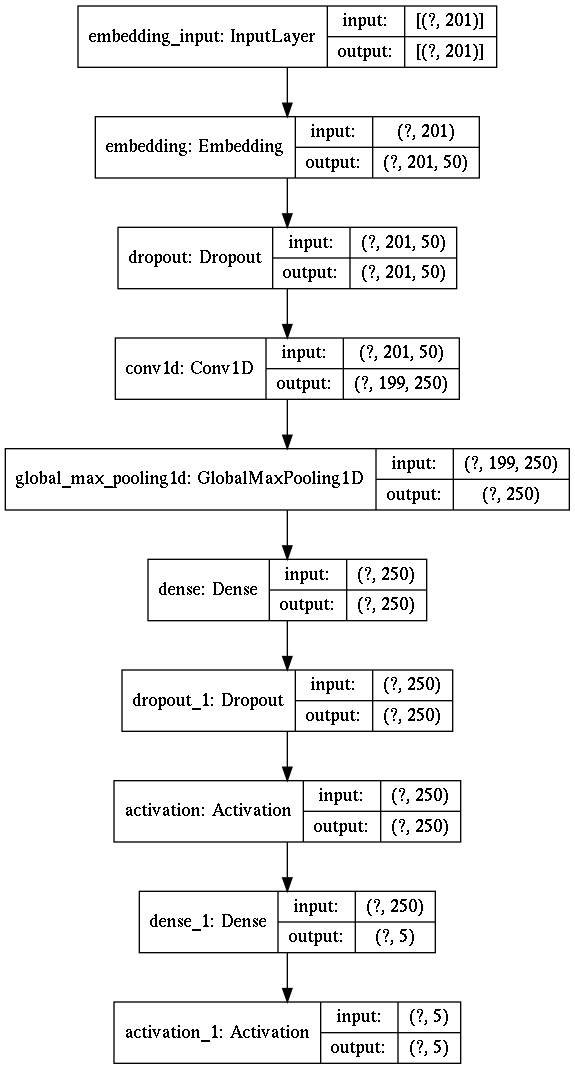

In [22]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot4a.png', show_shapes=True, show_layer_names=True)

In [24]:
score = model.evaluate(x_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

  1/310 [..............................] - ETA: 0s - loss: 1.0182 - accuracy: 0.6250

  5/310 [..............................] - ETA: 3s - loss: 1.0180 - accuracy: 0.5625

  8/310 [..............................] - ETA: 6s - loss: 1.0485 - accuracy: 0.5898

 11/310 [>.............................] - ETA: 6s - loss: 1.0006 - accuracy: 0.6108

 12/310 [>.............................] - ETA: 7s - loss: 0.9978 - accuracy: 0.6120

 14/310 [>.............................] - ETA: 9s - loss: 1.0055 - accuracy: 0.6116

 16/310 [>.............................] - ETA: 9s - loss: 1.0070 - accuracy: 0.6172

 18/310 [>.............................] - ETA: 9s - loss: 1.0179 - accuracy: 0.6076

 21/310 [=>............................] - ETA: 8s - loss: 1.0061 - accuracy: 0.6101

 24/310 [=>............................] - ETA: 8s - loss: 1.0052 - accuracy: 0.6107

 28/310 [=>............................] - ETA: 7s - loss: 1.0083 - accuracy: 0.6027

 31/310 [==>...........................] - ETA: 7s - loss: 1.0168 - accuracy: 0.5998

 35/310 [==>...........................] - ETA: 6s - loss: 1.0289 - accuracy: 0.5982

 39/310 [==>...........................] - ETA: 6s - loss: 1.0143 - accuracy: 0.6034

 41/310 [==>...........................] - ETA: 6s - loss: 1.0098 - accuracy: 0.6006

 43/310 [===>..........................] - ETA: 6s - loss: 1.0037 - accuracy: 0.6025

 45/310 [===>..........................] - ETA: 6s - loss: 1.0159 - accuracy: 0.6000

 47/310 [===>..........................] - ETA: 6s - loss: 1.0117 - accuracy: 0.6011

 49/310 [===>..........................] - ETA: 6s - loss: 1.0107 - accuracy: 0.5995

 53/310 [====>.........................] - ETA: 6s - loss: 1.0142 - accuracy: 0.5979

 56/310 [====>.........................] - ETA: 6s - loss: 1.0057 - accuracy: 0.6027

 59/310 [====>.........................] - ETA: 6s - loss: 1.0031 - accuracy: 0.6017

 62/310 [=====>........................] - ETA: 5s - loss: 1.0033 - accuracy: 0.5998

 66/310 [=====>........................] - ETA: 5s - loss: 1.0124 - accuracy: 0.5933

 70/310 [=====>........................] - ETA: 5s - loss: 1.0079 - accuracy: 0.5960

 72/310 [=====>........................] - ETA: 5s - loss: 1.0075 - accuracy: 0.5964

 76/310 [======>.......................] - ETA: 5s - loss: 1.0035 - accuracy: 0.5962

 78/310 [======>.......................] - ETA: 5s - loss: 1.0027 - accuracy: 0.5962

 82/310 [======>.......................] - ETA: 5s - loss: 1.0082 - accuracy: 0.5972

 84/310 [=======>......................] - ETA: 5s - loss: 1.0054 - accuracy: 0.5971

 87/310 [=======>......................] - ETA: 5s - loss: 1.0088 - accuracy: 0.6006

 88/310 [=======>......................] - ETA: 5s - loss: 1.0099 - accuracy: 0.6023

 90/310 [=======>......................] - ETA: 5s - loss: 1.0076 - accuracy: 0.6031

 93/310 [========>.....................] - ETA: 5s - loss: 1.0015 - accuracy: 0.6055

 95/310 [========>.....................] - ETA: 5s - loss: 1.0031 - accuracy: 0.6066

 96/310 [========>.....................] - ETA: 5s - loss: 1.0044 - accuracy: 0.6055

 99/310 [========>.....................] - ETA: 5s - loss: 1.0036 - accuracy: 0.6045

103/310 [========>.....................] - ETA: 4s - loss: 0.9999 - accuracy: 0.6056

105/310 [=========>....................] - ETA: 4s - loss: 1.0054 - accuracy: 0.6054

108/310 [=========>....................] - ETA: 4s - loss: 1.0073 - accuracy: 0.6076

111/310 [=========>....................] - ETA: 4s - loss: 1.0079 - accuracy: 0.6064

115/310 [==========>...................] - ETA: 4s - loss: 0.9997 - accuracy: 0.6090

119/310 [==========>...................] - ETA: 4s - loss: 0.9944 - accuracy: 0.6124

121/310 [==========>...................] - ETA: 4s - loss: 0.9928 - accuracy: 0.6131

125/310 [===========>..................] - ETA: 4s - loss: 0.9922 - accuracy: 0.6150

127/310 [===========>..................] - ETA: 4s - loss: 0.9920 - accuracy: 0.6139

131/310 [===========>..................] - ETA: 3s - loss: 0.9908 - accuracy: 0.6133

134/310 [===========>..................] - ETA: 3s - loss: 0.9985 - accuracy: 0.6129

137/310 [============>.................] - ETA: 3s - loss: 0.9962 - accuracy: 0.6122

140/310 [============>.................] - ETA: 3s - loss: 0.9955 - accuracy: 0.6136

142/310 [============>.................] - ETA: 3s - loss: 0.9992 - accuracy: 0.6118

144/310 [============>.................] - ETA: 3s - loss: 0.9978 - accuracy: 0.6128

147/310 [=============>................] - ETA: 3s - loss: 1.0031 - accuracy: 0.6118

149/310 [=============>................] - ETA: 3s - loss: 1.0024 - accuracy: 0.6118

151/310 [=============>................] - ETA: 3s - loss: 1.0000 - accuracy: 0.6122

153/310 [=============>................] - ETA: 3s - loss: 1.0008 - accuracy: 0.6127

155/310 [==============>...............] - ETA: 3s - loss: 1.0024 - accuracy: 0.6115

158/310 [==============>...............] - ETA: 3s - loss: 1.0000 - accuracy: 0.6125

160/310 [==============>...............] - ETA: 3s - loss: 1.0020 - accuracy: 0.6111

164/310 [==============>...............] - ETA: 3s - loss: 1.0022 - accuracy: 0.6109

167/310 [===============>..............] - ETA: 3s - loss: 1.0148 - accuracy: 0.6117

170/310 [===============>..............] - ETA: 3s - loss: 1.0140 - accuracy: 0.6136

174/310 [===============>..............] - ETA: 3s - loss: 1.0195 - accuracy: 0.6114

177/310 [================>.............] - ETA: 2s - loss: 1.0181 - accuracy: 0.6107

180/310 [================>.............] - ETA: 2s - loss: 1.0156 - accuracy: 0.6115

183/310 [================>.............] - ETA: 2s - loss: 1.0194 - accuracy: 0.6115

186/310 [=================>............] - ETA: 2s - loss: 1.0203 - accuracy: 0.6109

189/310 [=================>............] - ETA: 2s - loss: 1.0194 - accuracy: 0.6116

191/310 [=================>............] - ETA: 2s - loss: 1.0200 - accuracy: 0.6109

193/310 [=================>............] - ETA: 2s - loss: 1.0207 - accuracy: 0.6106

196/310 [=================>............] - ETA: 2s - loss: 1.0229 - accuracy: 0.6102

198/310 [==================>...........] - ETA: 2s - loss: 1.0218 - accuracy: 0.6100

199/310 [==================>...........] - ETA: 2s - loss: 1.0214 - accuracy: 0.6099

202/310 [==================>...........] - ETA: 2s - loss: 1.0189 - accuracy: 0.6105

204/310 [==================>...........] - ETA: 2s - loss: 1.0156 - accuracy: 0.6120

207/310 [===================>..........] - ETA: 2s - loss: 1.0124 - accuracy: 0.6129

211/310 [===================>..........] - ETA: 2s - loss: 1.0114 - accuracy: 0.6129

215/310 [===================>..........] - ETA: 2s - loss: 1.0109 - accuracy: 0.6129

216/310 [===================>..........] - ETA: 2s - loss: 1.0221 - accuracy: 0.6127

218/310 [====================>.........] - ETA: 2s - loss: 1.0212 - accuracy: 0.6128

221/310 [====================>.........] - ETA: 2s - loss: 1.0206 - accuracy: 0.6128

224/310 [====================>.........] - ETA: 1s - loss: 1.0187 - accuracy: 0.6140

227/310 [====================>.........] - ETA: 1s - loss: 1.0180 - accuracy: 0.6144

230/310 [=====================>........] - ETA: 1s - loss: 1.0178 - accuracy: 0.6155

232/310 [=====================>........] - ETA: 1s - loss: 1.0197 - accuracy: 0.6152

236/310 [=====================>........] - ETA: 1s - loss: 1.0179 - accuracy: 0.6157

238/310 [======================>.......] - ETA: 1s - loss: 1.0191 - accuracy: 0.6145

242/310 [======================>.......] - ETA: 1s - loss: 1.0173 - accuracy: 0.6144

246/310 [======================>.......] - ETA: 1s - loss: 1.0142 - accuracy: 0.6152

249/310 [=======================>......] - ETA: 1s - loss: 1.0140 - accuracy: 0.6147

253/310 [=======================>......] - ETA: 1s - loss: 1.0126 - accuracy: 0.6151

256/310 [=======================>......] - ETA: 1s - loss: 1.0122 - accuracy: 0.6149

260/310 [========================>.....] - ETA: 1s - loss: 1.0162 - accuracy: 0.6148

264/310 [========================>.....] - ETA: 1s - loss: 1.0149 - accuracy: 0.6161

267/310 [========================>.....] - ETA: 0s - loss: 1.0134 - accuracy: 0.6169

271/310 [=========================>....] - ETA: 0s - loss: 1.0129 - accuracy: 0.6167

273/310 [=========================>....] - ETA: 0s - loss: 1.0131 - accuracy: 0.6168

276/310 [=========================>....] - ETA: 0s - loss: 1.0108 - accuracy: 0.6172

279/310 [==========================>...] - ETA: 0s - loss: 1.0116 - accuracy: 0.6164

283/310 [==========================>...] - ETA: 0s - loss: 1.0092 - accuracy: 0.6173

286/310 [==========================>...] - ETA: 0s - loss: 1.0092 - accuracy: 0.6172

290/310 [===========================>..] - ETA: 0s - loss: 1.0087 - accuracy: 0.6168

293/310 [===========================>..] - ETA: 0s - loss: 1.0078 - accuracy: 0.6172

297/310 [===========================>..] - ETA: 0s - loss: 1.0158 - accuracy: 0.6170

299/310 [===========================>..] - ETA: 0s - loss: 1.0161 - accuracy: 0.6170

301/310 [============================>.] - ETA: 0s - loss: 1.0157 - accuracy: 0.6167

304/310 [============================>.] - ETA: 0s - loss: 1.0159 - accuracy: 0.6161

307/310 [============================>.] - ETA: 0s - loss: 1.0155 - accuracy: 0.6162

310/310 [==============================] - 7s 22ms/step - loss: 1.0165 - accuracy: 0.6154


Test Score: 1.0165202617645264
Test Accuracy: 0.6154001355171204


In [25]:
predictions = model.predict(x_test)


In [26]:
predictions

array([[1.94432527e-01, 1.59359619e-01, 3.13963741e-01, 1.84103742e-01,
        1.48140371e-01],
       [2.35404149e-01, 7.01297879e-01, 8.02955590e-04, 1.20864660e-02,
        5.04086167e-02],
       [1.47665218e-01, 1.08755261e-01, 2.87645429e-01, 2.95211017e-01,
        1.60723090e-01],
       ...,
       [7.18134880e-01, 1.67808726e-01, 3.93661539e-05, 8.56495099e-05,
        1.13931328e-01],
       [5.12472056e-02, 1.05292015e-01, 3.20394039e-01, 5.14005303e-01,
        9.06148646e-03],
       [1.79379463e-01, 7.86714479e-02, 3.63297969e-01, 1.59849957e-01,
        2.18801245e-01]], dtype=float32)

In [27]:
import sklearn.metrics
matrix = sklearn.metrics.confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1))


In [28]:
matrix

array([[ 994,  105,  538,   95,  246],
       [ 277,  985,  139,  674,   93],
       [ 103,   18, 1532,  239,  204],
       [  14,   74,  292, 1461,  111],
       [ 128,   20,  319,  122, 1126]])

In [29]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()

    width, height = cm.shape

    for x in range(width):
        for y in range(height):
            plt.annotate(str(cm[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm = confusion_matrix(y_test,predictions)
plot_confusion_matrix(cm, ['1', '0'])

ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets

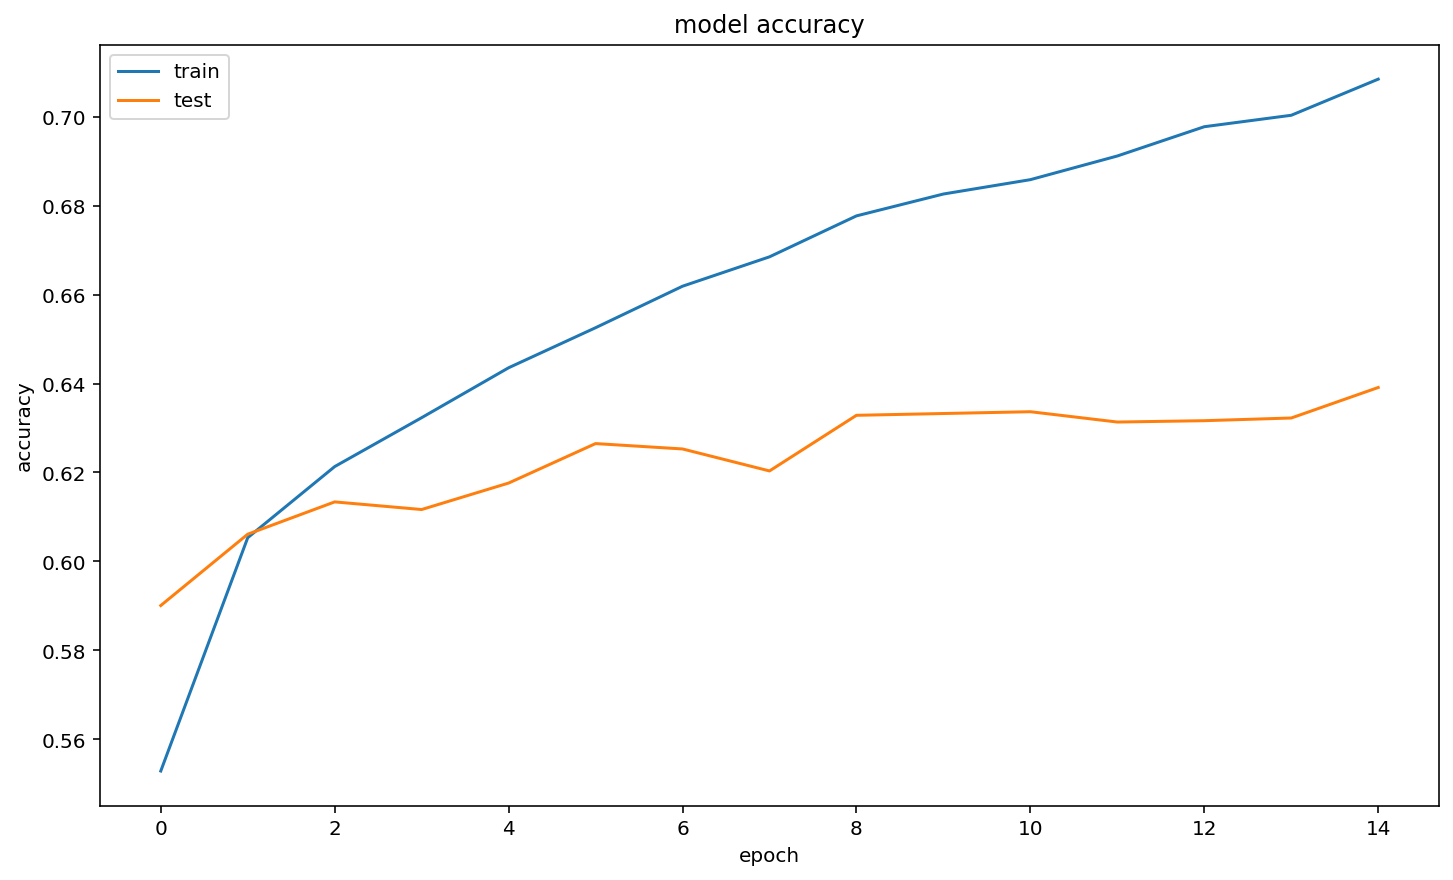

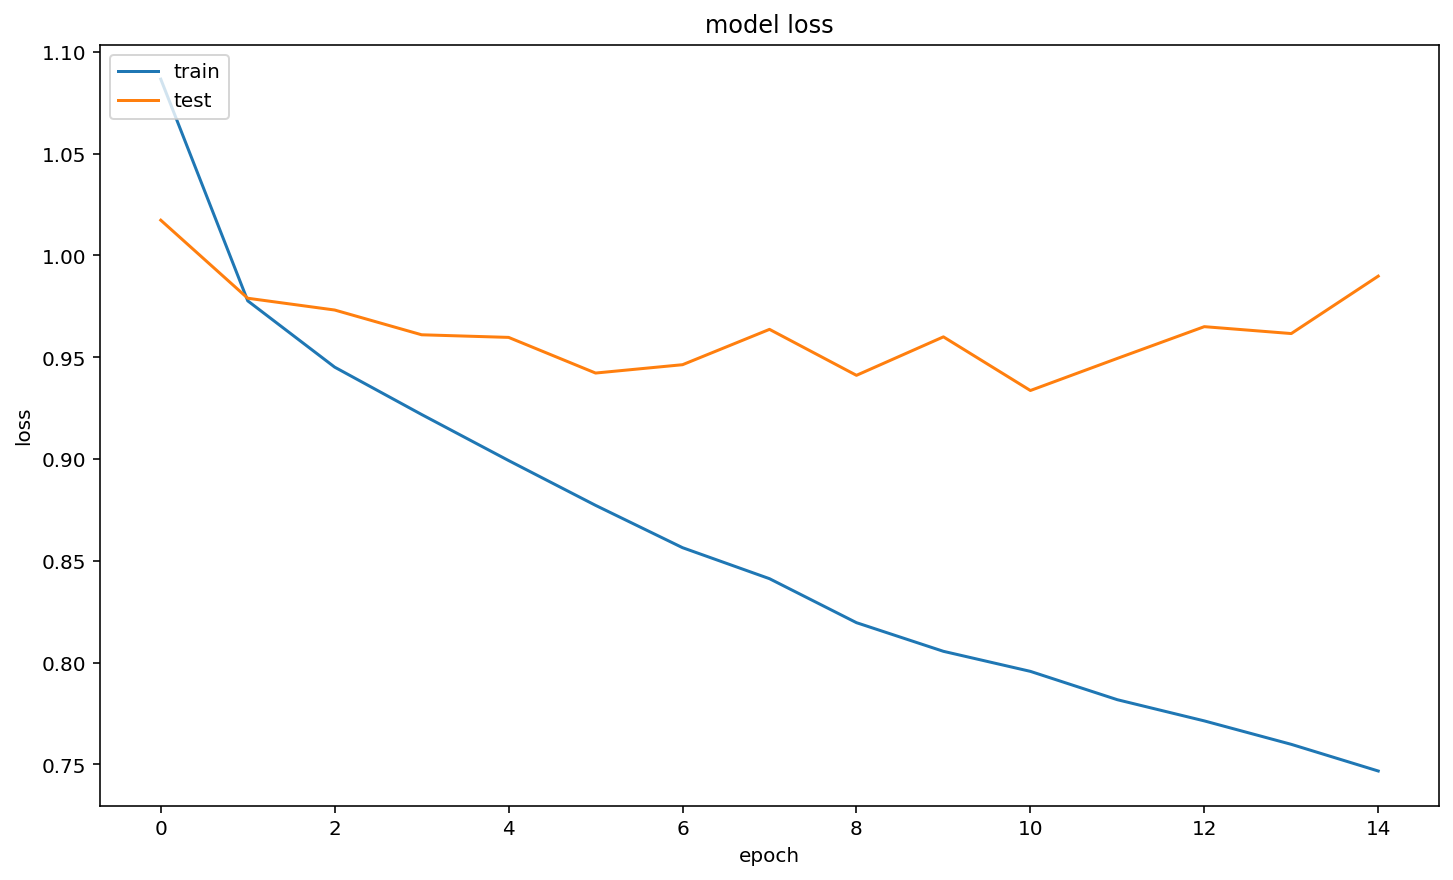

In [30]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()